In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Amateur/FinalAmateurPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

gameId  team       summoner region champion  timestamp  \
0       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.000000   
1       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.000200   
2       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.495733   
3       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   2.000517   
4       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.979017   
...                 ...   ...            ...    ...      ...        ...   
838676  EUW1_6283483863   Red   anonymous 56   euw1    Annie  17.139450   
838677  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.688683   
838678  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.826867   
838679  EUW1_6283483863   Red   anonymous 56   euw1    Annie  25.901700   
838680  EUW1_6283483863   Red   anonymous 56   euw1    Annie  27.683317   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
0              329.0         650.0    1.0            0.0  ...   
1             6569.0       11391.0    1.0            0.0  ...   
2                NaN           NaN    NaN            NaN  ...   
3             4320.0       12059.0    1.0            0.0  ...   
4             4245.0       13217.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
838676           NaN           NaN    NaN            NaN  ...   
838677           NaN           NaN    NaN            NaN  ...   
838678           NaN           NaN    NaN            NaN  ...   
838679           NaN           NaN    NaN            NaN  ...   
838680           NaN           NaN    NaN            NaN  ...   

        trueDamageTaken  victory       eventType  skillSlot  buildingType  \
0                   0.0    False             NaN        NaN           NaN   
1                   0.0    False             NaN        NaN           NaN   
2                   NaN    False    SkillLevelUp        1.0           NaN   
3                   0.0    False             NaN        NaN           NaN   
4                   NaN    False          Assist        NaN           NaN   
...                 ...      ...             ...        ...           ...   
838676              NaN    False  Item purchased        NaN           NaN   
838677              NaN    False  Item purchased        NaN           NaN   
838678              NaN    False  Item purchased        NaN           NaN   
838679              NaN    False  Item purchased        NaN           NaN   
838680              NaN    False  Item purchased        NaN           NaN   

        lane  monster            itemName     role      rank  
0        NaN      NaN                 NaN  UTILITY  Platinum  
1        NaN      NaN                 NaN  UTILITY  Platinum  
2        NaN      NaN                 NaN  UTILITY  Platinum  
3        NaN      NaN                 NaN  UTILITY  Platinum  
4        NaN      NaN                 NaN  UTILITY  Platinum  
...      ...      ...                 ...      ...       ...  
838676   NaN      NaN           Kindlegem  UTILITY      Gold  
838677   NaN      NaN        Knight's Vow  UTILITY      Gold  
838678   NaN      NaN     Glacial Buckler  UTILITY      Gold  
838679   NaN      NaN           Kindlegem  UTILITY      Gold  
838680   NaN      NaN  Zeke's Convergence  UTILITY      Gold  

[838681 rows x 56 columns]

In [3]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death")]
bottom_deaths_df

gameId  team       summoner region champion  timestamp  \
19409   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx   3.869850   
19415   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx   6.715800   
19422   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx   9.729500   
19426   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx  11.619250   
19433   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx  16.360983   
...                 ...   ...            ...    ...      ...        ...   
642892  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  10.064750   
642902  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  16.078750   
642907  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  17.981900   
642917  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  23.788183   
642920  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  25.349200   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19409        10418.0        1166.0    NaN            NaN  ...   
19415        10275.0        4748.0    NaN            NaN  ...   
19422        10792.0        1584.0    NaN            NaN  ...   
19426        13007.0        2518.0    NaN            NaN  ...   
19433        13009.0        3303.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642892       12380.0        2714.0    NaN            NaN  ...   
642902       13491.0        2393.0    NaN            NaN  ...   
642907        4589.0        9288.0    NaN            NaN  ...   
642917        5908.0        3480.0    NaN            NaN  ...   
642920        5850.0        4215.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19409               NaN    False      Death        NaN           NaN   NaN   
19415               NaN    False      Death        NaN           NaN   NaN   
19422               NaN    False      Death        NaN           NaN   NaN   
19426               NaN    False      Death        NaN           NaN   NaN   
19433               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642892              NaN    False      Death        NaN           NaN   NaN   
642902              NaN    False      Death        NaN           NaN   NaN   
642907              NaN    False      Death        NaN           NaN   NaN   
642917              NaN    False      Death        NaN           NaN   NaN   
642920              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
19409       NaN       NaN  BOTTOM  Silver  
19415       NaN       NaN  BOTTOM  Silver  
19422       NaN       NaN  BOTTOM  Silver  
19426       NaN       NaN  BOTTOM  Silver  
19433       NaN       NaN  BOTTOM  Silver  
...         ...       ...     ...     ...  
642892      NaN       NaN  BOTTOM  Bronze  
642902      NaN       NaN  BOTTOM  Bronze  
642907      NaN       NaN  BOTTOM  Bronze  
642917      NaN       NaN  BOTTOM  Bronze  
642920      NaN       NaN  BOTTOM  Bronze  

[11733 rows x 56 columns]

In [4]:
print("This dataset contains {} matches in which the bottom died at least once".format(len(np.unique(bottom_deaths_df["gameId"]))))

This dataset contains 1841 matches in which the bottom died at least once


In [5]:
print("{} players died a total of {} times".format(len(np.unique(bottom_deaths_df["summoner"])), bottom_deaths_df.shape[0]))

32 players died a total of 11733 times


In [6]:
print("This Dataset contains an average of {} deaths per game".format((bottom_deaths_df.shape[0]/len(np.unique(bottom_deaths_df["gameId"])))))

This Dataset contains an average of 6.3731667571971755 deaths per game


In [4]:
blueSide_bottom_deaths_df = bottom_deaths_df[bottom_deaths_df["team"] == "Blue"]
blueSide_bottom_deaths_df

gameId  team       summoner region champion  timestamp  \
19409   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx   3.869850   
19415   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx   6.715800   
19422   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx   9.729500   
19426   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx  11.619250   
19433   EUW1_6279876176  Blue  anonymous 143   euw1     Jinx  16.360983   
...                 ...   ...            ...    ...      ...        ...   
642892  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  10.064750   
642902  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  16.078750   
642907  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  17.981900   
642917  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  23.788183   
642920  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  25.349200   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19409        10418.0        1166.0    NaN            NaN  ...   
19415        10275.0        4748.0    NaN            NaN  ...   
19422        10792.0        1584.0    NaN            NaN  ...   
19426        13007.0        2518.0    NaN            NaN  ...   
19433        13009.0        3303.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642892       12380.0        2714.0    NaN            NaN  ...   
642902       13491.0        2393.0    NaN            NaN  ...   
642907        4589.0        9288.0    NaN            NaN  ...   
642917        5908.0        3480.0    NaN            NaN  ...   
642920        5850.0        4215.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19409               NaN    False      Death        NaN           NaN   NaN   
19415               NaN    False      Death        NaN           NaN   NaN   
19422               NaN    False      Death        NaN           NaN   NaN   
19426               NaN    False      Death        NaN           NaN   NaN   
19433               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642892              NaN    False      Death        NaN           NaN   NaN   
642902              NaN    False      Death        NaN           NaN   NaN   
642907              NaN    False      Death        NaN           NaN   NaN   
642917              NaN    False      Death        NaN           NaN   NaN   
642920              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
19409       NaN       NaN  BOTTOM  Silver  
19415       NaN       NaN  BOTTOM  Silver  
19422       NaN       NaN  BOTTOM  Silver  
19426       NaN       NaN  BOTTOM  Silver  
19433       NaN       NaN  BOTTOM  Silver  
...         ...       ...     ...     ...  
642892      NaN       NaN  BOTTOM  Bronze  
642902      NaN       NaN  BOTTOM  Bronze  
642907      NaN       NaN  BOTTOM  Bronze  
642917      NaN       NaN  BOTTOM  Bronze  
642920      NaN       NaN  BOTTOM  Bronze  

[5718 rows x 56 columns]

In [5]:
gamesBlueSide = len(np.unique(blueSide_bottom_deaths_df["gameId"]))
gamesBlueSide

916

In [9]:
players_df = np.unique(blueSide_bottom_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_bottom_deaths_df[blueSide_bottom_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 1 played 30 matches
anonymous 10 played 37 matches
anonymous 100 played 23 matches
anonymous 101 played 42 matches
anonymous 103 played 11 matches
anonymous 12 played 18 matches
anonymous 143 played 25 matches
anonymous 154 played 11 matches
anonymous 157 played 23 matches
anonymous 16 played 37 matches
anonymous 160 played 28 matches
anonymous 162 played 12 matches
anonymous 170 played 18 matches
anonymous 174 played 12 matches
anonymous 178 played 20 matches
anonymous 181 played 19 matches
anonymous 24 played 44 matches
anonymous 28 played 22 matches
anonymous 31 played 27 matches
anonymous 33 played 16 matches
anonymous 52 played 17 matches
anonymous 54 played 43 matches
anonymous 58 played 23 matches
anonymous 60 played 36 matches
anonymous 64 played 51 matches
anonymous 69 played 38 matches
anonymous 70 played 41 matches
anonymous 74 played 36 matches
anonymous 77 played 33 matches
anonymous 87 played 34 matches
anonymous 88 played 37 matches
anonymous 89 played 52 match

In [10]:
print("Blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSide_bottom_deaths_df["gameId"]))))

Blue side contains 916 matches in which the bottom died at least once


In [11]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_bottom_deaths_df["summoner"])), blueSide_bottom_deaths_df.shape[0]))

32 players died a total of 5718 times on the blue side


In [6]:
redSide_bottom_deaths_df = bottom_deaths_df[bottom_deaths_df["team"] == "Red"]
redSide_bottom_deaths_df

gameId team       summoner region champion  timestamp  \
19469   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn   2.950417   
19473   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn   4.959133   
19484   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn   9.730317   
19489   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn  12.665200   
19504   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn  19.348150   
...                 ...  ...            ...    ...      ...        ...   
641207  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  12.812150   
641210  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  13.866217   
641214  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  15.174200   
641217  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  16.349717   
641221  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  18.033500   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19469        13617.0        1609.0    NaN            NaN  ...   
19473        13171.0        3665.0    NaN            NaN  ...   
19484        12784.0        3303.0    NaN            NaN  ...   
19489        12545.0        6200.0    NaN            NaN  ...   
19504        13638.0        8520.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
641207        9575.0         841.0    NaN            NaN  ...   
641210       11196.0        3297.0    NaN            NaN  ...   
641214        7094.0        7662.0    NaN            NaN  ...   
641217        6425.0        4995.0    NaN            NaN  ...   
641221        1758.0        7601.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19469               NaN     True      Death        NaN           NaN   NaN   
19473               NaN     True      Death        NaN           NaN   NaN   
19484               NaN     True      Death        NaN           NaN   NaN   
19489               NaN     True      Death        NaN           NaN   NaN   
19504               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
641207              NaN     True      Death        NaN           NaN   NaN   
641210              NaN     True      Death        NaN           NaN   NaN   
641214              NaN     True      Death        NaN           NaN   NaN   
641217              NaN     True      Death        NaN           NaN   NaN   
641221              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
19469       NaN       NaN  BOTTOM    Silver  
19473       NaN       NaN  BOTTOM    Silver  
19484       NaN       NaN  BOTTOM    Silver  
19489       NaN       NaN  BOTTOM    Silver  
19504       NaN       NaN  BOTTOM    Silver  
...         ...       ...     ...       ...  
641207      NaN       NaN  BOTTOM  Platinum  
641210      NaN       NaN  BOTTOM  Platinum  
641214      NaN       NaN  BOTTOM  Platinum  
641217      NaN       NaN  BOTTOM  Platinum  
641221      NaN       NaN  BOTTOM  Platinum  

[6015 rows x 56 columns]

In [7]:
gamesRedSide = len(np.unique(redSide_bottom_deaths_df["gameId"]))
gamesRedSide

925

In [8]:
redSideVictory_bottom_deaths_df = redSide_bottom_deaths_df[redSide_bottom_deaths_df["victory"] == True]
blueSideVictory_bottom_deaths_df = blueSide_bottom_deaths_df[blueSide_bottom_deaths_df["victory"] == True]

winsRedSide = len(np.unique(redSideVictory_bottom_deaths_df["gameId"]))
winsBlueSide = len(np.unique(blueSideVictory_bottom_deaths_df["gameId"]))

print("Red Team Victories: {}".format(winsRedSide))
print("Blue Team Victories: {}".format(winsBlueSide))

Red Team Victories: 492
Blue Team Victories: 482


In [15]:
players_df = np.unique(redSide_bottom_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_bottom_deaths_df[redSide_bottom_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 1 played 17 matches
anonymous 10 played 31 matches
anonymous 100 played 41 matches
anonymous 101 played 35 matches
anonymous 103 played 20 matches
anonymous 12 played 19 matches
anonymous 143 played 33 matches
anonymous 154 played 12 matches
anonymous 157 played 25 matches
anonymous 16 played 23 matches
anonymous 160 played 34 matches
anonymous 162 played 23 matches
anonymous 170 played 18 matches
anonymous 174 played 9 matches
anonymous 178 played 21 matches
anonymous 181 played 28 matches
anonymous 24 played 40 matches
anonymous 28 played 17 matches
anonymous 31 played 30 matches
anonymous 33 played 20 matches
anonymous 52 played 21 matches
anonymous 54 played 56 matches
anonymous 58 played 28 matches
anonymous 60 played 36 matches
anonymous 64 played 41 matches
anonymous 69 played 33 matches
anonymous 70 played 30 matches
anonymous 74 played 32 matches
anonymous 77 played 21 matches
anonymous 87 played 33 matches
anonymous 88 played 49 matches
anonymous 89 played 49 matche

In [16]:
print("Red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSide_bottom_deaths_df["gameId"]))))

Red side contains 925 matches in which the bottom died at least once


In [17]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_bottom_deaths_df["summoner"])), redSide_bottom_deaths_df.shape[0]))

32 players died a total of 6015 times on the red side


function to visualize the results

In [18]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "bottom Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "bottom Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [19]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [20]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [21]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [22]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.ylabel('Deaths')
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [87]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:", y = 1.05)
    
    plt.show()

---
### Iron Players

#### Clustering Red Team Victory

In [24]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region     champion  timestamp  \
92335   EUW1_6283630853  Red   anonymous 1   euw1  MissFortune  14.823533   
92343   EUW1_6283630853  Red   anonymous 1   euw1  MissFortune  18.094633   
92345   EUW1_6283630853  Red   anonymous 1   euw1  MissFortune  19.562483   
92365   EUW1_6283630853  Red   anonymous 1   euw1  MissFortune  25.552017   
92379   EUW1_6283630853  Red   anonymous 1   euw1  MissFortune  32.068950   
...                 ...  ...           ...    ...          ...        ...   
572056  EUW1_6287541466  Red  anonymous 10   euw1         Ashe  13.784350   
572064  EUW1_6287541466  Red  anonymous 10   euw1         Ashe  18.004367   
572078  EUW1_6287541466  Red  anonymous 10   euw1         Ashe  24.878000   
572088  EUW1_6287541466  Red  anonymous 10   euw1         Ashe  29.465750   
572101  EUW1_6287541466  Red  anonymous 10   euw1         Ashe  34.853617   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
92335        13474.0        3524.0    NaN            NaN  ...   
92343         3715.0       10465.0    NaN            NaN  ...   
92345        13269.0        3130.0    NaN            NaN  ...   
92365         3519.0       11303.0    NaN            NaN  ...   
92379         5011.0       10751.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
572056       12979.0        1417.0    NaN            NaN  ...   
572064       13942.0        4376.0    NaN            NaN  ...   
572078        9295.0        8984.0    NaN            NaN  ...   
572088        6029.0        9349.0    NaN            NaN  ...   
572101        1923.0        4376.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
92335               NaN     True      Death        NaN           NaN   NaN   
92343               NaN     True      Death        NaN           NaN   NaN   
92345               NaN     True      Death        NaN           NaN   NaN   
92365               NaN     True      Death        NaN           NaN   NaN   
92379               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
572056              NaN     True      Death        NaN           NaN   NaN   
572064              NaN     True      Death        NaN           NaN   NaN   
572078              NaN     True      Death        NaN           NaN   NaN   
572088              NaN     True      Death        NaN           NaN   NaN   
572101              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
92335       NaN       NaN  BOTTOM  Iron  
92343       NaN       NaN  BOTTOM  Iron  
92345       NaN       NaN  BOTTOM  Iron  
92365       NaN       NaN  BOTTOM  Iron  
92379       NaN       NaN  BOTTOM  Iron  
...         ...       ...     ...   ...  
572056      NaN       NaN  BOTTOM  Iron  
572064      NaN       NaN  BOTTOM  Iron  
572078      NaN       NaN  BOTTOM  Iron  
572088      NaN       NaN  BOTTOM  Iron  
572101      NaN       NaN  BOTTOM  Iron  

[246 rows x 56 columns]

In [25]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)].copy()

In [26]:
redSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [27]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

46

In [28]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

51.11111111111111

In [29]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_bottom_deaths_df.shape[0]) * 100
winRateRedSide

4.089775561097256

In [30]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 1 won 11 matches on the red side
anonymous 1 has an average of 4.636363636363637 deaths per game when winning on the red side

anonymous 10 won 12 matches on the red side
anonymous 10 has an average of 6.416666666666667 deaths per game when winning on the red side

anonymous 12 won 12 matches on the red side
anonymous 12 has an average of 4.916666666666667 deaths per game when winning on the red side

anonymous 16 won 11 matches on the red side
anonymous 16 has an average of 5.363636363636363 deaths per game when winning on the red side



In [31]:
print("Victory games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 46 matches in which the bottom died at least once
4 players died a total of 246 times on the red side
Victory games on red side contains an average of 5.3478260869565215 deaths per game


In [32]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
92335        13474.0        3524.0  14.823533
92343         3715.0       10465.0  18.094633
92345        13269.0        3130.0  19.562483
92365         3519.0       11303.0  25.552017
92379         5011.0       10751.0  32.068950
...              ...           ...        ...
572056       12979.0        1417.0  13.784350
572064       13942.0        4376.0  18.004367
572078        9295.0        8984.0  24.878000
572088        6029.0        9349.0  29.465750
572101        1923.0        4376.0  34.853617

[246 rows x 3 columns]

Time discretization

In [33]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [34]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [35]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [36]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [37]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
92335       1.198847     -0.464837         -1
92343      -1.526234      1.866423          0
92345       1.141603     -0.597169          0
92365      -1.580965      2.147881          1
92379      -1.164342      1.962481          1
...              ...           ...        ...
572056      1.060624     -1.172511         -1
572064      1.329530     -0.178678          0
572078      0.031913      1.369002          0
572088     -0.880078      1.491594          1
572101     -2.026628     -0.178678          1

[246 rows x 3 columns]

In [38]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4289735155321448
Silhouette score for k=3: 0.43944925798660023
Silhouette score for k=4: 0.40878923558691826
Silhouette score for k=5: 0.3714137160496075
Silhouette score for k=6: 0.4057556676259263
Silhouette score for k=7: 0.41424895967979325
Silhouette score for k=8: 0.4082401608329312
Silhouette score for k=9: 0.3988304367817381
Silhouette score for k=10: 0.37423031167375026
Silhouette score for k=11: 0.3774175028723092
Silhouette score for k=12: 0.37861556410513136
Silhouette score for k=13: 0.39347366112881305
Silhouette score for k=14: 0.4054827615148068
Silhouette score for k=15: 0.3938208355229626


K-Means with k = 4

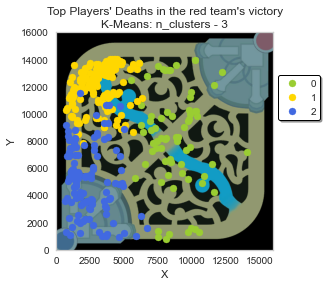

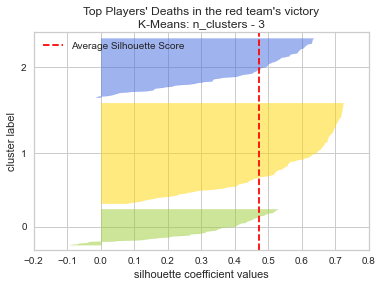

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

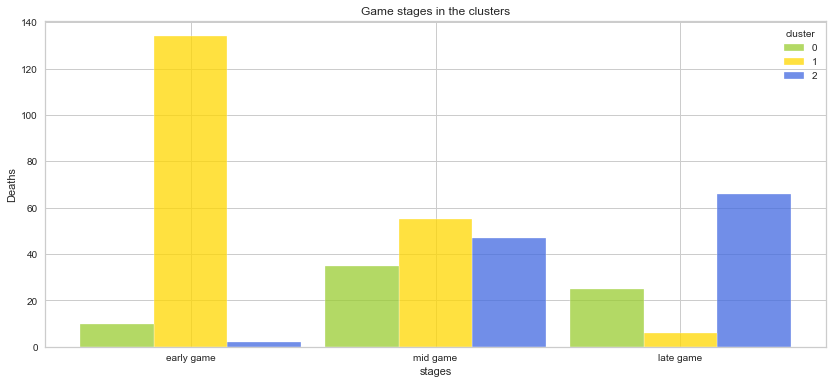

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

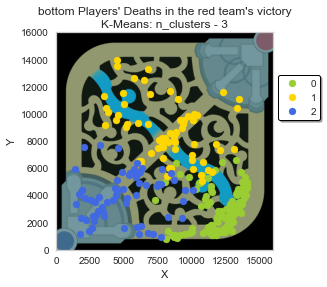

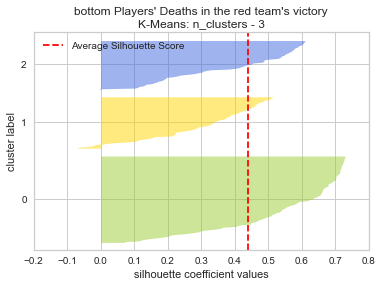

Silhouette score: 0.43944925798660023
0    114
1     68
2     64
Name: cluster, dtype: int64

Inertia: 227.33817857916608

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12079.991228   3105.271930  -0.622807
1        1   8228.514706   8808.926471   0.411765
2        2   5028.093750   3974.328125   0.734375

In [39]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [40]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1599.320505   1439.754939   0.502456
1        1   2464.414132   2085.979452   0.599885
2        2   2259.636639   1711.477177   0.441665

In [41]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14067.0            7276.0            6577.0   
1        1           13461.0            3519.0           13998.0   
2        2           10114.0            1438.0            7726.0   

   min coordinate_y  max timestamp  min timestamp  
0             812.0              1             -1  
1            5063.0              1             -1  
2             976.0              1              0

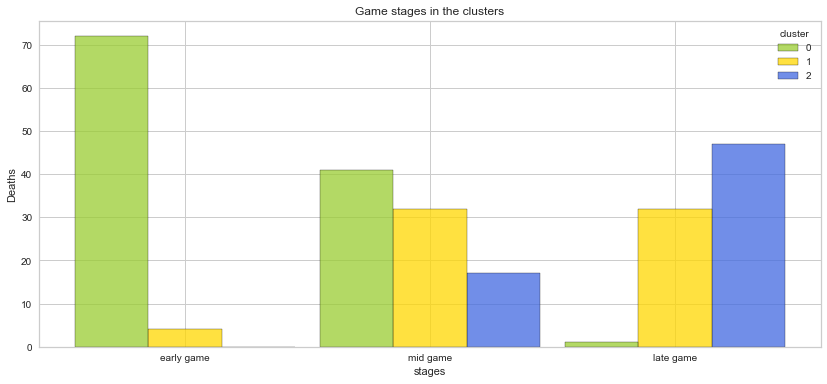

In [42]:
stagesPerClusterV2(redSideVictory_df, colors)

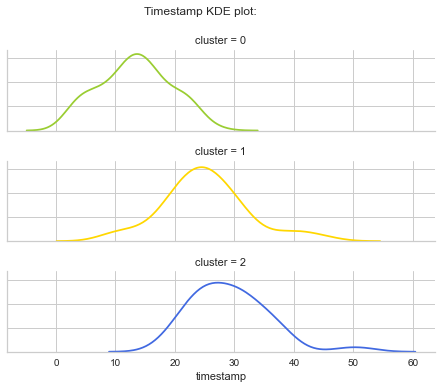

In [88]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [44]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
MissFortune        7
Caitlyn            6
Twitch             5
Ashe               5
Samira             4
Varus              4
Jinx               3
Tristana           3
Kalista            2
Zeri               2
Xayah              1
Nilah              1
Sivir              1
Corki              1
Jhin               1

Deaths with each champion:

In [45]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ashe           41
Caitlyn        32
MissFortune    30
Varus          24
Twitch         22
Samira         21
Jinx           21
Tristana       15
Zeri            8
Kalista         7
Corki           7
Sivir           6
Nilah           6
Xayah           3
Jhin            3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [46]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 15 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Ashe' 'Caitlyn' 'Corki' 'Jhin' 'Jinx' 'Kalista' 'MissFortune' 'Nilah'
 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus' 'Xayah' 'Zeri']
MissFortune    17
Ashe           13
Varus          13
Samira         12
Caitlyn        11
Twitch         10
Tristana        8
Jinx            5
Kalista         5
Zeri            5
Nilah           4
Sivir           3
Xayah           3
Jhin            3
Corki           2
Name: champion, dtype: int64

Cluster 1 - died with 12 champions:
 ['Ashe' 'Caitlyn' 'Corki' 'Jinx' 'MissFortune' 'Nilah' 'Samira' 'Sivir'
 'Tristana' 'Twitch' 'Varus' 'Zeri']
Ashe           15
Jinx           12
MissFortune    10
Samira          7
Caitlyn         6
Tristana        4
Varus           4
Corki           4
Sivir           2
Twitch          2
Zeri            1
Nilah           1
Name: champion, dtype: int64

Cluster 2 - died with 13 champions:
 ['Ashe' 'Caitlyn' 'Corki' 'J

---
#### Clustering Red Team Defeat

In [89]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region champion  timestamp  \
92267   EUW1_6283723113  Red   anonymous 1   euw1   Samira  10.859800   
92273   EUW1_6283723113  Red   anonymous 1   euw1   Samira  13.831233   
92284   EUW1_6283723113  Red   anonymous 1   euw1   Samira  18.812933   
92286   EUW1_6283723113  Red   anonymous 1   euw1   Samira  19.828467   
92293   EUW1_6283723113  Red   anonymous 1   euw1   Samira  22.245417   
...                 ...  ...           ...    ...      ...        ...   
622496  EUW1_6289303062  Red  anonymous 16   euw1    Xayah  21.291267   
622502  EUW1_6289303062  Red  anonymous 16   euw1    Xayah  23.845417   
622510  EUW1_6289303062  Red  anonymous 16   euw1    Xayah  27.272583   
622515  EUW1_6289303062  Red  anonymous 16   euw1    Xayah  29.566883   
622518  EUW1_6289303062  Red  anonymous 16   euw1    Xayah  32.006250   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
92267        13004.0        3357.0    NaN            NaN  ...   
92273        14020.0        6094.0    NaN            NaN  ...   
92284         9513.0       10143.0    NaN            NaN  ...   
92286        10498.0       10443.0    NaN            NaN  ...   
92293         8439.0        6623.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622496       11250.0        5005.0    NaN            NaN  ...   
622502       11356.0        5608.0    NaN            NaN  ...   
622510        3694.0        1486.0    NaN            NaN  ...   
622515        3523.0        1616.0    NaN            NaN  ...   
622518       10793.0        1953.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
92267               NaN    False      Death        NaN           NaN   NaN   
92273               NaN    False      Death        NaN           NaN   NaN   
92284               NaN    False      Death        NaN           NaN   NaN   
92286               NaN    False      Death        NaN           NaN   NaN   
92293               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622496              NaN    False      Death        NaN           NaN   NaN   
622502              NaN    False      Death        NaN           NaN   NaN   
622510              NaN    False      Death        NaN           NaN   NaN   
622515              NaN    False      Death        NaN           NaN   NaN   
622518              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
92267       NaN       NaN  BOTTOM  Iron  
92273       NaN       NaN  BOTTOM  Iron  
92284       NaN       NaN  BOTTOM  Iron  
92286       NaN       NaN  BOTTOM  Iron  
92293       NaN       NaN  BOTTOM  Iron  
...         ...       ...     ...   ...  
622496      NaN       NaN  BOTTOM  Iron  
622502      NaN       NaN  BOTTOM  Iron  
622510      NaN       NaN  BOTTOM  Iron  
622515      NaN       NaN  BOTTOM  Iron  
622518      NaN       NaN  BOTTOM  Iron  

[333 rows x 56 columns]

In [90]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)].copy()

In [91]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 1 lost 6 matches on the red side
anonymous 1 has an average of 7.666666666666667 deaths per game when losing on the red side

anonymous 10 lost 19 matches on the red side
anonymous 10 has an average of 7.2631578947368425 deaths per game when losing on the red side

anonymous 12 lost 7 matches on the red side
anonymous 12 has an average of 8.714285714285714 deaths per game when losing on the red side

anonymous 16 lost 12 matches on the red side
anonymous 16 has an average of 7.333333333333333 deaths per game when losing on the red side



In [92]:
print("Defeat games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 44 matches in which the bottom died at least once
4 players died a total of 333 times on the red side
Defeat games on red side contains an average of 7.568181818181818 deaths per game


In [93]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
92267        13004.0        3357.0  10.859800
92273        14020.0        6094.0  13.831233
92284         9513.0       10143.0  18.812933
92286        10498.0       10443.0  19.828467
92293         8439.0        6623.0  22.245417
...              ...           ...        ...
622496       11250.0        5005.0  21.291267
622502       11356.0        5608.0  23.845417
622510        3694.0        1486.0  27.272583
622515        3523.0        1616.0  29.566883
622518       10793.0        1953.0  32.006250

[333 rows x 3 columns]

Time discretization

In [94]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [95]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [96]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [97]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [98]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
92267       0.827999     -0.807928         -1
92273       1.199696     -0.012587         -1
92284      -0.449162      1.164006          0
92286      -0.088806      1.251183          0
92293      -0.842078      0.141134          0
...              ...           ...        ...
622496      0.186309     -0.329038          0
622502      0.225088     -0.153813          0
622510     -2.578007     -1.351619          1
622515     -2.640566     -1.313843          1
622518      0.019118     -1.215914          1

[333 rows x 3 columns]

In [99]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.43054309230754034
Silhouette score for k=3: 0.4250576256714517
Silhouette score for k=4: 0.3725828082691498
Silhouette score for k=5: 0.3644448273011552
Silhouette score for k=6: 0.37216241805987854
Silhouette score for k=7: 0.37171544199077766
Silhouette score for k=8: 0.324956493839194
Silhouette score for k=9: 0.39698045178415864
Silhouette score for k=10: 0.36211488762818583
Silhouette score for k=11: 0.37400713548906217
Silhouette score for k=12: 0.38320730335694575
Silhouette score for k=13: 0.38162239593135316
Silhouette score for k=14: 0.3868109739838421
Silhouette score for k=15: 0.386670936095501
Silhouette score for k=16: 0.39132153725267954
Silhouette score for k=17: 0.4033476951030557
Silhouette score for k=18: 0.39162279038056425
Silhouette score for k=19: 0.41009419299067107
Silhouette score for k=20: 0.38924394635228005
Silhouette score for k=25: 0.4103407534479342


K-Means with k = 3

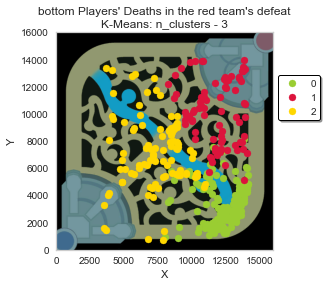

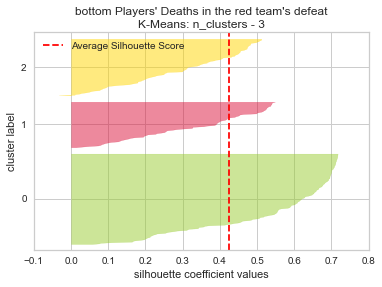

Silhouette score: 0.4250576256714517
0    156
2     98
1     79
Name: cluster, dtype: int64

Inertia: 319.324086655102

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12392.576923   3458.910256  -0.692308
1        1  11748.696203  10154.632911   0.481013
2        2   7298.755102   7162.448980   0.540816

In [100]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [101]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1343.262518   1488.717394   0.526422
1        1   1556.445393   2307.048348   0.499639
2        2   1884.972333   2634.649429   0.498331

In [102]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14122.0            8003.0            8132.0   
1        1           14060.0            8260.0           13965.0   
2        2           10939.0            3523.0           13366.0   

   min coordinate_y  max timestamp  min timestamp  
0             833.0              1             -1  
1            5168.0              1              0  
2             740.0              1              0

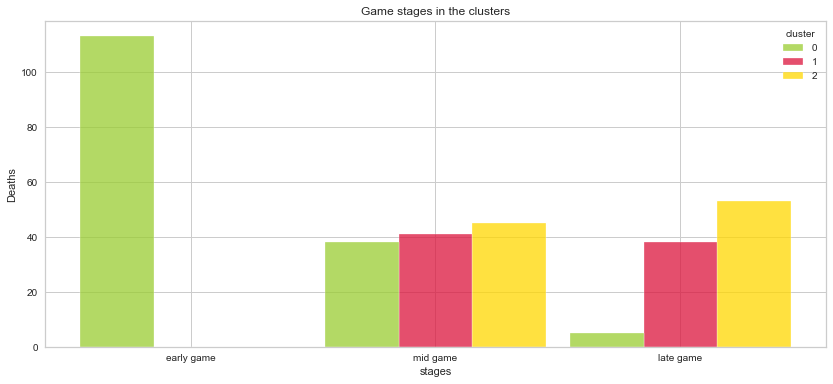

In [103]:
stagesPerClusterV2(redSideDefeat_df, colors)

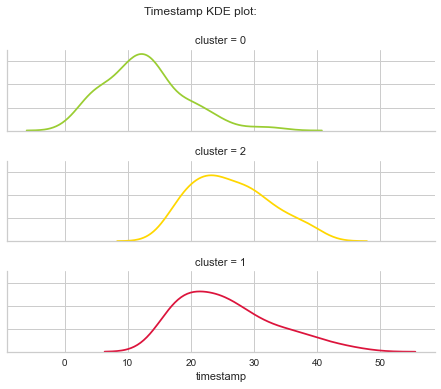

In [104]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [105]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx               7
Twitch             6
Tristana           6
MissFortune        5
Samira             5
Caitlyn            3
Varus              3
Xayah              3
Ashe               2
Ezreal             1
Corki              1
Lucian             1
Kaisa              1

Deaths with each champion:

In [106]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Twitch         50
Jinx           49
Tristana       48
Samira         37
MissFortune    36
Varus          28
Caitlyn        27
Ashe           19
Xayah          15
Kaisa          11
Lucian          6
Ezreal          6
Corki           1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [107]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 13 champions when they won on the red side

Cluster 0 - died with 13 champions:
 ['Ashe' 'Caitlyn' 'Corki' 'Ezreal' 'Jinx' 'Kaisa' 'Lucian' 'MissFortune'
 'Samira' 'Tristana' 'Twitch' 'Varus' 'Xayah']
Tristana       27
Twitch         26
Jinx           19
Caitlyn        17
Varus          13
MissFortune    12
Samira         11
Xayah          10
Ashe            8
Ezreal          6
Kaisa           4
Lucian          2
Corki           1
Name: champion, dtype: int64

Cluster 1 - died with 11 champions:
 ['Ashe' 'Caitlyn' 'Jinx' 'Kaisa' 'Lucian' 'MissFortune' 'Samira'
 'Tristana' 'Twitch' 'Varus' 'Xayah']
MissFortune    13
Jinx           11
Tristana       11
Samira         10
Twitch          9
Varus           6
Caitlyn         6
Kaisa           5
Ashe            4
Xayah           3
Lucian          1
Name: champion, dtype: int64

Cluster 2 - died with 11 champions:
 ['Ashe' 'Caitlyn' 'Jinx' 'Kaisa' 'Lucian' 'MissFortune' 'Samira'
 'Tristana' 'Twitch' 'Varus' 'Xayah']

---
#### Clustering Blue Team Victory

In [108]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region     champion  timestamp  \
92715   EUW1_6280785454  Blue   anonymous 1   euw1  MissFortune  16.475400   
92836   EUW1_6280719583  Blue   anonymous 1   euw1       Samira  15.547550   
92959   EUW1_6280607487  Blue   anonymous 1   euw1  MissFortune  16.496450   
92965   EUW1_6280607487  Blue   anonymous 1   euw1  MissFortune  19.225683   
92975   EUW1_6280607487  Blue   anonymous 1   euw1  MissFortune  23.065633   
...                 ...   ...           ...    ...          ...        ...   
574737  EUW1_6287593924  Blue  anonymous 16   euw1        Varus  13.627467   
574741  EUW1_6287593924  Blue  anonymous 16   euw1        Varus  15.709350   
574745  EUW1_6287593924  Blue  anonymous 16   euw1        Varus  17.372667   
574775  EUW1_6287593924  Blue  anonymous 16   euw1        Varus  30.904033   
574780  EUW1_6287593924  Blue  anonymous 16   euw1        Varus  33.560417   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
92715         6076.0        5731.0    NaN            NaN  ...   
92836        11945.0        5106.0    NaN            NaN  ...   
92959         9117.0        7459.0    NaN            NaN  ...   
92965        13556.0        6483.0    NaN            NaN  ...   
92975        11796.0        6996.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
574737       11840.0        2686.0    NaN            NaN  ...   
574741       12296.0        2598.0    NaN            NaN  ...   
574745       12946.0        3340.0    NaN            NaN  ...   
574775       13049.0       12772.0    NaN            NaN  ...   
574780       13580.0       12388.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
92715               NaN     True      Death        NaN           NaN   NaN   
92836               NaN     True      Death        NaN           NaN   NaN   
92959               NaN     True      Death        NaN           NaN   NaN   
92965               NaN     True      Death        NaN           NaN   NaN   
92975               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
574737              NaN     True      Death        NaN           NaN   NaN   
574741              NaN     True      Death        NaN           NaN   NaN   
574745              NaN     True      Death        NaN           NaN   NaN   
574775              NaN     True      Death        NaN           NaN   NaN   
574780              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
92715       NaN       NaN  BOTTOM  Iron  
92836       NaN       NaN  BOTTOM  Iron  
92959       NaN       NaN  BOTTOM  Iron  
92965       NaN       NaN  BOTTOM  Iron  
92975       NaN       NaN  BOTTOM  Iron  
...         ...       ...     ...   ...  
574737      NaN       NaN  BOTTOM  Iron  
574741      NaN       NaN  BOTTOM  Iron  
574745      NaN       NaN  BOTTOM  Iron  
574775      NaN       NaN  BOTTOM  Iron  
574780      NaN       NaN  BOTTOM  Iron  

[325 rows x 56 columns]

In [109]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)].copy()

In [110]:
blueSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [111]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

61

In [112]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

50.0

In [113]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_bottom_deaths_df.shape[0]) * 100
winRateBlueSide

5.683805526407835

In [114]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 1 won 15 matches on the blue side
anonymous 1 has an average of 5.0 deaths per game when winning on the blue side

anonymous 10 won 18 matches on the blue side
anonymous 10 has an average of 5.444444444444445 deaths per game when winning on the blue side

anonymous 12 won 9 matches on the blue side
anonymous 12 has an average of 4.555555555555555 deaths per game when winning on the blue side

anonymous 16 won 19 matches on the blue side
anonymous 16 has an average of 5.842105263157895 deaths per game when winning on the blue side



In [115]:
print("Victory games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 61 matches in which the bottom died at least once
4 players died a total of 325 times on the blue side
Victory games on blue side contains an average of 5.327868852459017 deaths per game


In [116]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
92715         6076.0        5731.0  16.475400
92836        11945.0        5106.0  15.547550
92959         9117.0        7459.0  16.496450
92965        13556.0        6483.0  19.225683
92975        11796.0        6996.0  23.065633
...              ...           ...        ...
574737       11840.0        2686.0  13.627467
574741       12296.0        2598.0  15.709350
574745       12946.0        3340.0  17.372667
574775       13049.0       12772.0  30.904033
574780       13580.0       12388.0  33.560417

[325 rows x 3 columns]

Time discretization

In [117]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [118]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [119]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [120]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [121]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
92715      -1.770136     -0.126803          0
92836       0.444935     -0.293896          0
92959      -0.622405      0.335176          0
92965       1.052956      0.074243          0
92975       0.388699      0.211393          0
...              ...           ...        ...
574737      0.405306     -0.940881         -1
574741      0.577409     -0.964408          0
574745      0.822731     -0.766035          0
574775      0.861605      1.755602          1
574780      1.062014      1.652940          1

[325 rows x 3 columns]

In [122]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.42007985930037683
Silhouette score for k=3: 0.45613034673900826
Silhouette score for k=4: 0.40748982708567943
Silhouette score for k=5: 0.37236892693529206
Silhouette score for k=6: 0.3827268351723563
Silhouette score for k=7: 0.3853893436277375
Silhouette score for k=8: 0.3859777143983667
Silhouette score for k=9: 0.3951347960776789
Silhouette score for k=10: 0.3725583376715975
Silhouette score for k=11: 0.38998191294831663
Silhouette score for k=12: 0.38731870435440435
Silhouette score for k=13: 0.40006919091076715
Silhouette score for k=14: 0.4137481073104599
Silhouette score for k=15: 0.40444505944947756
Silhouette score for k=16: 0.4148909050408099
Silhouette score for k=17: 0.4113007897377513
Silhouette score for k=18: 0.41714548372624466
Silhouette score for k=19: 0.4258247792204571
Silhouette score for k=20: 0.42814915587615465
Silhouette score for k=25: 0.43968501968582413


K-Means with k = 3

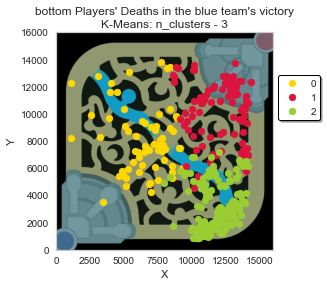

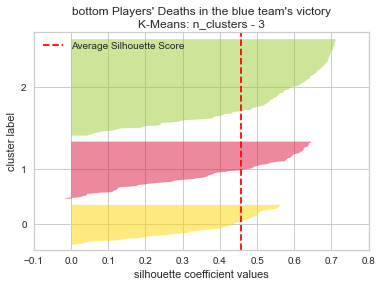

Silhouette score: 0.45613034673900826
2    162
1     96
0     67
Name: cluster, dtype: int64

Inertia: 294.59232759546734

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6493.671642   8056.462687   0.343284
1        1  11979.666667  10056.562500   0.750000
2        2  11813.962963   3157.462963  -0.598765

In [123]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [124]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1903.678696   2419.904484   0.587233
1        1   1625.554044   2361.181721   0.433013
2        2   1224.360220   1687.071965   0.549521

In [125]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9351.0            1114.0           13802.0   
1        1           14317.0            8629.0           13710.0   
2        2           14105.0            7945.0            7216.0   

   min coordinate_y  max timestamp  min timestamp  
0            3536.0              1             -1  
1            4541.0              1              0  
2             841.0              1             -1

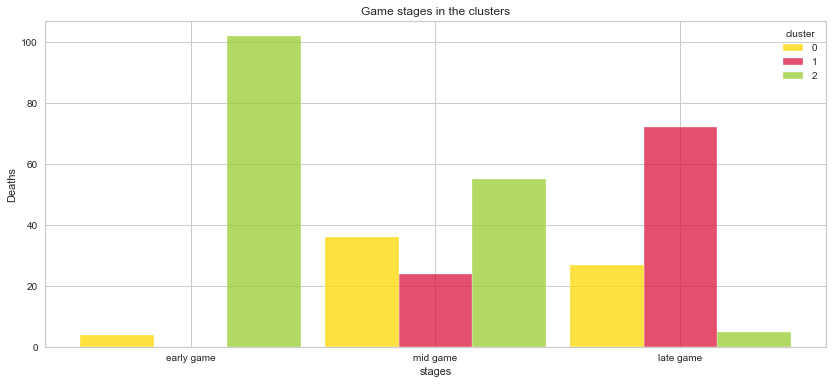

In [126]:
stagesPerClusterV2(blueSideVictory_df, colors)

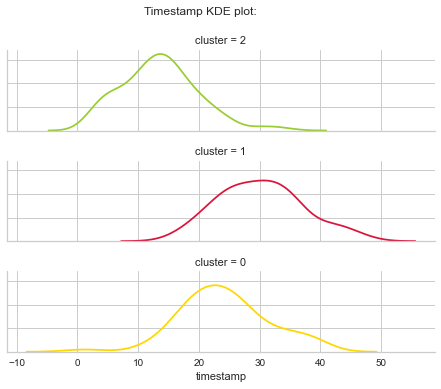

In [127]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [128]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
MissFortune       16
Varus              8
Twitch             7
Tristana           7
Jinx               6
Samira             4
Caitlyn            3
Ashe               3
Sivir              2
Cassiopeia         1
Kaisa              1
Seraphine          1
Vayne              1
Aphelios           1

Deaths with each champion:

In [129]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



MissFortune    77
Twitch         48
Tristana       37
Varus          37
Jinx           36
Caitlyn        23
Ashe           21
Samira         18
Kaisa          10
Aphelios        7
Cassiopeia      5
Vayne           3
Sivir           2
Seraphine       1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [130]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 14 champions when they won on the red side

Cluster 0 - died with 12 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Cassiopeia' 'Jinx' 'Kaisa' 'MissFortune'
 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus']
MissFortune    16
Tristana       11
Jinx           10
Twitch          9
Ashe            5
Varus           4
Cassiopeia      3
Caitlyn         3
Samira          2
Kaisa           2
Sivir           1
Aphelios        1
Name: champion, dtype: int64

Cluster 1 - died with 11 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Cassiopeia' 'Jinx' 'Kaisa' 'MissFortune'
 'Samira' 'Tristana' 'Twitch' 'Varus']
MissFortune    23
Twitch         22
Varus          12
Caitlyn        11
Samira          6
Jinx            6
Tristana        6
Ashe            4
Kaisa           3
Aphelios        2
Cassiopeia      1
Name: champion, dtype: int64

Cluster 2 - died with 14 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Cassiopeia' 'Jinx' 'Kaisa' 'MissFortune'
 'Samira' 'Seraphine' 'Sivir' 'Tristana' 'Tw

---
#### Clustering Blue Team Defeat

In [131]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region     champion  timestamp  \
92459   EUW1_6282443275  Blue   anonymous 1   euw1       Samira   1.103850   
92471   EUW1_6282443275  Blue   anonymous 1   euw1       Samira   8.006983   
92475   EUW1_6282443275  Blue   anonymous 1   euw1       Samira  10.660500   
92480   EUW1_6282443275  Blue   anonymous 1   euw1       Samira  13.683000   
92484   EUW1_6282443275  Blue   anonymous 1   euw1       Samira  15.179133   
...                 ...   ...           ...    ...          ...        ...   
621525  EUW1_6289368577  Blue  anonymous 10   euw1  MissFortune  18.776517   
621531  EUW1_6289368577  Blue  anonymous 10   euw1  MissFortune  20.222217   
621558  EUW1_6289283624  Blue  anonymous 10   euw1     Tristana  14.570183   
621570  EUW1_6289283624  Blue  anonymous 10   euw1     Tristana  22.012217   
621572  EUW1_6289283624  Blue  anonymous 10   euw1     Tristana  23.889883   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
92459         9771.0        7300.0    NaN            NaN  ...   
92471        11240.0         918.0    NaN            NaN  ...   
92475        12888.0        2458.0    NaN            NaN  ...   
92480        10345.0        1428.0    NaN            NaN  ...   
92484        11950.0        1766.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
621525        4758.0        4914.0    NaN            NaN  ...   
621531       11430.0        1922.0    NaN            NaN  ...   
621558       12868.0        3123.0    NaN            NaN  ...   
621570        9690.0        5658.0    NaN            NaN  ...   
621572        8384.0       10330.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
92459               NaN    False      Death        NaN           NaN   NaN   
92471               NaN    False      Death        NaN           NaN   NaN   
92475               NaN    False      Death        NaN           NaN   NaN   
92480               NaN    False      Death        NaN           NaN   NaN   
92484               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
621525              NaN    False      Death        NaN           NaN   NaN   
621531              NaN    False      Death        NaN           NaN   NaN   
621558              NaN    False      Death        NaN           NaN   NaN   
621570              NaN    False      Death        NaN           NaN   NaN   
621572              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
92459       NaN       NaN  BOTTOM  Iron  
92471       NaN       NaN  BOTTOM  Iron  
92475       NaN       NaN  BOTTOM  Iron  
92480       NaN       NaN  BOTTOM  Iron  
92484       NaN       NaN  BOTTOM  Iron  
...         ...       ...     ...   ...  
621525      NaN       NaN  BOTTOM  Iron  
621531      NaN       NaN  BOTTOM  Iron  
621558      NaN       NaN  BOTTOM  Iron  
621570      NaN       NaN  BOTTOM  Iron  
621572      NaN       NaN  BOTTOM  Iron  

[417 rows x 56 columns]

In [132]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)].copy()

In [133]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 1 lost 15 matches on the blue side
anonymous 1 has an average of 4.666666666666667 deaths per game when losing on the blue side

anonymous 10 lost 19 matches on the blue side
anonymous 10 has an average of 7.315789473684211 deaths per game when losing on the blue side

anonymous 12 lost 9 matches on the blue side
anonymous 12 has an average of 7.777777777777778 deaths per game when losing on the blue side

anonymous 16 lost 18 matches on the blue side
anonymous 16 has an average of 7.666666666666667 deaths per game when losing on the blue side



In [134]:
print("Defeat games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 61 matches in which the bottom died at least once
4 players died a total of 417 times on the blue side
Defeat games on blue side contains an average of 6.836065573770492 deaths per game


In [135]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
92459         9771.0        7300.0   1.103850
92471        11240.0         918.0   8.006983
92475        12888.0        2458.0  10.660500
92480        10345.0        1428.0  13.683000
92484        11950.0        1766.0  15.179133
...              ...           ...        ...
621525        4758.0        4914.0  18.776517
621531       11430.0        1922.0  20.222217
621558       12868.0        3123.0  14.570183
621570        9690.0        5658.0  22.012217
621572        8384.0       10330.0  23.889883

[417 rows x 3 columns]

Time discretization

In [136]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [137]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [138]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [139]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [140]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
92459       0.275577      1.037137         -1
92471       0.674878     -1.087461         -1
92475       1.122835     -0.574788         -1
92480       0.431600     -0.917679         -1
92484       0.867869     -0.805158          0
...              ...           ...        ...
621525     -1.087050      0.242826          0
621531      0.726524     -0.753224          0
621558      1.117399     -0.353406         -1
621570      0.253559      0.490508          0
621572     -0.101436      2.045838          0

[417 rows x 3 columns]

In [141]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4130540719807922
Silhouette score for k=3: 0.4458806108256727
Silhouette score for k=4: 0.4121469230710305
Silhouette score for k=5: 0.3823015041211761
Silhouette score for k=6: 0.38499481591459866
Silhouette score for k=7: 0.4008432331229971
Silhouette score for k=8: 0.4196136704248883
Silhouette score for k=9: 0.4213339608453322
Silhouette score for k=10: 0.4187605974907705
Silhouette score for k=11: 0.3827691631035132
Silhouette score for k=12: 0.38052241237584067
Silhouette score for k=13: 0.3959995040140501
Silhouette score for k=14: 0.40402092919094634
Silhouette score for k=15: 0.40483754376681796
Silhouette score for k=16: 0.4130808431240355
Silhouette score for k=17: 0.4127053511678377
Silhouette score for k=18: 0.41488578220465056
Silhouette score for k=19: 0.42150698640906753
Silhouette score for k=20: 0.4159500694504201
Silhouette score for k=25: 0.4306780213084638


K-Means with k = 3

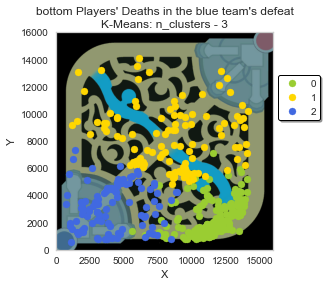

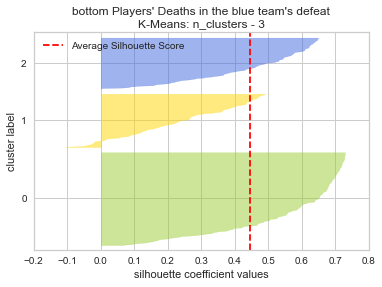

Silhouette score: 0.4458806108256727
0    196
1    113
2    108
Name: cluster, dtype: int64

Inertia: 402.56148872723486

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11386.678571   2378.571429  -0.612245
1        1   8560.814159   8215.955752   0.522124
2        2   4190.564815   3244.148148   0.675926

In [142]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [143]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1555.794906   1275.465669   0.537049
1        1   3125.610254   2291.799816   0.581383
2        2   2049.684001   1607.338033   0.487410

In [144]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14044.0            5576.0            7135.0   
1        1           14122.0            1172.0           14079.0   
2        2            8906.0             734.0            7349.0   

   min coordinate_y  max timestamp  min timestamp  
0             808.0              1             -1  
1            4822.0              1             -1  
2             552.0              1             -1

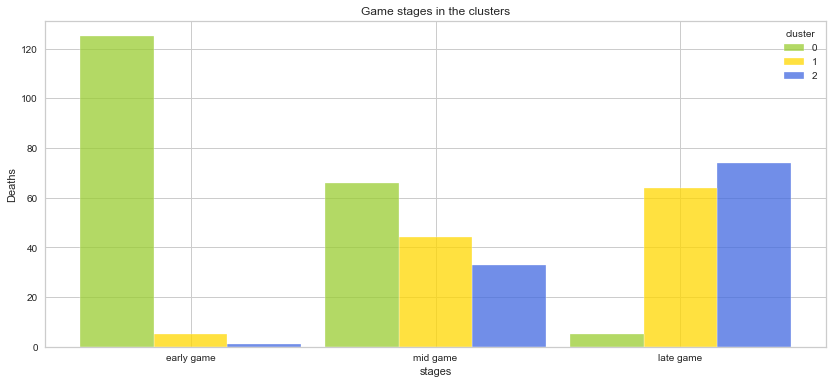

In [145]:
stagesPerClusterV2(blueSideDefeat_df, colors)

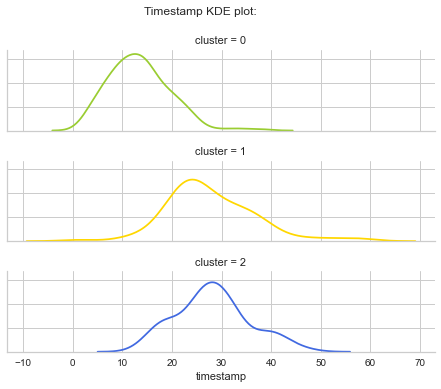

In [146]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [147]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
MissFortune       16
Jinx               8
Ashe               6
Caitlyn            6
Varus              6
Samira             5
Tristana           5
Twitch             4
Ezreal             2
Aphelios           1
Lucian             1
Vayne              1

Deaths with each champion:

In [148]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



MissFortune    88
Jinx           70
Caitlyn        48
Varus          45
Ashe           38
Twitch         38
Samira         30
Tristana       27
Ezreal         13
Lucian          8
Vayne           7
Aphelios        5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [149]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 12 champions when they won on the red side

Cluster 0 - died with 12 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Ezreal' 'Jinx' 'Lucian' 'MissFortune'
 'Samira' 'Tristana' 'Twitch' 'Varus' 'Vayne']
MissFortune    36
Jinx           30
Caitlyn        26
Twitch         22
Ashe           18
Varus          17
Samira         16
Tristana       13
Ezreal          8
Lucian          4
Vayne           4
Aphelios        2
Name: champion, dtype: int64

Cluster 1 - died with 11 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Ezreal' 'Jinx' 'Lucian' 'MissFortune'
 'Samira' 'Tristana' 'Twitch' 'Varus']
MissFortune    30
Jinx           18
Varus          16
Ashe           12
Tristana       10
Twitch         10
Caitlyn         7
Samira          3
Ezreal          3
Aphelios        2
Lucian          2
Name: champion, dtype: int64

Cluster 2 - died with 12 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Ezreal' 'Jinx' 'Lucian' 'MissFortune'
 'Samira' 'Tristana' 'Twitch' 'Varus' 'Vayne']
MissFo

---
### Bronze Players

#### Clustering Red Team Victory

In [150]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
36128   EUW1_6279914914  Red  anonymous 154   euw1    Kaisa  13.428033   
36137   EUW1_6279914914  Red  anonymous 154   euw1    Kaisa  18.738617   
36141   EUW1_6279914914  Red  anonymous 154   euw1    Kaisa  20.259600   
36146   EUW1_6279914914  Red  anonymous 154   euw1    Kaisa  22.177567   
36161   EUW1_6279914914  Red  anonymous 154   euw1    Kaisa  29.698550   
...                 ...  ...            ...    ...      ...        ...   
613016  EUW1_6288061858  Red  anonymous 154   euw1    Varus  34.877200   
613022  EUW1_6288061858  Red  anonymous 154   euw1    Varus  37.227867   
617565  EUW1_6287570102  Red  anonymous 170   euw1   Draven  11.429100   
617575  EUW1_6287570102  Red  anonymous 170   euw1   Draven  16.008717   
617598  EUW1_6287570102  Red  anonymous 170   euw1   Draven  24.805117   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
36128        13335.0        2954.0    NaN            NaN  ...   
36137        13824.0        8079.0    NaN            NaN  ...   
36141         9843.0        9445.0    NaN            NaN  ...   
36146        11857.0        3825.0    NaN            NaN  ...   
36161        13177.0        5553.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
613016        8752.0        8588.0    NaN            NaN  ...   
613022        5902.0        8930.0    NaN            NaN  ...   
617565       12582.0        2614.0    NaN            NaN  ...   
617575       13604.0        7031.0    NaN            NaN  ...   
617598        4392.0        2254.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
36128               NaN     True      Death        NaN           NaN   NaN   
36137               NaN     True      Death        NaN           NaN   NaN   
36141               NaN     True      Death        NaN           NaN   NaN   
36146               NaN     True      Death        NaN           NaN   NaN   
36161               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
613016              NaN     True      Death        NaN           NaN   NaN   
613022              NaN     True      Death        NaN           NaN   NaN   
617565              NaN     True      Death        NaN           NaN   NaN   
617575              NaN     True      Death        NaN           NaN   NaN   
617598              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
36128       NaN       NaN  BOTTOM  Bronze  
36137       NaN       NaN  BOTTOM  Bronze  
36141       NaN       NaN  BOTTOM  Bronze  
36146       NaN       NaN  BOTTOM  Bronze  
36161       NaN       NaN  BOTTOM  Bronze  
...         ...       ...     ...     ...  
613016      NaN       NaN  BOTTOM  Bronze  
613022      NaN       NaN  BOTTOM  Bronze  
617565      NaN       NaN  BOTTOM  Bronze  
617575      NaN       NaN  BOTTOM  Bronze  
617598      NaN       NaN  BOTTOM  Bronze  

[838 rows x 56 columns]

In [151]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)].copy()

In [152]:
redSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [153]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

139

In [154]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

54.08560311284047

In [155]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_bottom_deaths_df.shape[0]) * 100
winRateRedSide

13.931837073981711

In [156]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 won 24 matches on the red side
anonymous 100 has an average of 5.666666666666667 deaths per game when winning on the red side

anonymous 101 won 20 matches on the red side
anonymous 101 has an average of 5.2 deaths per game when winning on the red side

anonymous 103 won 10 matches on the red side
anonymous 103 has an average of 7.2 deaths per game when winning on the red side

anonymous 154 won 6 matches on the red side
anonymous 154 has an average of 3.5 deaths per game when winning on the red side

anonymous 170 won 8 matches on the red side
anonymous 170 has an average of 5.375 deaths per game when winning on the red side

anonymous 87 won 19 matches on the red side
anonymous 87 has an average of 7.631578947368421 deaths per game when winning on the red side

anonymous 88 won 28 matches on the red side
anonymous 88 has an average of 5.964285714285714 deaths per game when winning on the red side

anonymous 89 won 24 matches on the red side
anonymous 89 has an average o

In [157]:
print("Victory games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 139 matches in which the bottom died at least once
8 players died a total of 838 times on the red side
Victory games on red side contains an average of 6.028776978417266 deaths per game


In [158]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
36128        13335.0        2954.0  13.428033
36137        13824.0        8079.0  18.738617
36141         9843.0        9445.0  20.259600
36146        11857.0        3825.0  22.177567
36161        13177.0        5553.0  29.698550
...              ...           ...        ...
613016        8752.0        8588.0  34.877200
613022        5902.0        8930.0  37.227867
617565       12582.0        2614.0  11.429100
617575       13604.0        7031.0  16.008717
617598        4392.0        2254.0  24.805117

[838 rows x 3 columns]

Time discretization

In [159]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [160]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [161]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [162]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [163]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
36128       0.963879     -0.605207         -1
36137       1.096497      1.280039          0
36141       0.016841      1.782526          0
36146       0.563043     -0.284807          0
36161       0.921029      0.350842          1
...              ...           ...        ...
613016     -0.279040      1.467276          1
613022     -1.051966      1.593082          1
617565      0.759664     -0.730277         -1
617575      1.036833      0.894529          0
617598     -1.461482     -0.862704          0

[838 rows x 3 columns]

In [164]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.45384661267987075
Silhouette score for k=3: 0.45630650705606995
Silhouette score for k=4: 0.3761144760579453
Silhouette score for k=5: 0.3548860639894769
Silhouette score for k=6: 0.3691088887099145
Silhouette score for k=7: 0.3641393574070593
Silhouette score for k=8: 0.3651570127135578
Silhouette score for k=9: 0.3812406107269502
Silhouette score for k=10: 0.3886265803438267
Silhouette score for k=11: 0.39417410355548255
Silhouette score for k=12: 0.39377805878566363
Silhouette score for k=13: 0.4030782653317963
Silhouette score for k=14: 0.4054520796431729
Silhouette score for k=15: 0.40822708220003623
Silhouette score for k=16: 0.3752368615435961
Silhouette score for k=17: 0.3967402952535316
Silhouette score for k=18: 0.39449967236771794
Silhouette score for k=19: 0.4209729273828498
Silhouette score for k=20: 0.4157784526306186
Silhouette score for k=25: 0.41142168660983125


K-Means with k = 4

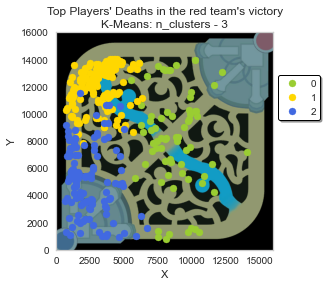

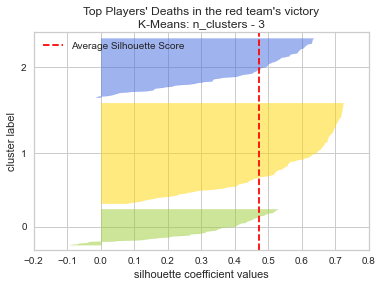

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

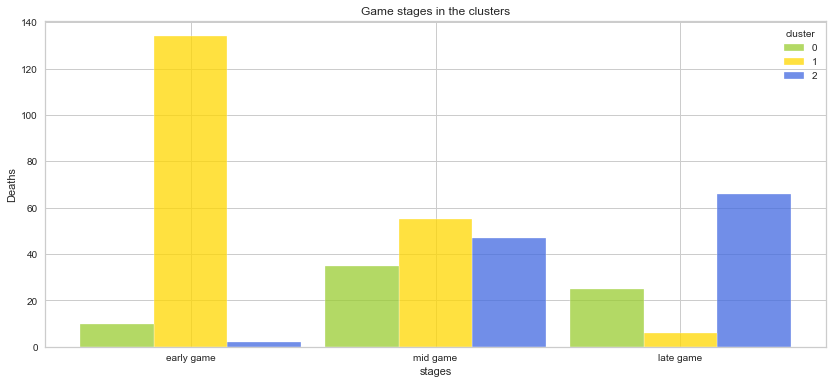

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

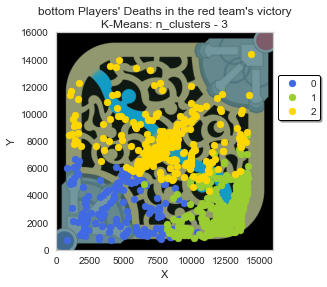

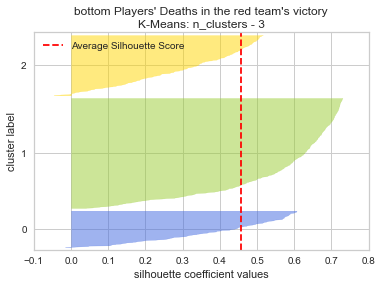

Silhouette score: 0.45630650705606995
1    445
2    244
0    149
Name: cluster, dtype: int64

Inertia: 789.8183024490845

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4784.557047   3127.308725   0.691275
1        1  12422.400000   3213.656180  -0.629213
2        2   8014.459016   8025.077869   0.483607

In [165]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [166]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2361.632027   1648.380030   0.461967
1        1   1359.989394   1421.079946   0.505743
2        2   2970.849335   1864.883897   0.546728

In [167]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10414.0             799.0            6692.0   
1        1           14122.0            6497.0            8473.0   
2        2           14340.0             966.0           14391.0   

   min coordinate_y  max timestamp  min timestamp  
0             687.0              1              0  
1             840.0              1             -1  
2            4359.0              1             -1

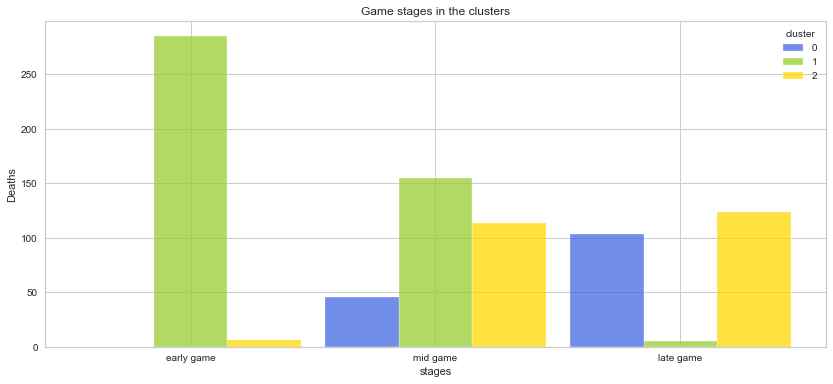

In [168]:
stagesPerClusterV2(redSideVictory_df, colors)

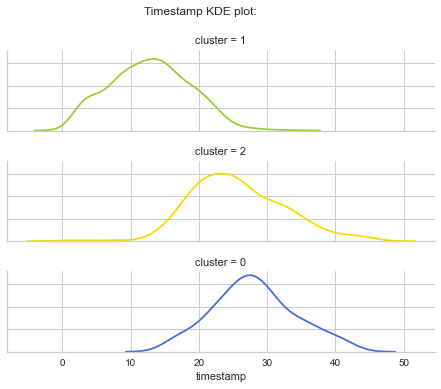

In [169]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [170]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
MissFortune       61
Jinx              16
Caitlyn           13
Samira            11
Draven             8
Xayah              5
Varus              4
Ashe               4
Kaisa              4
Sivir              3
Twitch             3
Nilah              3
Jhin               2
Tristana           2

Deaths with each champion:

In [171]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



MissFortune    361
Samira          98
Jinx            93
Caitlyn         70
Draven          41
Nilah           33
Varus           30
Kaisa           23
Xayah           22
Sivir           19
Twitch          15
Ashe            14
Jhin            10
Tristana         9
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [172]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 14 champions when they won on the red side

Cluster 0 - died with 11 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Jinx' 'Kaisa' 'MissFortune' 'Nilah' 'Samira'
 'Sivir' 'Varus' 'Xayah']
MissFortune    67
Jinx           21
Samira         20
Caitlyn        14
Draven          7
Xayah           5
Nilah           5
Varus           3
Sivir           3
Ashe            2
Kaisa           2
Name: champion, dtype: int64

Cluster 1 - died with 14 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Jhin' 'Jinx' 'Kaisa' 'MissFortune' 'Nilah'
 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus' 'Xayah']
MissFortune    191
Samira          61
Caitlyn         35
Jinx            35
Nilah           22
Draven          18
Varus           17
Kaisa           15
Xayah           11
Twitch          11
Sivir           10
Ashe             7
Jhin             6
Tristana         6
Name: champion, dtype: int64

Cluster 2 - died with 14 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Jhin' 'Jinx' 'Kaisa' 'MissFortune' 'Nila

---
#### Clustering Red Team Defeat

In [173]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
36426   EUW1_6275328135  Red  anonymous 154   euw1     Ashe   4.728867   
36465   EUW1_6275328135  Red  anonymous 154   euw1     Ashe  24.260950   
36484   EUW1_6275328135  Red  anonymous 154   euw1     Ashe  33.375467   
36493   EUW1_6275328135  Red  anonymous 154   euw1     Ashe  37.197167   
36496   EUW1_6275328135  Red  anonymous 154   euw1     Ashe  39.210517   
...                 ...  ...            ...    ...      ...        ...   
640285  EUW1_6289307743  Red  anonymous 154   euw1    Kaisa  23.815000   
640291  EUW1_6289307743  Red  anonymous 154   euw1    Kaisa  27.228483   
640295  EUW1_6289307743  Red  anonymous 154   euw1    Kaisa  29.049733   
640300  EUW1_6289307743  Red  anonymous 154   euw1    Kaisa  31.336033   
640304  EUW1_6289307743  Red  anonymous 154   euw1    Kaisa  33.094617   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
36426        12968.0        3435.0    NaN            NaN  ...   
36465         6504.0        1534.0    NaN            NaN  ...   
36484         5454.0        4897.0    NaN            NaN  ...   
36493         3255.0        8189.0    NaN            NaN  ...   
36496         4509.0        7047.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
640285       11908.0        6440.0    NaN            NaN  ...   
640291        7069.0        9185.0    NaN            NaN  ...   
640295        7982.0        8319.0    NaN            NaN  ...   
640300       13922.0        7416.0    NaN            NaN  ...   
640304       12599.0       11171.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
36426               NaN    False      Death        NaN           NaN   NaN   
36465               NaN    False      Death        NaN           NaN   NaN   
36484               NaN    False      Death        NaN           NaN   NaN   
36493               NaN    False      Death        NaN           NaN   NaN   
36496               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
640285              NaN    False      Death        NaN           NaN   NaN   
640291              NaN    False      Death        NaN           NaN   NaN   
640295              NaN    False      Death        NaN           NaN   NaN   
640300              NaN    False      Death        NaN           NaN   NaN   
640304              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
36426       NaN       NaN  BOTTOM  Bronze  
36465       NaN       NaN  BOTTOM  Bronze  
36484       NaN       NaN  BOTTOM  Bronze  
36493       NaN       NaN  BOTTOM  Bronze  
36496       NaN       NaN  BOTTOM  Bronze  
...         ...       ...     ...     ...  
640285      NaN       NaN  BOTTOM  Bronze  
640291      NaN       NaN  BOTTOM  Bronze  
640295      NaN       NaN  BOTTOM  Bronze  
640300      NaN       NaN  BOTTOM  Bronze  
640304      NaN       NaN  BOTTOM  Bronze  

[1011 rows x 56 columns]

In [174]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)].copy()

In [175]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 lost 17 matches on the red side
anonymous 100 has an average of 7.588235294117647 deaths per game when losing on the red side

anonymous 101 lost 15 matches on the red side
anonymous 101 has an average of 8.733333333333333 deaths per game when losing on the red side

anonymous 103 lost 10 matches on the red side
anonymous 103 has an average of 11.4 deaths per game when losing on the red side

anonymous 154 lost 6 matches on the red side
anonymous 154 has an average of 6.666666666666667 deaths per game when losing on the red side

anonymous 170 lost 10 matches on the red side
anonymous 170 has an average of 7.8 deaths per game when losing on the red side

anonymous 87 lost 14 matches on the red side
anonymous 87 has an average of 10.285714285714286 deaths per game when losing on the red side

anonymous 88 lost 21 matches on the red side
anonymous 88 has an average of 9.904761904761905 deaths per game when losing on the red side

anonymous 89 lost 25 matches on the red side

In [176]:
print("Defeat games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 118 matches in which the bottom died at least once
8 players died a total of 1011 times on the red side
Defeat games on red side contains an average of 8.567796610169491 deaths per game


In [177]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
36426        12968.0        3435.0   4.728867
36465         6504.0        1534.0  24.260950
36484         5454.0        4897.0  33.375467
36493         3255.0        8189.0  37.197167
36496         4509.0        7047.0  39.210517
...              ...           ...        ...
640285       11908.0        6440.0  23.815000
640291        7069.0        9185.0  27.228483
640295        7982.0        8319.0  29.049733
640300       13922.0        7416.0  31.336033
640304       12599.0       11171.0  33.094617

[1011 rows x 3 columns]

Time discretization

In [178]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [179]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [180]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [181]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [182]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
36426       0.757621     -0.814493         -1
36465      -1.525193     -1.342816          0
36484      -1.896009     -0.408176          1
36493      -2.672603      0.506733          1
36496      -2.229743      0.189349          1
...              ...           ...        ...
640285      0.383273      0.020653          0
640291     -1.325659      0.783540          1
640295     -1.003225      0.542862          1
640300      1.094534      0.291901          1
640304      0.627305      1.335486          1

[1011 rows x 3 columns]

In [183]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4288812730487753
Silhouette score for k=3: 0.44181051588811476
Silhouette score for k=4: 0.38528902176705043
Silhouette score for k=5: 0.36354446283660696
Silhouette score for k=6: 0.37111043209016176
Silhouette score for k=7: 0.38032744554070747
Silhouette score for k=8: 0.38583555167983713
Silhouette score for k=9: 0.38653135295619456
Silhouette score for k=10: 0.35142925677654185
Silhouette score for k=11: 0.3667584538996427
Silhouette score for k=12: 0.3846254260389323
Silhouette score for k=13: 0.37512531453892756
Silhouette score for k=14: 0.36328495311306597
Silhouette score for k=15: 0.3882811457929413
Silhouette score for k=16: 0.385934993888309
Silhouette score for k=17: 0.3994596448541006
Silhouette score for k=18: 0.40461840319697323
Silhouette score for k=19: 0.41429644277985334
Silhouette score for k=20: 0.4222748036365468
Silhouette score for k=25: 0.39432813202563033


K-Means with k = 3

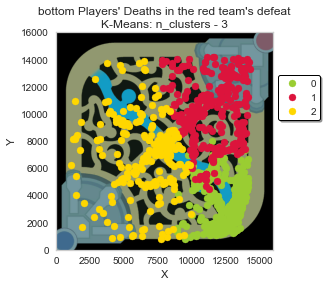

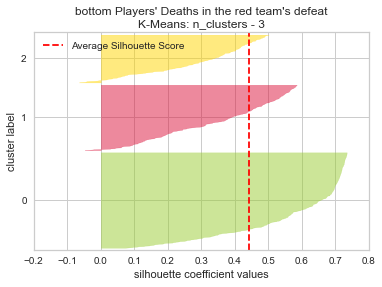

Silhouette score: 0.44181051588811476
0    462
1    317
2    232
Name: cluster, dtype: int64

Inertia: 938.7340900027757

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12509.348485   3476.309524  -0.677489
1        1  11487.419558  10099.315457   0.577287
2        2   6555.797414   7017.982759   0.452586

In [184]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [185]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1152.310022   1549.626186   0.498799
1        1   1662.895850   2377.327088   0.493991
2        2   2010.571401   2795.917012   0.585303

In [186]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14121.0            8875.0            9060.0   
1        1           14252.0            7780.0           14210.0   
2        2            9910.0            1115.0           13905.0   

   min coordinate_y  max timestamp  min timestamp  
0             804.0              1             -1  
1            4471.0              1              0  
2             801.0              1             -1

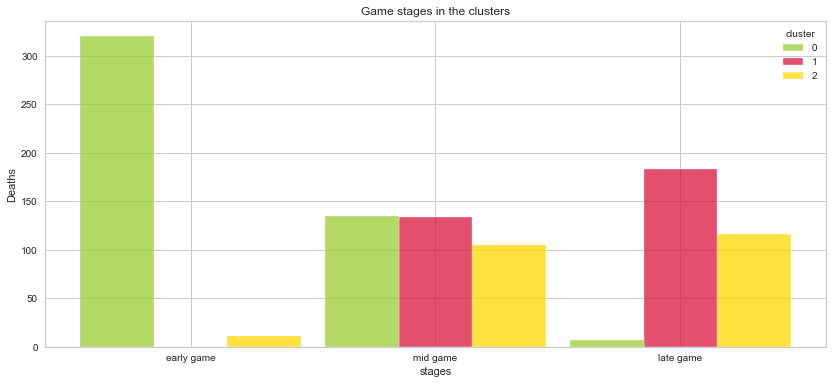

In [187]:
stagesPerClusterV2(redSideDefeat_df, colors)

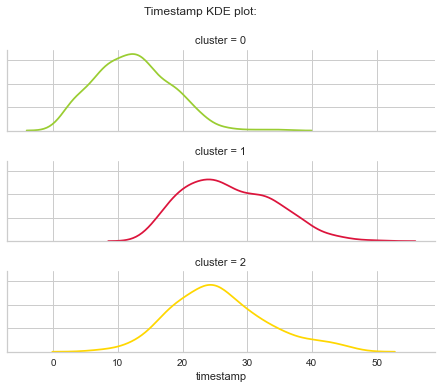

In [188]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [189]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
MissFortune       44
Caitlyn           16
Samira            11
Jinx              10
Draven             8
Ashe               7
Xayah              6
Sivir              5
Varus              2
Tristana           2
Twitch             1
Jhin               1
Ezreal             1
Zeri               1
Nilah              1
Azir               1
Kaisa              1

Deaths with each champion:

In [190]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



MissFortune    399
Caitlyn        104
Samira          94
Jinx            88
Ashe            70
Draven          58
Xayah           54
Sivir           45
Varus           20
Tristana        18
Zeri            13
Twitch          12
Nilah           10
Kaisa            8
Azir             7
Jhin             7
Ezreal           4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [191]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 17 champions when they won on the red side

Cluster 0 - died with 17 champions:
 ['Ashe' 'Azir' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'MissFortune' 'Nilah' 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus'
 'Xayah' 'Zeri']
MissFortune    180
Samira          49
Caitlyn         47
Jinx            35
Draven          29
Xayah           26
Ashe            23
Sivir           23
Tristana         9
Varus            8
Nilah            7
Azir             6
Twitch           6
Zeri             5
Jhin             4
Ezreal           3
Kaisa            2
Name: champion, dtype: int64

Cluster 1 - died with 16 champions:
 ['Ashe' 'Azir' 'Caitlyn' 'Draven' 'Jhin' 'Jinx' 'Kaisa' 'MissFortune'
 'Nilah' 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus' 'Xayah' 'Zeri']
MissFortune    140
Caitlyn         34
Ashe            24
Samira          24
Jinx            24
Sivir           18
Xayah           15
Draven          13
Varus            7
Twitch           4
Tristana         3
Jh

---
#### Clustering Blue Team Victory

In [192]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
36298   EUW1_6276171404  Blue  anonymous 154   euw1   Ezreal   8.550067   
36312   EUW1_6276171404  Blue  anonymous 154   euw1   Ezreal  16.383433   
36321   EUW1_6276171404  Blue  anonymous 154   euw1   Ezreal  20.342467   
36337   EUW1_6276171404  Blue  anonymous 154   euw1   Ezreal  26.444500   
36521   EUW1_6274603825  Blue  anonymous 154   euw1     Ashe   9.348650   
...                 ...   ...            ...    ...      ...        ...   
642823  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  11.112067   
642825  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  12.131283   
642827  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  13.452200   
642829  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  14.350417   
642851  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  22.265933   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
36298        11256.0        4268.0    NaN            NaN  ...   
36312         6284.0        8981.0    NaN            NaN  ...   
36321        13674.0        5731.0    NaN            NaN  ...   
36337        12183.0       12252.0    NaN            NaN  ...   
36521         9434.0        5350.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642823       13392.0        2445.0    NaN            NaN  ...   
642825       13576.0        2798.0    NaN            NaN  ...   
642827       11126.0        1569.0    NaN            NaN  ...   
642829        8878.0        1151.0    NaN            NaN  ...   
642851       13851.0        3974.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
36298               NaN     True      Death        NaN           NaN   NaN   
36312               NaN     True      Death        NaN           NaN   NaN   
36321               NaN     True      Death        NaN           NaN   NaN   
36337               NaN     True      Death        NaN           NaN   NaN   
36521               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642823              NaN     True      Death        NaN           NaN   NaN   
642825              NaN     True      Death        NaN           NaN   NaN   
642827              NaN     True      Death        NaN           NaN   NaN   
642829              NaN     True      Death        NaN           NaN   NaN   
642851              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
36298       NaN       NaN  BOTTOM  Bronze  
36312       NaN       NaN  BOTTOM  Bronze  
36321       NaN       NaN  BOTTOM  Bronze  
36337       NaN       NaN  BOTTOM  Bronze  
36521       NaN       NaN  BOTTOM  Bronze  
...         ...       ...     ...     ...  
642823      NaN       NaN  BOTTOM  Bronze  
642825      NaN       NaN  BOTTOM  Bronze  
642827      NaN       NaN  BOTTOM  Bronze  
642829      NaN       NaN  BOTTOM  Bronze  
642851      NaN       NaN  BOTTOM  Bronze  

[589 rows x 56 columns]

In [193]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)].copy()

In [194]:
blueSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [195]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

116

In [196]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

50.877192982456144

In [197]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_bottom_deaths_df.shape[0]) * 100
winRateBlueSide

10.300804477089892

In [198]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 won 15 matches on the blue side
anonymous 100 has an average of 5.733333333333333 deaths per game when winning on the blue side

anonymous 101 won 27 matches on the blue side
anonymous 101 has an average of 4.62962962962963 deaths per game when winning on the blue side

anonymous 103 won 5 matches on the blue side
anonymous 103 has an average of 5.8 deaths per game when winning on the blue side

anonymous 154 won 7 matches on the blue side
anonymous 154 has an average of 3.2857142857142856 deaths per game when winning on the blue side

anonymous 170 won 3 matches on the blue side
anonymous 170 has an average of 5.333333333333333 deaths per game when winning on the blue side

anonymous 87 won 18 matches on the blue side
anonymous 87 has an average of 6.444444444444445 deaths per game when winning on the blue side

anonymous 88 won 17 matches on the blue side
anonymous 88 has an average of 5.117647058823529 deaths per game when winning on the blue side

anonymous 89 won 24 

In [199]:
print("Victory games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 116 matches in which the bottom died at least once
8 players died a total of 589 times on the blue side
Victory games on blue side contains an average of 5.077586206896552 deaths per game


In [200]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
36298        11256.0        4268.0   8.550067
36312         6284.0        8981.0  16.383433
36321        13674.0        5731.0  20.342467
36337        12183.0       12252.0  26.444500
36521         9434.0        5350.0   9.348650
...              ...           ...        ...
642823       13392.0        2445.0  11.112067
642825       13576.0        2798.0  12.131283
642827       11126.0        1569.0  13.452200
642829        8878.0        1151.0  14.350417
642851       13851.0        3974.0  22.265933

[589 rows x 3 columns]

Time discretization

In [201]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [202]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [203]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [204]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [205]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
36298       0.299016     -0.318088         -1
36312      -1.579694      1.007238          0
36321       1.212677      0.093317          0
36337       0.649290      1.927064          1
36521      -0.389441     -0.013823         -1
...              ...           ...        ...
642823      1.106121     -0.830728         -1
642825      1.175647     -0.731462         -1
642827      0.249894     -1.077065         -1
642829     -0.599530     -1.194609         -1
642851      1.279557     -0.400763          0

[589 rows x 3 columns]

In [206]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.42605836161491845
Silhouette score for k=3: 0.4265307435276241
Silhouette score for k=4: 0.3777444972127771
Silhouette score for k=5: 0.37424315838826017
Silhouette score for k=6: 0.3820916289109151
Silhouette score for k=7: 0.38873733136057487
Silhouette score for k=8: 0.37466490170021804
Silhouette score for k=9: 0.35744102135131217
Silhouette score for k=10: 0.35659722357732504
Silhouette score for k=11: 0.3605775420485552
Silhouette score for k=12: 0.3781947579520415
Silhouette score for k=13: 0.3868564489858152
Silhouette score for k=14: 0.39112685233272315
Silhouette score for k=15: 0.39664208193521416
Silhouette score for k=16: 0.3687194315585672
Silhouette score for k=17: 0.41369290228806804
Silhouette score for k=18: 0.41031872998036883
Silhouette score for k=19: 0.3896288524870778
Silhouette score for k=20: 0.36940361673593614
Silhouette score for k=25: 0.42608502473877735


K-Means with k = 3

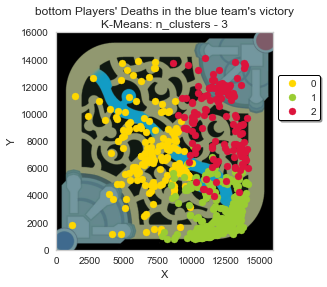

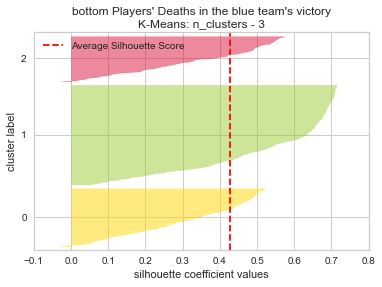

Silhouette score: 0.4265307435276241
1    289
0    169
2    131
Name: cluster, dtype: int64

Inertia: 569.5910068746834

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   7038.011834   7113.266272   0.402367
1        1  11808.480969   2626.702422  -0.674740
2        2  11920.664122   9304.152672   0.580153

In [207]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [208]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1792.706179   2717.296648   0.578915
1        1   1351.197526   1483.210098   0.504051
2        2   1437.144320   2546.127586   0.493534

In [209]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10008.0            1156.0           13860.0   
1        1           14122.0            7786.0            7628.0   
2        2           14133.0            8595.0           14107.0   

   min coordinate_y  max timestamp  min timestamp  
0            1137.0              1             -1  
1             786.0              1             -1  
2            3927.0              1              0

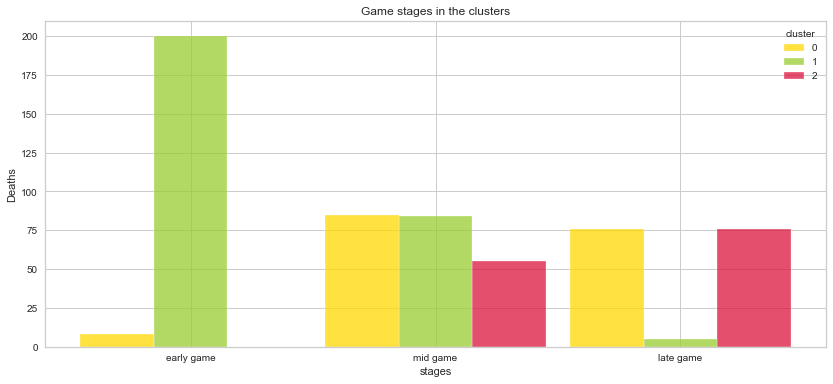

In [210]:
stagesPerClusterV2(blueSideVictory_df, colors)

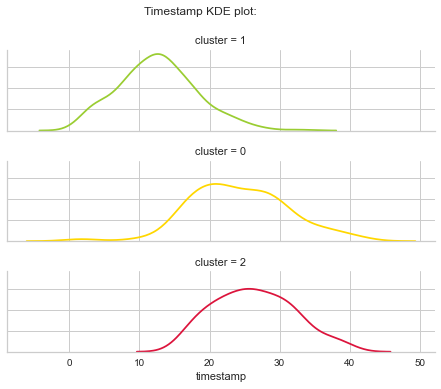

In [211]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [212]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
MissFortune       42
Jinx              21
Caitlyn           17
Samira            12
Draven             5
Xayah              3
Sivir              3
Ashe               3
Ezreal             3
Nilah              3
Jhin               1
Kaisa              1
Varus              1
Tristana           1

Deaths with each champion:

In [213]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



MissFortune    211
Jinx           104
Caitlyn         80
Samira          79
Sivir           23
Draven          20
Nilah           16
Ashe            12
Tristana        12
Kaisa           10
Xayah            9
Ezreal           6
Varus            5
Jhin             2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [214]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 14 champions when they won on the red side

Cluster 0 - died with 13 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jinx' 'Kaisa' 'MissFortune' 'Nilah'
 'Samira' 'Sivir' 'Tristana' 'Varus' 'Xayah']
MissFortune    60
Jinx           36
Samira         25
Caitlyn        20
Tristana        5
Draven          4
Sivir           4
Nilah           4
Kaisa           3
Ashe            3
Ezreal          2
Xayah           2
Varus           1
Name: champion, dtype: int64

Cluster 1 - died with 13 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jinx' 'Kaisa' 'MissFortune' 'Nilah'
 'Samira' 'Sivir' 'Tristana' 'Varus' 'Xayah']
MissFortune    105
Jinx            48
Caitlyn         42
Samira          33
Draven          14
Sivir           10
Nilah            9
Xayah            7
Kaisa            6
Ashe             5
Tristana         4
Ezreal           3
Varus            3
Name: champion, dtype: int64

Cluster 2 - died with 13 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'J

---
#### Clustering Blue Team Defeat

In [215]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
36248   EUW1_6277452867  Blue  anonymous 154   euw1     Ashe   3.707533   
36268   EUW1_6277452867  Blue  anonymous 154   euw1     Ashe  14.095350   
36650   EUW1_6274236888  Blue  anonymous 154   euw1     Jinx  13.812800   
36664   EUW1_6274236888  Blue  anonymous 154   euw1     Jinx  20.539483   
36669   EUW1_6274236888  Blue  anonymous 154   euw1     Jinx  21.924000   
...                 ...   ...            ...    ...      ...        ...   
642892  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  10.064750   
642902  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  16.078750   
642907  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  17.981900   
642917  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  23.788183   
642920  EUW1_6289398144  Blue  anonymous 170   euw1   Draven  25.349200   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
36248        11837.0        5450.0    NaN            NaN  ...   
36268        11763.0        2034.0    NaN            NaN  ...   
36650        12338.0        7544.0    NaN            NaN  ...   
36664        13581.0        6963.0    NaN            NaN  ...   
36669         7281.0        7296.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642892       12380.0        2714.0    NaN            NaN  ...   
642902       13491.0        2393.0    NaN            NaN  ...   
642907        4589.0        9288.0    NaN            NaN  ...   
642917        5908.0        3480.0    NaN            NaN  ...   
642920        5850.0        4215.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
36248               NaN    False      Death        NaN           NaN   NaN   
36268               NaN    False      Death        NaN           NaN   NaN   
36650               NaN    False      Death        NaN           NaN   NaN   
36664               NaN    False      Death        NaN           NaN   NaN   
36669               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642892              NaN    False      Death        NaN           NaN   NaN   
642902              NaN    False      Death        NaN           NaN   NaN   
642907              NaN    False      Death        NaN           NaN   NaN   
642917              NaN    False      Death        NaN           NaN   NaN   
642920              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
36248       NaN       NaN  BOTTOM  Bronze  
36268       NaN       NaN  BOTTOM  Bronze  
36650       NaN       NaN  BOTTOM  Bronze  
36664       NaN       NaN  BOTTOM  Bronze  
36669       NaN       NaN  BOTTOM  Bronze  
...         ...       ...     ...     ...  
642892      NaN       NaN  BOTTOM  Bronze  
642902      NaN       NaN  BOTTOM  Bronze  
642907      NaN       NaN  BOTTOM  Bronze  
642917      NaN       NaN  BOTTOM  Bronze  
642920      NaN       NaN  BOTTOM  Bronze  

[888 rows x 56 columns]

In [216]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)].copy()

In [217]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 lost 8 matches on the blue side
anonymous 100 has an average of 8.125 deaths per game when losing on the blue side

anonymous 101 lost 15 matches on the blue side
anonymous 101 has an average of 6.533333333333333 deaths per game when losing on the blue side

anonymous 103 lost 6 matches on the blue side
anonymous 103 has an average of 12.0 deaths per game when losing on the blue side

anonymous 154 lost 4 matches on the blue side
anonymous 154 has an average of 4.5 deaths per game when losing on the blue side

anonymous 170 lost 15 matches on the blue side
anonymous 170 has an average of 8.0 deaths per game when losing on the blue side

anonymous 87 lost 16 matches on the blue side
anonymous 87 has an average of 9.1875 deaths per game when losing on the blue side

anonymous 88 lost 20 matches on the blue side
anonymous 88 has an average of 8.55 deaths per game when losing on the blue side

anonymous 89 lost 28 matches on the blue side
anonymous 89 has an average of 7.0357

In [218]:
print("Defeat games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 112 matches in which the bottom died at least once
8 players died a total of 888 times on the blue side
Defeat games on blue side contains an average of 7.928571428571429 deaths per game


In [219]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
36248        11837.0        5450.0   3.707533
36268        11763.0        2034.0  14.095350
36650        12338.0        7544.0  13.812800
36664        13581.0        6963.0  20.539483
36669         7281.0        7296.0  21.924000
...              ...           ...        ...
642892       12380.0        2714.0  10.064750
642902       13491.0        2393.0  16.078750
642907        4589.0        9288.0  17.981900
642917        5908.0        3480.0  23.788183
642920        5850.0        4215.0  25.349200

[888 rows x 3 columns]

Time discretization

In [220]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [221]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [222]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [223]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [224]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
36248       0.870901      0.451092         -1
36268       0.850592     -0.734696         -1
36650       1.008399      1.177978         -1
36664       1.349536      0.976296          0
36669      -0.379477      1.091890          0
...              ...           ...        ...
642892      1.019926     -0.498649         -1
642902      1.324836     -0.610077          0
642907     -1.118287      1.783369          0
642917     -0.756292     -0.232750          0
642920     -0.772210      0.022389          1

[888 rows x 3 columns]

In [225]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4544034602323722
Silhouette score for k=3: 0.44396179473767766
Silhouette score for k=4: 0.39742230003500134
Silhouette score for k=5: 0.37823379834841186
Silhouette score for k=6: 0.3860370209296
Silhouette score for k=7: 0.39798672510868927
Silhouette score for k=8: 0.41422555000735556
Silhouette score for k=9: 0.378418689739459
Silhouette score for k=10: 0.37853940559120997
Silhouette score for k=11: 0.3852349167104031
Silhouette score for k=12: 0.391398836369507
Silhouette score for k=13: 0.39284745681032224
Silhouette score for k=14: 0.3998596941968207
Silhouette score for k=15: 0.4105362566591485
Silhouette score for k=16: 0.41801982794504317
Silhouette score for k=17: 0.41819341372101043
Silhouette score for k=18: 0.41859635501899917
Silhouette score for k=19: 0.4200990731658583
Silhouette score for k=20: 0.4252968999115784
Silhouette score for k=25: 0.3962819363749613


K-Means with k = 3

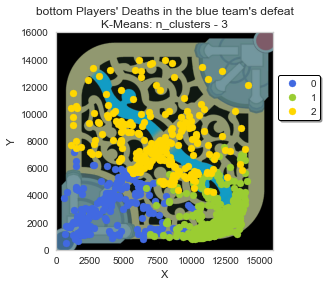

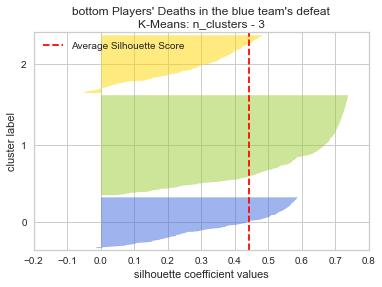

Silhouette score: 0.44396179473767766
1    426
2    246
0    216
Name: cluster, dtype: int64

Inertia: 818.1004360319055

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4372.606481   3220.759259   0.592593
1        1  11595.096244   2459.854460  -0.683099
2        2   7355.166667   7894.565041   0.495935

In [226]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [227]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2263.882863   1527.483548   0.491352
1        1   1391.798059   1411.895934   0.513248
2        2   2703.606748   2174.760043   0.531511

In [228]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10359.0             570.0            7183.0   
1        1           14066.0            6608.0            7544.0   
2        2           14097.0            1087.0           13981.0   

   min coordinate_y  max timestamp  min timestamp  
0             518.0              1              0  
1             796.0              1             -1  
2            4247.0              1             -1

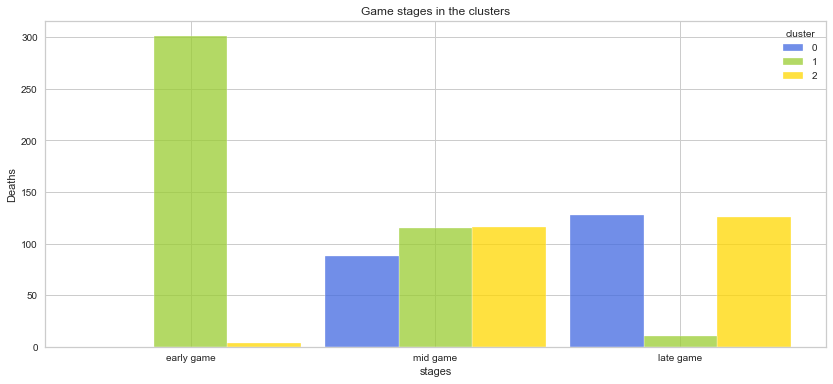

In [229]:
stagesPerClusterV2(blueSideDefeat_df, colors)

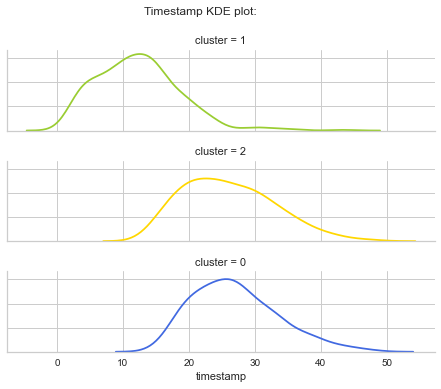

In [230]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [231]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
MissFortune       35
Caitlyn           14
Draven            14
Jinx              13
Samira            11
Xayah              5
Jhin               5
Ashe               3
Nilah              3
Varus              2
Tristana           2
Aphelios           1
Zeri               1
Sivir              1
Ezreal             1
Twitch             1

Deaths with each champion:

In [232]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



MissFortune    298
Draven         113
Caitlyn        103
Jinx           102
Samira          99
Xayah           37
Nilah           36
Jhin            30
Twitch          15
Tristana        14
Ashe            10
Ezreal           9
Varus            8
Aphelios         7
Zeri             4
Sivir            3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [233]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 16 champions when they won on the red side

Cluster 0 - died with 16 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'MissFortune'
 'Nilah' 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus' 'Xayah' 'Zeri']
MissFortune    75
Caitlyn        29
Jinx           27
Draven         21
Samira         19
Xayah           9
Jhin            8
Nilah           7
Ashe            5
Ezreal          5
Tristana        4
Aphelios        2
Varus           2
Zeri            1
Sivir           1
Twitch          1
Name: champion, dtype: int64

Cluster 1 - died with 16 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'MissFortune'
 'Nilah' 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus' 'Xayah' 'Zeri']
MissFortune    135
Jinx            58
Samira          55
Caitlyn         49
Draven          45
Xayah           21
Nilah           20
Jhin            15
Tristana         5
Varus            5
Twitch           5
Aphelios         4
Ashe             3

---
### Silver Players

#### Clustering Red Team Victory

In [234]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
19469   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn   2.950417   
19473   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn   4.959133   
19484   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn   9.730317   
19489   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn  12.665200   
19504   EUW1_6279785081  Red  anonymous 143   euw1  Caitlyn  19.348150   
...                 ...  ...            ...    ...      ...        ...   
611688  EUW1_6288208578  Red  anonymous 143   euw1  Caitlyn   6.692017   
611695  EUW1_6288208578  Red  anonymous 143   euw1  Caitlyn   9.625200   
611700  EUW1_6288208578  Red  anonymous 143   euw1  Caitlyn  11.589983   
611704  EUW1_6288208578  Red  anonymous 143   euw1  Caitlyn  12.979750   
611731  EUW1_6288208578  Red  anonymous 143   euw1  Caitlyn  24.295117   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19469        13617.0        1609.0    NaN            NaN  ...   
19473        13171.0        3665.0    NaN            NaN  ...   
19484        12784.0        3303.0    NaN            NaN  ...   
19489        12545.0        6200.0    NaN            NaN  ...   
19504        13638.0        8520.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
611688       13509.0        1677.0    NaN            NaN  ...   
611695       13108.0        3163.0    NaN            NaN  ...   
611700       12445.0        2253.0    NaN            NaN  ...   
611704       13514.0        1824.0    NaN            NaN  ...   
611731        5628.0        1539.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19469               NaN     True      Death        NaN           NaN   NaN   
19473               NaN     True      Death        NaN           NaN   NaN   
19484               NaN     True      Death        NaN           NaN   NaN   
19489               NaN     True      Death        NaN           NaN   NaN   
19504               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
611688              NaN     True      Death        NaN           NaN   NaN   
611695              NaN     True      Death        NaN           NaN   NaN   
611700              NaN     True      Death        NaN           NaN   NaN   
611704              NaN     True      Death        NaN           NaN   NaN   
611731              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
19469       NaN       NaN  BOTTOM  Silver  
19473       NaN       NaN  BOTTOM  Silver  
19484       NaN       NaN  BOTTOM  Silver  
19489       NaN       NaN  BOTTOM  Silver  
19504       NaN       NaN  BOTTOM  Silver  
...         ...       ...     ...     ...  
611688      NaN       NaN  BOTTOM  Silver  
611695      NaN       NaN  BOTTOM  Silver  
611700      NaN       NaN  BOTTOM  Silver  
611704      NaN       NaN  BOTTOM  Silver  
611731      NaN       NaN  BOTTOM  Silver  

[531 rows x 56 columns]

In [235]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)].copy()

In [236]:
redSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [237]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

102

In [238]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

53.68421052631579

In [239]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_bottom_deaths_df.shape[0]) * 100
winRateRedSide

8.82793017456359

In [240]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 143 won 20 matches on the red side
anonymous 143 has an average of 5.85 deaths per game when winning on the red side

anonymous 64 won 21 matches on the red side
anonymous 64 has an average of 5.0476190476190474 deaths per game when winning on the red side

anonymous 69 won 16 matches on the red side
anonymous 69 has an average of 4.3125 deaths per game when winning on the red side

anonymous 70 won 14 matches on the red side
anonymous 70 has an average of 5.142857142857143 deaths per game when winning on the red side

anonymous 74 won 21 matches on the red side
anonymous 74 has an average of 5.333333333333333 deaths per game when winning on the red side

anonymous 77 won 10 matches on the red side
anonymous 77 has an average of 5.5 deaths per game when winning on the red side



In [241]:
print("Victory games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 102 matches in which the bottom died at least once
6 players died a total of 531 times on the red side
Victory games on red side contains an average of 5.205882352941177 deaths per game


In [242]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
19469        13617.0        1609.0   2.950417
19473        13171.0        3665.0   4.959133
19484        12784.0        3303.0   9.730317
19489        12545.0        6200.0  12.665200
19504        13638.0        8520.0  19.348150
...              ...           ...        ...
611688       13509.0        1677.0   6.692017
611695       13108.0        3163.0   9.625200
611700       12445.0        2253.0  11.589983
611704       13514.0        1824.0  12.979750
611731        5628.0        1539.0  24.295117

[531 rows x 3 columns]

Time discretization

In [243]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [244]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [245]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [246]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [247]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
19469       1.133464     -1.095700         -1
19473       1.012427     -0.390627         -1
19484       0.907402     -0.514769         -1
19489       0.842541      0.478712         -1
19504       1.139163      1.274319          0
...              ...           ...        ...
611688      1.104155     -1.072380         -1
611695      0.995330     -0.562780         -1
611700      0.815403     -0.874850         -1
611704      1.105512     -1.021969         -1
611731     -1.034621     -1.119705          0

[531 rows x 3 columns]

In [248]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.47709403143498685
Silhouette score for k=3: 0.44342639341695517
Silhouette score for k=4: 0.43696836356585916
Silhouette score for k=5: 0.39068088051617356
Silhouette score for k=6: 0.39996622003559507
Silhouette score for k=7: 0.40898224641591613
Silhouette score for k=8: 0.37458046411705465
Silhouette score for k=9: 0.38514149284348026
Silhouette score for k=10: 0.3836320151518954
Silhouette score for k=11: 0.38653013079262144
Silhouette score for k=12: 0.3928434632309939
Silhouette score for k=13: 0.3863465625081718
Silhouette score for k=14: 0.3922757487254422
Silhouette score for k=15: 0.40442452595393596
Silhouette score for k=16: 0.39886068218818493
Silhouette score for k=17: 0.4107296318206211
Silhouette score for k=18: 0.4092865488819014
Silhouette score for k=19: 0.4163022338579817
Silhouette score for k=20: 0.4093284691924829
Silhouette score for k=25: 0.4091321957756814


K-Means with k = 4

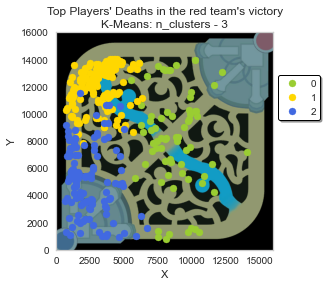

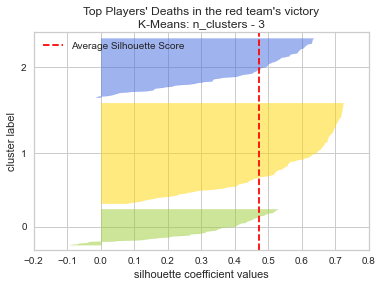

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

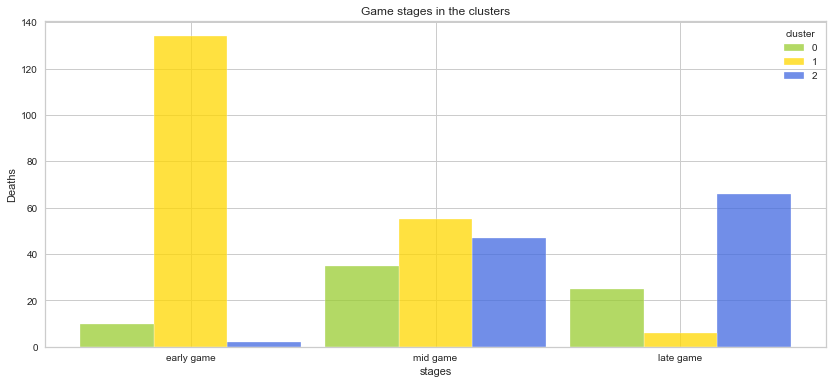

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

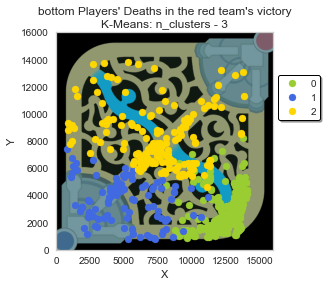

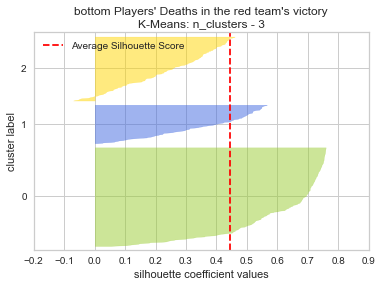

Silhouette score: 0.44342639341695517
0    260
2    169
1    102
Name: cluster, dtype: int64

Inertia: 489.1684645398819

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12409.715385   3035.269231  -0.738462
1        1   5087.107843   3622.117647   0.607843
2        2   7499.621302   8238.674556   0.437870

In [249]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [250]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1257.261060   1429.821975   0.448139
1        1   2390.573608   1579.070714   0.488231
2        2   2830.524517   2147.963986   0.573568

In [251]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14086.0            8083.0            8212.0   
1        1           11182.0             797.0            7388.0   
2        2           13865.0             854.0           13854.0   

   min coordinate_y  max timestamp  min timestamp  
0             832.0              1             -1  
1             758.0              1              0  
2            4635.0              1             -1

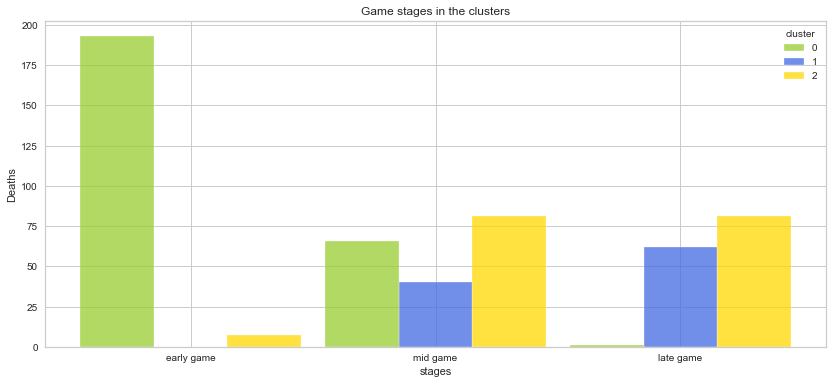

In [252]:
stagesPerClusterV2(redSideVictory_df, colors)

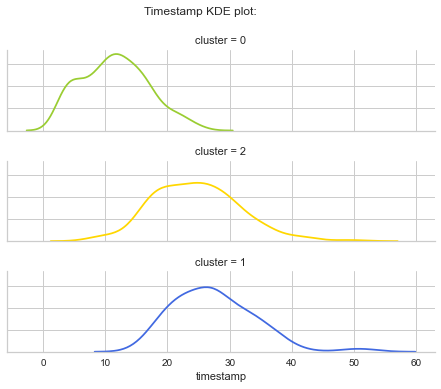

In [253]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [254]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Caitlyn           30
Jinx              25
Kaisa             10
Twitch             9
Samira             6
Vayne              5
Jhin               4
MissFortune        3
Xayah              2
Ezreal             2
Ashe               2
Varus              1
Anivia             1
Sivir              1
KogMaw             1

Deaths with each champion:

In [255]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn        167
Jinx           112
Kaisa           66
Samira          38
Twitch          36
Vayne           28
MissFortune     19
Ashe            15
Jhin            12
Ezreal           9
Xayah            9
Varus            8
KogMaw           5
Sivir            4
Anivia           3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [256]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 15 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Anivia' 'Ashe' 'Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'KogMaw'
 'MissFortune' 'Samira' 'Sivir' 'Twitch' 'Varus' 'Vayne' 'Xayah']
Caitlyn        85
Jinx           56
Kaisa          23
Twitch         17
Samira         16
Vayne          14
MissFortune    11
Jhin            9
Ashe            6
Ezreal          6
KogMaw          5
Xayah           4
Varus           3
Sivir           3
Anivia          2
Name: champion, dtype: int64

Cluster 1 - died with 12 champions:
 ['Ashe' 'Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'MissFortune' 'Samira'
 'Twitch' 'Varus' 'Vayne' 'Xayah']
Caitlyn        28
Jinx           21
Kaisa          16
Samira         11
Twitch          9
Vayne           5
MissFortune     4
Ashe            3
Jhin            2
Ezreal          1
Xayah           1
Varus           1
Name: champion, dtype: int64

Cluster 2 - died with 14 champions:
 ['Anivia' 'Ashe' 'Caitlyn' 'Ezr

---
#### Clustering Red Team Defeat

In [257]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
19637   EUW1_6279674845  Red  anonymous 143   euw1  Caitlyn  12.514750   
19641   EUW1_6279674845  Red  anonymous 143   euw1  Caitlyn  14.529267   
19645   EUW1_6279674845  Red  anonymous 143   euw1  Caitlyn  16.049283   
19647   EUW1_6279674845  Red  anonymous 143   euw1  Caitlyn  17.811750   
19649   EUW1_6279674845  Red  anonymous 143   euw1  Caitlyn  18.902633   
...                 ...  ...            ...    ...      ...        ...   
631781  EUW1_6289536322  Red   anonymous 77   euw1    Varus  15.095700   
631797  EUW1_6289536322  Red   anonymous 77   euw1    Varus  21.135450   
631804  EUW1_6289536322  Red   anonymous 77   euw1    Varus  23.157433   
631807  EUW1_6289536322  Red   anonymous 77   euw1    Varus  25.445117   
631812  EUW1_6289536322  Red   anonymous 77   euw1    Varus  28.564733   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19637        12998.0        1396.0    NaN            NaN  ...   
19641        14060.0        4398.0    NaN            NaN  ...   
19645        12235.0        7596.0    NaN            NaN  ...   
19647        13983.0        6931.0    NaN            NaN  ...   
19649        12502.0        5978.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
631781       10451.0        1488.0    NaN            NaN  ...   
631797       10338.0        4828.0    NaN            NaN  ...   
631804        5468.0        7761.0    NaN            NaN  ...   
631807       12574.0       11974.0    NaN            NaN  ...   
631812       13392.0       12835.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19637               NaN    False      Death        NaN           NaN   NaN   
19641               NaN    False      Death        NaN           NaN   NaN   
19645               NaN    False      Death        NaN           NaN   NaN   
19647               NaN    False      Death        NaN           NaN   NaN   
19649               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
631781              NaN    False      Death        NaN           NaN   NaN   
631797              NaN    False      Death        NaN           NaN   NaN   
631804              NaN    False      Death        NaN           NaN   NaN   
631807              NaN    False      Death        NaN           NaN   NaN   
631812              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
19637       NaN       NaN  BOTTOM  Silver  
19641       NaN       NaN  BOTTOM  Silver  
19645       NaN       NaN  BOTTOM  Silver  
19647       NaN       NaN  BOTTOM  Silver  
19649       NaN       NaN  BOTTOM  Silver  
...         ...       ...     ...     ...  
631781      NaN       NaN  BOTTOM  Silver  
631797      NaN       NaN  BOTTOM  Silver  
631804      NaN       NaN  BOTTOM  Silver  
631807      NaN       NaN  BOTTOM  Silver  
631812      NaN       NaN  BOTTOM  Silver  

[660 rows x 56 columns]

In [258]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)].copy()

In [259]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 143 lost 13 matches on the red side
anonymous 143 has an average of 7.846153846153846 deaths per game when losing on the red side

anonymous 64 lost 20 matches on the red side
anonymous 64 has an average of 7.7 deaths per game when losing on the red side

anonymous 69 lost 17 matches on the red side
anonymous 69 has an average of 7.470588235294118 deaths per game when losing on the red side

anonymous 70 lost 16 matches on the red side
anonymous 70 has an average of 6.9375 deaths per game when losing on the red side

anonymous 74 lost 11 matches on the red side
anonymous 74 has an average of 8.909090909090908 deaths per game when losing on the red side

anonymous 77 lost 11 matches on the red side
anonymous 77 has an average of 6.181818181818182 deaths per game when losing on the red side



In [260]:
print("Defeat games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 88 matches in which the bottom died at least once
6 players died a total of 660 times on the red side
Defeat games on red side contains an average of 7.5 deaths per game


In [261]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
19637        12998.0        1396.0  12.514750
19641        14060.0        4398.0  14.529267
19645        12235.0        7596.0  16.049283
19647        13983.0        6931.0  17.811750
19649        12502.0        5978.0  18.902633
...              ...           ...        ...
631781       10451.0        1488.0  15.095700
631797       10338.0        4828.0  21.135450
631804        5468.0        7761.0  23.157433
631807       12574.0       11974.0  25.445117
631812       13392.0       12835.0  28.564733

[660 rows x 3 columns]

Time discretization

In [262]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [263]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [264]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [265]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [266]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
19637       0.806171     -1.393885         -1
19641       1.172642     -0.573593         -1
19645       0.542878      0.300256          0
19647       1.146072      0.118546          0
19649       0.635014     -0.141860          0
...              ...           ...        ...
631781     -0.072738     -1.368746          0
631797     -0.111732     -0.456096          0
631804     -1.792253      0.345342          0
631807      0.659859      1.496538          1
631812      0.942131      1.731805          1

[660 rows x 3 columns]

In [267]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.437473283613917
Silhouette score for k=3: 0.4468095575881931
Silhouette score for k=4: 0.39593208542081937
Silhouette score for k=5: 0.3690168515086944
Silhouette score for k=6: 0.38760138521220167
Silhouette score for k=7: 0.39371669920243757
Silhouette score for k=8: 0.3926501302851144
Silhouette score for k=9: 0.35125040372269456
Silhouette score for k=10: 0.3698127191707854
Silhouette score for k=11: 0.35428723325666706
Silhouette score for k=12: 0.3883815787212773
Silhouette score for k=13: 0.3897261912997399
Silhouette score for k=14: 0.3903072190163704
Silhouette score for k=15: 0.40818656814908466
Silhouette score for k=16: 0.4031818133497925
Silhouette score for k=17: 0.4125456165673823
Silhouette score for k=18: 0.4227791460824042
Silhouette score for k=19: 0.4215707617994929
Silhouette score for k=20: 0.4125552231666429
Silhouette score for k=25: 0.4113452015574246


K-Means with k = 3

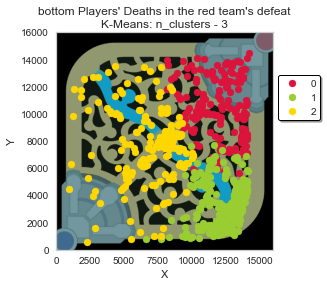

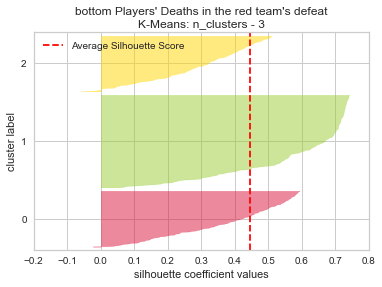

Silhouette score: 0.4468095575881931
1    299
0    181
2    180
Name: cluster, dtype: int64

Inertia: 595.3569349469738

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11757.303867  10345.613260   0.607735
1        1  12339.511706   3400.160535  -0.715719
2        2   6773.300000   7771.794444   0.327778

In [268]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [269]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1570.547401   2265.607475   0.499443
1        1   1297.921836   1566.684839   0.458426
2        2   2123.868619   2723.920985   0.546001

In [270]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14193.0            8142.0           14445.0   
1        1           14098.0            6612.0            7715.0   
2        2           10072.0             926.0           13560.0   

   min coordinate_y  max timestamp  min timestamp  
0            4777.0              1             -1  
1             758.0              1             -1  
2             568.0              1             -1

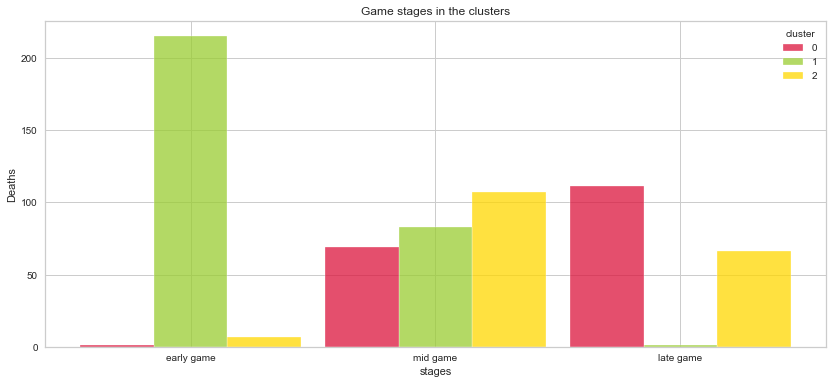

In [271]:
stagesPerClusterV2(redSideDefeat_df, colors)

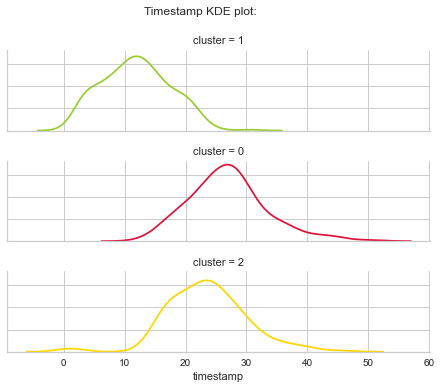

In [272]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [273]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Caitlyn           26
Jinx              20
Kaisa              8
Samira             8
Twitch             7
Zeri               3
Draven             3
Varus              2
Ashe               2
Xayah              2
Vayne              2
Lucian             1
Ezreal             1
MissFortune        1
Sivir              1
Anivia             1

Deaths with each champion:

In [274]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn        195
Jinx           152
Samira          76
Kaisa           58
Twitch          47
Zeri            30
Draven          23
Ashe            17
Vayne           15
Xayah           14
Lucian           9
Varus            9
MissFortune      5
Ezreal           4
Anivia           4
Sivir            2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [275]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 16 champions when they won on the red side

Cluster 0 - died with 14 champions:
 ['Anivia' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jinx' 'Kaisa' 'Lucian'
 'Samira' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Zeri']
Caitlyn    61
Jinx       38
Kaisa      19
Samira     18
Twitch     13
Zeri       10
Draven      6
Xayah       4
Ashe        3
Lucian      2
Vayne       2
Anivia      2
Varus       2
Ezreal      1
Name: champion, dtype: int64

Cluster 1 - died with 15 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jinx' 'Kaisa' 'Lucian' 'MissFortune'
 'Samira' 'Sivir' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Zeri']
Caitlyn        86
Jinx           71
Samira         32
Kaisa          25
Twitch         19
Zeri           12
Draven         11
Vayne          10
Ashe            9
Xayah           8
MissFortune     4
Lucian          4
Varus           4
Ezreal          2
Sivir           2
Name: champion, dtype: int64

Cluster 2 - died with 15 champions:
 ['Anivia' 'Ashe' 'Caitlyn' 'Draven' 'E

---
#### Clustering Blue Team Victory

In [276]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region     champion  timestamp  \
20361   EUW1_6276125432  Blue  anonymous 143   euw1  MissFortune  12.984233   
20390   EUW1_6276125432  Blue  anonymous 143   euw1  MissFortune  23.528417   
20996   EUW1_6275429433  Blue  anonymous 143   euw1      Caitlyn   4.898783   
21003   EUW1_6275429433  Blue  anonymous 143   euw1      Caitlyn   8.085850   
21012   EUW1_6275429433  Blue  anonymous 143   euw1      Caitlyn  12.954300   
...                 ...   ...            ...    ...          ...        ...   
631494  EUW1_6289242028  Blue   anonymous 74   euw1      Caitlyn   8.558317   
631504  EUW1_6289242028  Blue   anonymous 74   euw1      Caitlyn  14.232633   
631508  EUW1_6289242028  Blue   anonymous 74   euw1      Caitlyn  16.163883   
631517  EUW1_6289242028  Blue   anonymous 74   euw1      Caitlyn  20.649350   
631528  EUW1_6289242028  Blue   anonymous 74   euw1      Caitlyn  24.677250   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
20361        13078.0        5476.0    NaN            NaN  ...   
20390        10589.0       10714.0    NaN            NaN  ...   
20996        11948.0        1393.0    NaN            NaN  ...   
21003        11369.0        1128.0    NaN            NaN  ...   
21012        12917.0        1422.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
631494       10080.0         866.0    NaN            NaN  ...   
631504       10704.0        1458.0    NaN            NaN  ...   
631508       12687.0        2035.0    NaN            NaN  ...   
631517       12469.0        2397.0    NaN            NaN  ...   
631528        7564.0        1374.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
20361               NaN     True      Death        NaN           NaN   NaN   
20390               NaN     True      Death        NaN           NaN   NaN   
20996               NaN     True      Death        NaN           NaN   NaN   
21003               NaN     True      Death        NaN           NaN   NaN   
21012               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
631494              NaN     True      Death        NaN           NaN   NaN   
631504              NaN     True      Death        NaN           NaN   NaN   
631508              NaN     True      Death        NaN           NaN   NaN   
631517              NaN     True      Death        NaN           NaN   NaN   
631528              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
20361       NaN       NaN  BOTTOM  Silver  
20390       NaN       NaN  BOTTOM  Silver  
20996       NaN       NaN  BOTTOM  Silver  
21003       NaN       NaN  BOTTOM  Silver  
21012       NaN       NaN  BOTTOM  Silver  
...         ...       ...     ...     ...  
631494      NaN       NaN  BOTTOM  Silver  
631504      NaN       NaN  BOTTOM  Silver  
631508      NaN       NaN  BOTTOM  Silver  
631517      NaN       NaN  BOTTOM  Silver  
631528      NaN       NaN  BOTTOM  Silver  

[653 rows x 56 columns]

In [277]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)].copy()

In [278]:
blueSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [279]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

121

In [280]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

54.01785714285714

In [281]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_bottom_deaths_df.shape[0]) * 100
winRateBlueSide

11.420076949982512

In [282]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 143 won 8 matches on the blue side
anonymous 143 has an average of 5.0 deaths per game when winning on the blue side

anonymous 64 won 23 matches on the blue side
anonymous 64 has an average of 5.304347826086956 deaths per game when winning on the blue side

anonymous 69 won 23 matches on the blue side
anonymous 69 has an average of 4.739130434782608 deaths per game when winning on the blue side

anonymous 70 won 25 matches on the blue side
anonymous 70 has an average of 6.16 deaths per game when winning on the blue side

anonymous 74 won 21 matches on the blue side
anonymous 74 has an average of 6.238095238095238 deaths per game when winning on the blue side

anonymous 77 won 21 matches on the blue side
anonymous 77 has an average of 4.619047619047619 deaths per game when winning on the blue side



In [283]:
print("Victory games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 121 matches in which the bottom died at least once
6 players died a total of 653 times on the blue side
Victory games on blue side contains an average of 5.396694214876033 deaths per game


In [284]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
20361        13078.0        5476.0  12.984233
20390        10589.0       10714.0  23.528417
20996        11948.0        1393.0   4.898783
21003        11369.0        1128.0   8.085850
21012        12917.0        1422.0  12.954300
...              ...           ...        ...
631494       10080.0         866.0   8.558317
631504       10704.0        1458.0  14.232633
631508       12687.0        2035.0  16.163883
631517       12469.0        2397.0  20.649350
631528        7564.0        1374.0  24.677250

[653 rows x 3 columns]

Time discretization

In [285]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [286]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [287]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [288]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [289]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
20361       0.971423     -0.048901         -1
20390       0.144575      1.366363          0
20996       0.596036     -1.152093         -1
21003       0.403692     -1.223694         -1
21012       0.917939     -1.144258         -1
...              ...           ...        ...
631494     -0.024515     -1.294484         -1
631504      0.182779     -1.134531         -1
631508      0.841532     -0.978630          0
631517      0.769113     -0.880821          0
631528     -0.860332     -1.157227          0

[653 rows x 3 columns]

In [290]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.44730605798038614
Silhouette score for k=3: 0.45159246204354975
Silhouette score for k=4: 0.38826187206144275
Silhouette score for k=5: 0.3719563441011738
Silhouette score for k=6: 0.3809647952852655
Silhouette score for k=7: 0.38467931896027413
Silhouette score for k=8: 0.38300987344687404
Silhouette score for k=9: 0.3511220451388499
Silhouette score for k=10: 0.35711637426866105
Silhouette score for k=11: 0.37299948062945787
Silhouette score for k=12: 0.3744493551113863
Silhouette score for k=13: 0.3884108884664946
Silhouette score for k=14: 0.39760783137210676
Silhouette score for k=15: 0.3766692619476321
Silhouette score for k=16: 0.40274159795485887
Silhouette score for k=17: 0.4029703212328458
Silhouette score for k=18: 0.4144611295712871
Silhouette score for k=19: 0.38760218125803586
Silhouette score for k=20: 0.3959839907597104
Silhouette score for k=25: 0.4223472273759832


K-Means with k = 3

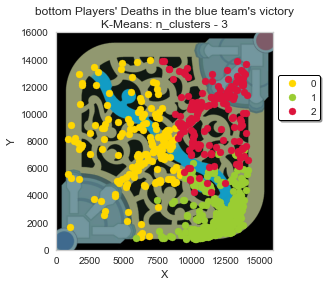

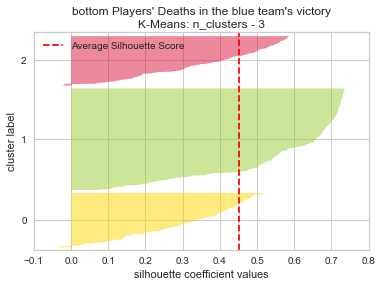

Silhouette score: 0.45159246204354975
1    323
0    173
2    157
Name: cluster, dtype: int64

Inertia: 586.5444919942388

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6003.988439   7571.479769   0.329480
1        1  11744.504644   2659.386997  -0.693498
2        2  11453.904459   9714.420382   0.554140

In [291]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [292]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2121.046876   2690.661142   0.570061
1        1   1386.486980   1489.540973   0.493476
2        2   1704.309483   2333.043514   0.509713

In [293]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9258.0             871.0           13966.0   
1        1           14146.0            5907.0            7347.0   
2        2           14110.0            7820.0           13914.0   

   min coordinate_y  max timestamp  min timestamp  
0             915.0              1             -1  
1             808.0              1             -1  
2            4243.0              1             -1

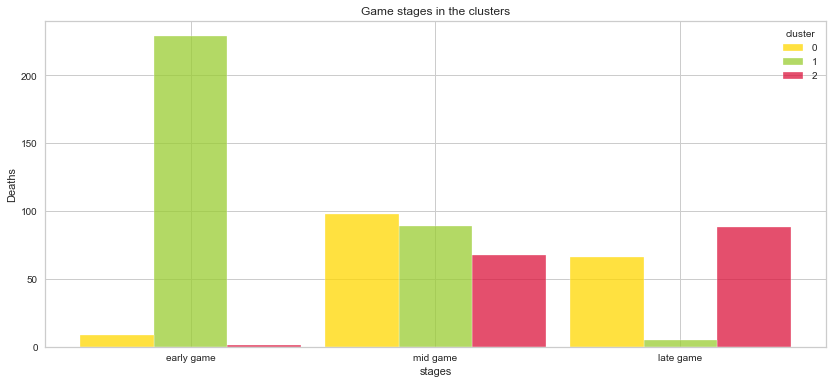

In [294]:
stagesPerClusterV2(blueSideVictory_df, colors)

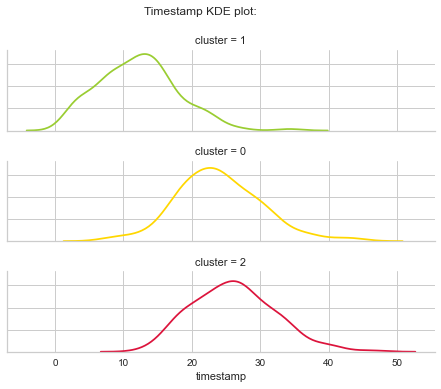

In [295]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [296]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx              25
Kaisa             19
Caitlyn           18
Twitch            14
Samira             9
Draven             9
Vayne              5
MissFortune        5
Varus              4
Ashe               3
Lucian             2
Xayah              2
Aphelios           1
KogMaw             1
Ezreal             1
Sivir              1
Syndra             1
Jhin               1

Deaths with each champion:

In [297]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx           135
Kaisa           99
Caitlyn         89
Twitch          73
Draven          64
Samira          56
MissFortune     33
Varus           22
Vayne           20
Ashe            18
Lucian           8
Syndra           7
Xayah            7
KogMaw           6
Jhin             6
Ezreal           5
Aphelios         3
Sivir            2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [298]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 18 champions when they won on the red side

Cluster 0 - died with 16 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'KogMaw'
 'Lucian' 'MissFortune' 'Samira' 'Syndra' 'Twitch' 'Varus' 'Vayne' 'Xayah']
Jinx           33
Kaisa          29
Caitlyn        26
Twitch         26
MissFortune    11
Samira         11
Draven         10
Varus           7
Ashe            4
Vayne           3
Lucian          3
Jhin            3
Syndra          2
Xayah           2
KogMaw          2
Ezreal          1
Name: champion, dtype: int64

Cluster 1 - died with 18 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'KogMaw' 'Lucian' 'MissFortune' 'Samira' 'Sivir' 'Syndra' 'Twitch'
 'Varus' 'Vayne' 'Xayah']
Jinx           74
Caitlyn        45
Kaisa          41
Draven         37
Twitch         34
Samira         30
Ashe           12
Vayne          11
Varus          10
MissFortune    10
Syndra          4
Lucian          3
Aphelios      

---
#### Clustering Blue Team Defeat

In [299]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region  champion  timestamp  \
19409   EUW1_6279876176  Blue  anonymous 143   euw1      Jinx   3.869850   
19415   EUW1_6279876176  Blue  anonymous 143   euw1      Jinx   6.715800   
19422   EUW1_6279876176  Blue  anonymous 143   euw1      Jinx   9.729500   
19426   EUW1_6279876176  Blue  anonymous 143   euw1      Jinx  11.619250   
19433   EUW1_6279876176  Blue  anonymous 143   euw1      Jinx  16.360983   
...                 ...   ...            ...    ...       ...        ...   
631454  EUW1_6289299594  Blue   anonymous 74   euw1  Aphelios  21.279317   
631458  EUW1_6289299594  Blue   anonymous 74   euw1  Aphelios  23.519450   
631462  EUW1_6289299594  Blue   anonymous 74   euw1  Aphelios  25.793233   
631466  EUW1_6289299594  Blue   anonymous 74   euw1  Aphelios  27.874050   
631473  EUW1_6289299594  Blue   anonymous 74   euw1  Aphelios  31.701600   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19409        10418.0        1166.0    NaN            NaN  ...   
19415        10275.0        4748.0    NaN            NaN  ...   
19422        10792.0        1584.0    NaN            NaN  ...   
19426        13007.0        2518.0    NaN            NaN  ...   
19433        13009.0        3303.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
631454        6447.0        6279.0    NaN            NaN  ...   
631458        5450.0        1308.0    NaN            NaN  ...   
631462        8666.0        4866.0    NaN            NaN  ...   
631466        5201.0        8555.0    NaN            NaN  ...   
631473        8252.0        2126.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19409               NaN    False      Death        NaN           NaN   NaN   
19415               NaN    False      Death        NaN           NaN   NaN   
19422               NaN    False      Death        NaN           NaN   NaN   
19426               NaN    False      Death        NaN           NaN   NaN   
19433               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
631454              NaN    False      Death        NaN           NaN   NaN   
631458              NaN    False      Death        NaN           NaN   NaN   
631462              NaN    False      Death        NaN           NaN   NaN   
631466              NaN    False      Death        NaN           NaN   NaN   
631473              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
19409       NaN       NaN  BOTTOM  Silver  
19415       NaN       NaN  BOTTOM  Silver  
19422       NaN       NaN  BOTTOM  Silver  
19426       NaN       NaN  BOTTOM  Silver  
19433       NaN       NaN  BOTTOM  Silver  
...         ...       ...     ...     ...  
631454      NaN       NaN  BOTTOM  Silver  
631458      NaN       NaN  BOTTOM  Silver  
631462      NaN       NaN  BOTTOM  Silver  
631466      NaN       NaN  BOTTOM  Silver  
631473      NaN       NaN  BOTTOM  Silver  

[750 rows x 56 columns]

In [300]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)].copy()

In [301]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 143 lost 17 matches on the blue side
anonymous 143 has an average of 6.9411764705882355 deaths per game when losing on the blue side

anonymous 64 lost 28 matches on the blue side
anonymous 64 has an average of 7.071428571428571 deaths per game when losing on the blue side

anonymous 69 lost 15 matches on the blue side
anonymous 69 has an average of 7.2 deaths per game when losing on the blue side

anonymous 70 lost 16 matches on the blue side
anonymous 70 has an average of 7.5625 deaths per game when losing on the blue side

anonymous 74 lost 15 matches on the blue side
anonymous 74 has an average of 8.4 deaths per game when losing on the blue side

anonymous 77 lost 12 matches on the blue side
anonymous 77 has an average of 6.583333333333333 deaths per game when losing on the blue side



In [302]:
print("Defeat games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 103 matches in which the bottom died at least once
6 players died a total of 750 times on the blue side
Defeat games on blue side contains an average of 7.281553398058253 deaths per game


In [303]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
19409        10418.0        1166.0   3.869850
19415        10275.0        4748.0   6.715800
19422        10792.0        1584.0   9.729500
19426        13007.0        2518.0  11.619250
19433        13009.0        3303.0  16.360983
...              ...           ...        ...
631454        6447.0        6279.0  21.279317
631458        5450.0        1308.0  23.519450
631462        8666.0        4866.0  25.793233
631466        5201.0        8555.0  27.874050
631473        8252.0        2126.0  31.701600

[750 rows x 3 columns]

Time discretization

In [304]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [305]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [306]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [307]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [308]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
19409       0.505020     -1.038275         -1
19415       0.466915      0.196388         -1
19422       0.604679     -0.894197         -1
19426       1.194906     -0.572260         -1
19433       1.195439     -0.301682          0
...              ...           ...        ...
631454     -0.553125      0.724102          0
631458     -0.818794     -0.989330          0
631462      0.038168      0.237061          1
631466     -0.885144      1.508606          1
631473     -0.072150     -0.707377          1

[750 rows x 3 columns]

In [309]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4571783337039043
Silhouette score for k=3: 0.4457269253786522
Silhouette score for k=4: 0.432421610863765
Silhouette score for k=5: 0.36983690150252424
Silhouette score for k=6: 0.39273019868896836
Silhouette score for k=7: 0.4053388526007891
Silhouette score for k=8: 0.4162470091239852
Silhouette score for k=9: 0.3723823567674481
Silhouette score for k=10: 0.3746534569393862
Silhouette score for k=11: 0.3883985883157317
Silhouette score for k=12: 0.3888470291544548
Silhouette score for k=13: 0.3973817366047927
Silhouette score for k=14: 0.3788178125996137
Silhouette score for k=15: 0.3900130658667764
Silhouette score for k=16: 0.395493962186635
Silhouette score for k=17: 0.40175525074347684
Silhouette score for k=18: 0.39727701565729195
Silhouette score for k=19: 0.40561124823385886
Silhouette score for k=20: 0.4053008904764409
Silhouette score for k=25: 0.3942843975575535


K-Means with k = 3

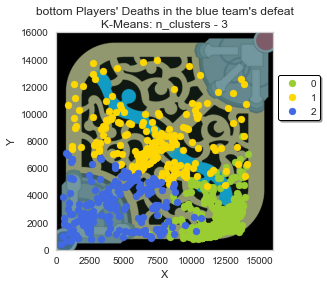

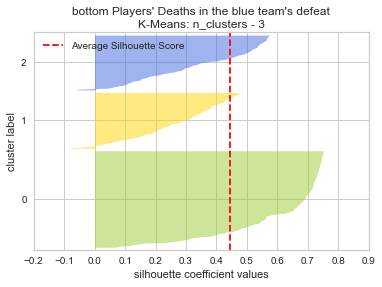

Silhouette score: 0.4457269253786522
0    350
1    202
2    198
Name: cluster, dtype: int64

Inertia: 682.7782037714054

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11583.008571   2423.391429  -0.748571
1        1   7194.316832   8056.044554   0.391089
2        2   4468.525253   3324.095960   0.585859

In [310]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [311]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1416.256459   1365.902458   0.453161
1        1   3006.108273   2070.027862   0.536324
2        2   2406.215572   1642.722871   0.492573

In [312]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14110.0            6643.0            8393.0   
1        1           14050.0             889.0           14002.0   
2        2           10655.0             366.0            7099.0   

   min coordinate_y  max timestamp  min timestamp  
0             808.0              1             -1  
1            4668.0              1             -1  
2             462.0              1              0

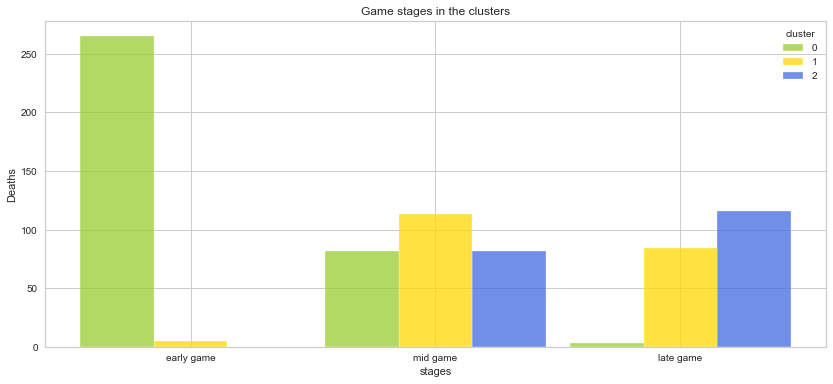

In [313]:
stagesPerClusterV2(blueSideDefeat_df, colors)

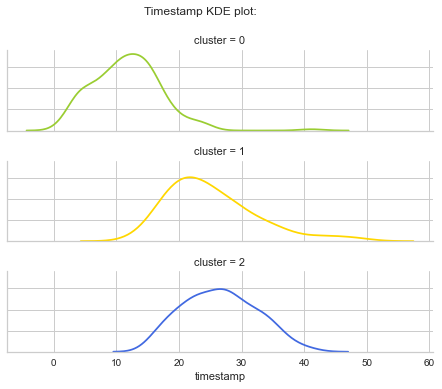

In [314]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [315]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Caitlyn           24
Jinx              23
Vayne              8
Kaisa              8
Samira             7
Twitch             7
Ezreal             6
Sivir              4
Draven             3
MissFortune        3
Ashe               2
Xayah              2
Varus              2
Zeri               1
Lucian             1
Jhin               1
Aphelios           1

Deaths with each champion:

In [316]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx           174
Caitlyn        162
Kaisa           64
Vayne           63
Samira          53
Twitch          49
Ezreal          43
Sivir           31
MissFortune     25
Xayah           17
Draven          14
Varus           13
Aphelios        13
Ashe            12
Lucian           6
Jhin             6
Zeri             5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [317]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 17 champions when they won on the red side

Cluster 0 - died with 17 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Lucian' 'MissFortune' 'Samira' 'Sivir' 'Twitch' 'Varus' 'Vayne' 'Xayah'
 'Zeri']
Caitlyn        73
Jinx           72
Vayne          34
Samira         28
Kaisa          27
Ezreal         25
Twitch         21
Sivir          14
MissFortune    10
Draven          8
Ashe            8
Xayah           8
Aphelios        8
Lucian          5
Varus           4
Jhin            3
Zeri            2
Name: champion, dtype: int64

Cluster 1 - died with 15 champions:
 ['Aphelios' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'MissFortune' 'Samira' 'Sivir' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Zeri']
Caitlyn        48
Jinx           44
Kaisa          24
Twitch         18
Vayne          14
Ezreal         10
MissFortune     9
Samira          9
Sivir           8
Xayah           5
Varus           5
Draven          2
Zeri           

---
### Gold Players

#### Clustering Red Team Victory

In [318]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
70436   EUW1_6273310731  Red  anonymous 174   euw1     Jinx   9.510050   
70440   EUW1_6273310731  Red  anonymous 174   euw1     Jinx  11.590167   
70446   EUW1_6273310731  Red  anonymous 174   euw1     Jinx  14.458567   
70451   EUW1_6273310731  Red  anonymous 174   euw1     Jinx  16.469667   
70456   EUW1_6273310731  Red  anonymous 174   euw1     Jinx  19.782917   
...                 ...  ...            ...    ...      ...        ...   
627589  EUW1_6289862549  Red   anonymous 54   euw1     Jinx  25.771050   
628719  EUW1_6289566036  Red   anonymous 60   euw1   Draven   9.196717   
628726  EUW1_6289566036  Red   anonymous 60   euw1   Draven  12.197683   
628729  EUW1_6289566036  Red   anonymous 60   euw1   Draven  14.078850   
628736  EUW1_6289566036  Red   anonymous 60   euw1   Draven  17.628850   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
70436        13112.0        3242.0    NaN            NaN  ...   
70440        12573.0        1276.0    NaN            NaN  ...   
70446        13277.0        3667.0    NaN            NaN  ...   
70451         5061.0        6116.0    NaN            NaN  ...   
70456         8667.0        5996.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
627589        5218.0       10324.0    NaN            NaN  ...   
628719       12869.0        2593.0    NaN            NaN  ...   
628726       13871.0        3776.0    NaN            NaN  ...   
628729        9904.0        2713.0    NaN            NaN  ...   
628736        8264.0        3485.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
70436               NaN     True      Death        NaN           NaN   NaN   
70440               NaN     True      Death        NaN           NaN   NaN   
70446               NaN     True      Death        NaN           NaN   NaN   
70451               NaN     True      Death        NaN           NaN   NaN   
70456               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
627589              NaN     True      Death        NaN           NaN   NaN   
628719              NaN     True      Death        NaN           NaN   NaN   
628726              NaN     True      Death        NaN           NaN   NaN   
628729              NaN     True      Death        NaN           NaN   NaN   
628736              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
70436       NaN       NaN  BOTTOM  Gold  
70440       NaN       NaN  BOTTOM  Gold  
70446       NaN       NaN  BOTTOM  Gold  
70451       NaN       NaN  BOTTOM  Gold  
70456       NaN       NaN  BOTTOM  Gold  
...         ...       ...     ...   ...  
627589      NaN       NaN  BOTTOM  Gold  
628719      NaN       NaN  BOTTOM  Gold  
628726      NaN       NaN  BOTTOM  Gold  
628729      NaN       NaN  BOTTOM  Gold  
628736      NaN       NaN  BOTTOM  Gold  

[527 rows x 56 columns]

In [319]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)].copy()

In [320]:
redSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [321]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

108

In [322]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

54.2713567839196

In [323]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_bottom_deaths_df.shape[0]) * 100
winRateRedSide

8.761429758935993

In [324]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 174 won 5 matches on the red side
anonymous 174 has an average of 3.6 deaths per game when winning on the red side

anonymous 178 won 13 matches on the red side
anonymous 178 has an average of 4.153846153846154 deaths per game when winning on the red side

anonymous 181 won 13 matches on the red side
anonymous 181 has an average of 5.769230769230769 deaths per game when winning on the red side

anonymous 52 won 9 matches on the red side
anonymous 52 has an average of 4.222222222222222 deaths per game when winning on the red side

anonymous 54 won 34 matches on the red side
anonymous 54 has an average of 6.029411764705882 deaths per game when winning on the red side

anonymous 58 won 16 matches on the red side
anonymous 58 has an average of 2.8125 deaths per game when winning on the red side

anonymous 60 won 18 matches on the red side
anonymous 60 has an average of 5.111111111111111 deaths per game when winning on the red side



In [325]:
print("Victory games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 108 matches in which the bottom died at least once
7 players died a total of 527 times on the red side
Victory games on red side contains an average of 4.87962962962963 deaths per game


In [326]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
70436        13112.0        3242.0   9.510050
70440        12573.0        1276.0  11.590167
70446        13277.0        3667.0  14.458567
70451         5061.0        6116.0  16.469667
70456         8667.0        5996.0  19.782917
...              ...           ...        ...
627589        5218.0       10324.0  25.771050
628719       12869.0        2593.0   9.196717
628726       13871.0        3776.0  12.197683
628729        9904.0        2713.0  14.078850
628736        8264.0        3485.0  17.628850

[527 rows x 3 columns]

Time discretization

In [327]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [328]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [329]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [330]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [331]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
70436       0.924917     -0.498823         -1
70440       0.774013     -1.149076         -1
70446       0.971112     -0.358254         -1
70451      -1.329123      0.451751          0
70456      -0.319551      0.412061          0
...              ...           ...        ...
627589     -1.285168      1.843544          1
628719      0.856884     -0.713479         -1
628726      1.137414     -0.322203         -1
628729      0.026772     -0.673789         -1
628736     -0.432379     -0.418451          0

[527 rows x 3 columns]

In [332]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.5033867016585192
Silhouette score for k=3: 0.4956697832790119
Silhouette score for k=4: 0.46211754477166994
Silhouette score for k=5: 0.41005060498921375
Silhouette score for k=6: 0.4132043215168144
Silhouette score for k=7: 0.3641557945937225
Silhouette score for k=8: 0.36511529132222886
Silhouette score for k=9: 0.37805777389911355
Silhouette score for k=10: 0.37990303244682483
Silhouette score for k=11: 0.39454707210211415
Silhouette score for k=12: 0.40297675347156786
Silhouette score for k=13: 0.39437618032073324
Silhouette score for k=14: 0.4009375223300882
Silhouette score for k=15: 0.41447421827755054
Silhouette score for k=16: 0.40404230745911707
Silhouette score for k=17: 0.38758565857085153
Silhouette score for k=18: 0.3884340710223332
Silhouette score for k=19: 0.3799795032385512
Silhouette score for k=20: 0.4192701282007633
Silhouette score for k=25: 0.4210779853535548


K-Means with k = 4

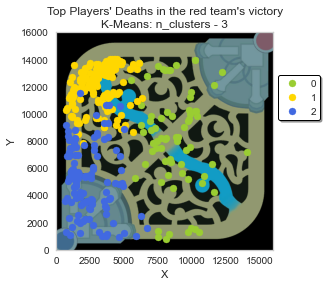

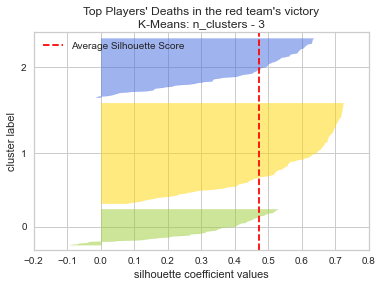

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

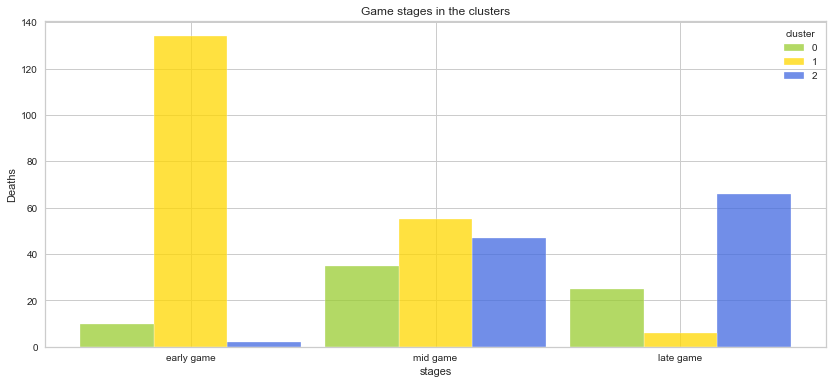

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

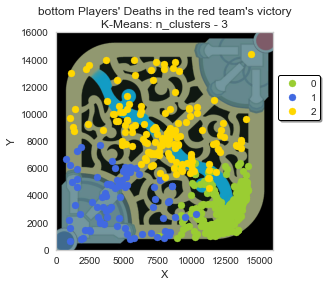

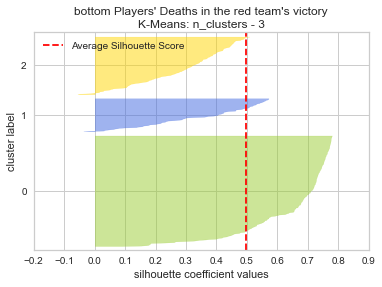

Silhouette score: 0.4956697832790119
0    289
2    151
1     87
Name: cluster, dtype: int64

Inertia: 454.69038870374277

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12329.086505   3018.737024  -0.799308
1        1   4745.114943   3694.034483   0.597701
2        2   7901.205298   8672.437086   0.317881

In [333]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [334]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1270.709990   1309.169985   0.433701
1        1   2355.714902   1927.280178   0.490362
2        2   2769.280437   2172.202004   0.556370

In [335]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14098.0            7602.0            6685.0   
1        1           10269.0             732.0            7699.0   
2        2           14340.0            1062.0           14391.0   

   min coordinate_y  max timestamp  min timestamp  
0             894.0              1             -1  
1             654.0              1              0  
2            4516.0              1             -1

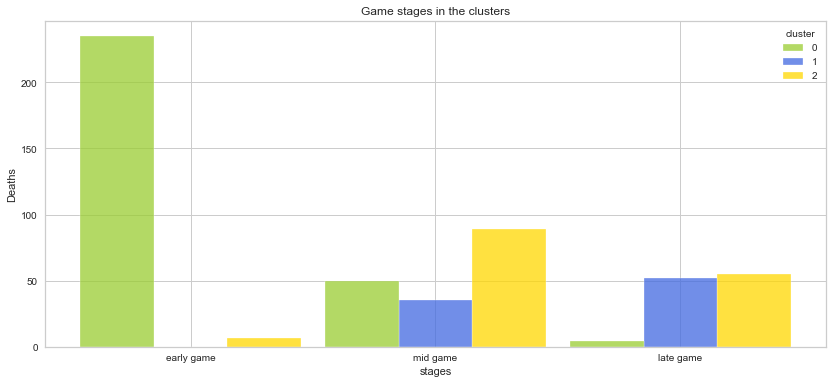

In [336]:
stagesPerClusterV2(redSideVictory_df, colors)

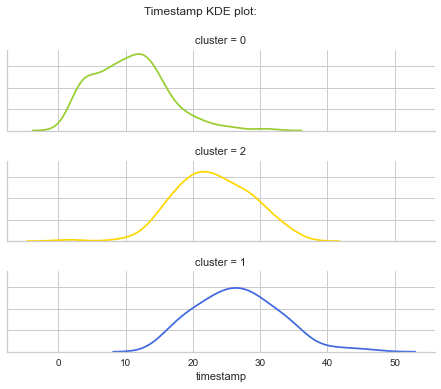

In [337]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [338]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx           38
Jhin           21
Sivir          15
Draven         14
Caitlyn         7
Ezreal          3
Xayah           2
Varus           2
Tristana        2
Kaisa           1
Kalista         1
Vayne           1
Ashe            1

Deaths with each champion:

In [339]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx        222
Sivir        79
Jhin         68
Draven       65
Caitlyn      29
Xayah        15
Ashe         12
Vayne        11
Tristana     10
Ezreal        8
Varus         6
Kalista       1
Kaisa         1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [340]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 13 champions when they won on the red side

Cluster 0 - died with 11 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Sivir' 'Tristana'
 'Varus' 'Vayne' 'Xayah']
Jinx        116
Sivir        47
Jhin         41
Draven       34
Caitlyn      17
Ashe          7
Ezreal        7
Tristana      6
Vayne         6
Varus         5
Xayah         3
Name: champion, dtype: int64

Cluster 1 - died with 9 champions:
 ['Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Sivir' 'Vayne' 'Xayah']
Jinx       42
Draven     15
Sivir      11
Caitlyn     7
Jhin        6
Xayah       3
Kaisa       1
Vayne       1
Ezreal      1
Name: champion, dtype: int64

Cluster 2 - died with 11 champions:
 ['Ashe' 'Caitlyn' 'Draven' 'Jhin' 'Jinx' 'Kalista' 'Sivir' 'Tristana'
 'Varus' 'Vayne' 'Xayah']
Jinx        64
Jhin        21
Sivir       21
Draven      16
Xayah        9
Caitlyn      5
Ashe         5
Vayne        4
Tristana     4
Kalista      1
Varus        1
Name: champion, dtype: i

---
#### Clustering Red Team Defeat

In [341]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
69978   EUW1_6276251700  Red  anonymous 174   euw1   Lucian   8.358417   
69985   EUW1_6276251700  Red  anonymous 174   euw1   Lucian  11.229883   
70007   EUW1_6276251700  Red  anonymous 174   euw1   Lucian  19.782017   
70019   EUW1_6276251700  Red  anonymous 174   euw1   Lucian  24.821917   
70030   EUW1_6276251700  Red  anonymous 174   euw1   Lucian  29.628317   
...                 ...  ...            ...    ...      ...        ...   
620709  EUW1_6289210770  Red  anonymous 181   euw1    Sivir  38.454783   
620712  EUW1_6289210770  Red  anonymous 181   euw1    Sivir  40.901550   
620716  EUW1_6289210770  Red  anonymous 181   euw1    Sivir  42.744150   
620720  EUW1_6289210770  Red  anonymous 181   euw1    Sivir  45.438783   
620724  EUW1_6289210770  Red  anonymous 181   euw1    Sivir  48.305917   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
69978        12603.0        1634.0    NaN            NaN  ...   
69985        11619.0        1913.0    NaN            NaN  ...   
70007        11044.0        3689.0    NaN            NaN  ...   
70019         5448.0        5655.0    NaN            NaN  ...   
70030         2635.0        3594.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
620709        1708.0        7826.0    NaN            NaN  ...   
620712        2523.0       12871.0    NaN            NaN  ...   
620716       14046.0        6436.0    NaN            NaN  ...   
620720        7790.0        1574.0    NaN            NaN  ...   
620724       12320.0       12524.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
69978               NaN    False      Death        NaN           NaN   NaN   
69985               NaN    False      Death        NaN           NaN   NaN   
70007               NaN    False      Death        NaN           NaN   NaN   
70019               NaN    False      Death        NaN           NaN   NaN   
70030               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
620709              NaN    False      Death        NaN           NaN   NaN   
620712              NaN    False      Death        NaN           NaN   NaN   
620716              NaN    False      Death        NaN           NaN   NaN   
620720              NaN    False      Death        NaN           NaN   NaN   
620724              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
69978       NaN       NaN  BOTTOM  Gold  
69985       NaN       NaN  BOTTOM  Gold  
70007       NaN       NaN  BOTTOM  Gold  
70019       NaN       NaN  BOTTOM  Gold  
70030       NaN       NaN  BOTTOM  Gold  
...         ...       ...     ...   ...  
620709      NaN       NaN  BOTTOM  Gold  
620712      NaN       NaN  BOTTOM  Gold  
620716      NaN       NaN  BOTTOM  Gold  
620720      NaN       NaN  BOTTOM  Gold  
620724      NaN       NaN  BOTTOM  Gold  

[636 rows x 56 columns]

In [342]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)].copy()

In [343]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 174 lost 4 matches on the red side
anonymous 174 has an average of 4.75 deaths per game when losing on the red side

anonymous 178 lost 8 matches on the red side
anonymous 178 has an average of 6.75 deaths per game when losing on the red side

anonymous 181 lost 15 matches on the red side
anonymous 181 has an average of 8.4 deaths per game when losing on the red side

anonymous 52 lost 12 matches on the red side
anonymous 52 has an average of 7.333333333333333 deaths per game when losing on the red side

anonymous 54 lost 22 matches on the red side
anonymous 54 has an average of 7.863636363636363 deaths per game when losing on the red side

anonymous 58 lost 12 matches on the red side
anonymous 58 has an average of 5.083333333333333 deaths per game when losing on the red side

anonymous 60 lost 18 matches on the red side
anonymous 60 has an average of 6.388888888888889 deaths per game when losing on the red side



In [344]:
print("Defeat games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 91 matches in which the bottom died at least once
7 players died a total of 636 times on the red side
Defeat games on red side contains an average of 6.989010989010989 deaths per game


In [345]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
69978        12603.0        1634.0   8.358417
69985        11619.0        1913.0  11.229883
70007        11044.0        3689.0  19.782017
70019         5448.0        5655.0  24.821917
70030         2635.0        3594.0  29.628317
...              ...           ...        ...
620709        1708.0        7826.0  38.454783
620712        2523.0       12871.0  40.901550
620716       14046.0        6436.0  42.744150
620720        7790.0        1574.0  45.438783
620724       12320.0       12524.0  48.305917

[636 rows x 3 columns]

Time discretization

In [346]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [347]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [348]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [349]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [350]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
69978       0.631927     -1.340004         -1
69985       0.320901     -1.264398         -1
70007       0.139154     -0.783121          0
70019      -1.629647     -0.250356          0
70030      -2.518789     -0.808865          1
...              ...           ...        ...
620709     -2.811798      0.337962          1
620712     -2.554190      1.705103          1
620716      1.088035     -0.038714          1
620720     -0.889381     -1.356264          1
620724      0.542476      1.611070          1

[636 rows x 3 columns]

In [351]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4474484129675532
Silhouette score for k=3: 0.45333382961731866
Silhouette score for k=4: 0.40749593888518293
Silhouette score for k=5: 0.40369927166087244
Silhouette score for k=6: 0.4034510965035963
Silhouette score for k=7: 0.41048571356037084
Silhouette score for k=8: 0.3561518057212557
Silhouette score for k=9: 0.36736537114446605
Silhouette score for k=10: 0.37291540823743247
Silhouette score for k=11: 0.3703827623861031
Silhouette score for k=12: 0.3900139580515846
Silhouette score for k=13: 0.38974069222964075
Silhouette score for k=14: 0.390288646274537
Silhouette score for k=15: 0.40171667662999316
Silhouette score for k=16: 0.3963599769686291
Silhouette score for k=17: 0.4121165610762045
Silhouette score for k=18: 0.41485354085608783
Silhouette score for k=19: 0.4001005260624443
Silhouette score for k=20: 0.40949673457335123
Silhouette score for k=25: 0.4268674289080318


K-Means with k = 3

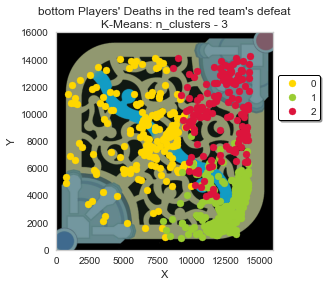

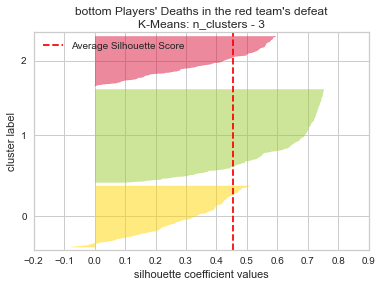

Silhouette score: 0.45333382961731866
1    290
0    191
2    155
Name: cluster, dtype: int64

Inertia: 572.2080103893766

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6524.664921   8449.952880   0.303665
1        1  12490.937931   3445.768966  -0.737931
2        2  12099.393548  10135.103226   0.651613

In [352]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [353]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2277.810371   2747.235273   0.562285
1        1   1268.135450   1532.548342   0.462686
2        2   1504.561441   2618.009387   0.476459

In [354]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10082.0             749.0           14085.0   
1        1           14131.0            7903.0            8355.0   
2        2           14257.0            8620.0           14238.0   

   min coordinate_y  max timestamp  min timestamp  
0             936.0              1             -1  
1             833.0              1             -1  
2            3966.0              1              0

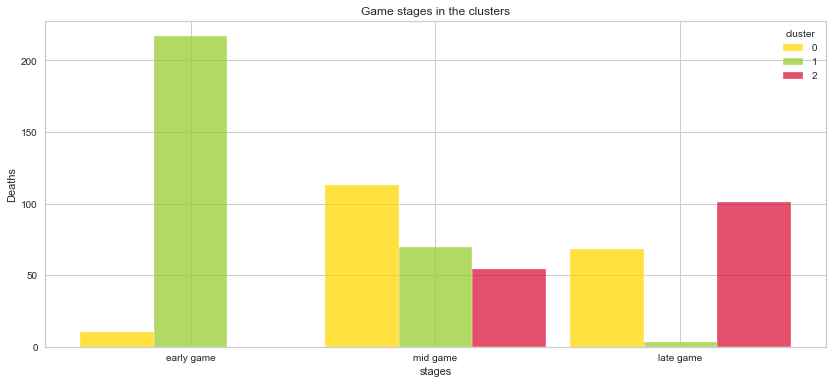

In [355]:
stagesPerClusterV2(redSideDefeat_df, colors)

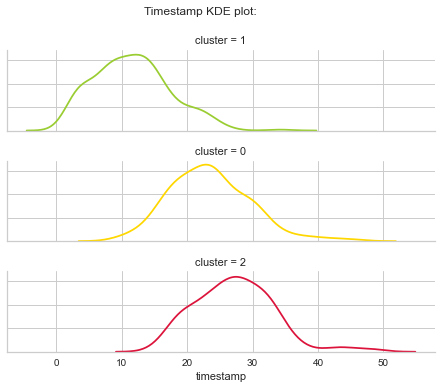

In [356]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [357]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx           23
Sivir          15
Draven         13
Jhin           12
Ezreal          5
Varus           4
Ashe            4
Tristana        3
Lucian          3
Xayah           2
Kaisa           2
Kalista         1
Aphelios        1
Vayne           1
Ziggs           1
KogMaw          1

Deaths with each champion:

In [358]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx        173
Sivir       126
Draven       85
Jhin         59
Ezreal       47
Varus        29
Ashe         26
Tristana     26
Lucian       21
Xayah        13
Kaisa         9
Aphelios      7
Ziggs         6
Kalista       4
KogMaw        3
Vayne         2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [359]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 16 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Aphelios' 'Ashe' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Kalista'
 'Lucian' 'Sivir' 'Tristana' 'Varus' 'Vayne' 'Xayah' 'Ziggs']
Sivir       57
Jinx        43
Draven      21
Tristana    11
Varus       10
Jhin         9
Lucian       8
Ezreal       8
Ashe         8
Xayah        5
Kaisa        3
Ziggs        3
Aphelios     3
Kalista      1
Vayne        1
Name: champion, dtype: int64

Cluster 1 - died with 16 champions:
 ['Aphelios' 'Ashe' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Kalista'
 'KogMaw' 'Lucian' 'Sivir' 'Tristana' 'Varus' 'Vayne' 'Xayah' 'Ziggs']
Jinx        87
Sivir       44
Draven      42
Jhin        29
Ezreal      23
Varus       13
Ashe        12
Lucian      10
Xayah        8
Tristana     7
Kalista      3
Ziggs        3
Aphelios     3
KogMaw       3
Kaisa        2
Vayne        1
Name: champion, dtype: int64

Cluster 2 - died with 11 champions:
 ['Aphelios' 'Ashe' 'D

---
#### Clustering Blue Team Victory

In [360]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
70259   EUW1_6273447365  Blue  anonymous 174   euw1     Jinx   4.758317   
70272   EUW1_6273447365  Blue  anonymous 174   euw1     Jinx  11.882983   
70293   EUW1_6273447365  Blue  anonymous 174   euw1     Jinx  22.158000   
70314   EUW1_6273447365  Blue  anonymous 174   euw1     Jinx  29.711917   
70342   EUW1_6273375062  Blue  anonymous 174   euw1     Jinx   7.992800   
...                 ...   ...            ...    ...      ...        ...   
627717  EUW1_6289768549  Blue   anonymous 54   euw1     Jinx  20.159483   
627723  EUW1_6289768549  Blue   anonymous 54   euw1     Jinx  23.485283   
628448  EUW1_6289202869  Blue   anonymous 58   euw1     Jhin  24.738683   
628662  EUW1_6289636694  Blue   anonymous 60   euw1   Draven   6.697750   
628667  EUW1_6289636694  Blue   anonymous 60   euw1   Draven   8.885850   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
70259        11819.0        1947.0    NaN            NaN  ...   
70272        10211.0        1026.0    NaN            NaN  ...   
70293         7172.0        6087.0    NaN            NaN  ...   
70314        12922.0       10220.0    NaN            NaN  ...   
70342        12727.0        1721.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
627717        9740.0        5306.0    NaN            NaN  ...   
627723        9988.0        6091.0    NaN            NaN  ...   
628448        8677.0        2259.0    NaN            NaN  ...   
628662       13102.0        2619.0    NaN            NaN  ...   
628667       13185.0        3411.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
70259               NaN     True      Death        NaN           NaN   NaN   
70272               NaN     True      Death        NaN           NaN   NaN   
70293               NaN     True      Death        NaN           NaN   NaN   
70314               NaN     True      Death        NaN           NaN   NaN   
70342               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
627717              NaN     True      Death        NaN           NaN   NaN   
627723              NaN     True      Death        NaN           NaN   NaN   
628448              NaN     True      Death        NaN           NaN   NaN   
628662              NaN     True      Death        NaN           NaN   NaN   
628667              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
70259       NaN       NaN  BOTTOM  Gold  
70272       NaN       NaN  BOTTOM  Gold  
70293       NaN       NaN  BOTTOM  Gold  
70314       NaN       NaN  BOTTOM  Gold  
70342       NaN       NaN  BOTTOM  Gold  
...         ...       ...     ...   ...  
627717      NaN       NaN  BOTTOM  Gold  
627723      NaN       NaN  BOTTOM  Gold  
628448      NaN       NaN  BOTTOM  Gold  
628662      NaN       NaN  BOTTOM  Gold  
628667      NaN       NaN  BOTTOM  Gold  

[416 rows x 56 columns]

In [361]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)].copy()

In [362]:
blueSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [363]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

85

In [364]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

50.0

In [365]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_bottom_deaths_df.shape[0]) * 100
winRateBlueSide

7.2752710738020285

In [366]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 174 won 8 matches on the blue side
anonymous 174 has an average of 4.25 deaths per game when winning on the blue side

anonymous 178 won 9 matches on the blue side
anonymous 178 has an average of 4.555555555555555 deaths per game when winning on the blue side

anonymous 181 won 9 matches on the blue side
anonymous 181 has an average of 6.666666666666667 deaths per game when winning on the blue side

anonymous 52 won 10 matches on the blue side
anonymous 52 has an average of 4.6 deaths per game when winning on the blue side

anonymous 54 won 20 matches on the blue side
anonymous 54 has an average of 6.0 deaths per game when winning on the blue side

anonymous 58 won 13 matches on the blue side
anonymous 58 has an average of 2.076923076923077 deaths per game when winning on the blue side

anonymous 60 won 16 matches on the blue side
anonymous 60 has an average of 5.5 deaths per game when winning on the blue side



In [367]:
print("Victory games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 85 matches in which the bottom died at least once
7 players died a total of 416 times on the blue side
Victory games on blue side contains an average of 4.894117647058824 deaths per game


In [368]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
70259        11819.0        1947.0   4.758317
70272        10211.0        1026.0  11.882983
70293         7172.0        6087.0  22.158000
70314        12922.0       10220.0  29.711917
70342        12727.0        1721.0   7.992800
...              ...           ...        ...
627717        9740.0        5306.0  20.159483
627723        9988.0        6091.0  23.485283
628448        8677.0        2259.0  24.738683
628662       13102.0        2619.0   6.697750
628667       13185.0        3411.0   8.885850

[416 rows x 3 columns]

Time discretization

In [369]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [370]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [371]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [372]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [373]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
70259       0.611664     -0.960971         -1
70272       0.091484     -1.218235         -1
70293      -0.891616      0.195458          0
70314       0.968478      1.349931          1
70342       0.905397     -1.024100         -1
...              ...           ...        ...
627717     -0.060882     -0.022700          0
627723      0.019345      0.196575          0
628448     -0.404756     -0.873820          0
628662      1.026707     -0.773261         -1
628667      1.053558     -0.552031         -1

[416 rows x 3 columns]

In [374]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4887523880245435
Silhouette score for k=3: 0.4526178451382956
Silhouette score for k=4: 0.3899757136707286
Silhouette score for k=5: 0.38295912357558054
Silhouette score for k=6: 0.3761745771955788
Silhouette score for k=7: 0.34592119076377625
Silhouette score for k=8: 0.36154723911295505
Silhouette score for k=9: 0.375682560054328
Silhouette score for k=10: 0.3747807940094943
Silhouette score for k=11: 0.3841386902297688
Silhouette score for k=12: 0.4031715932732659
Silhouette score for k=13: 0.38733621092214565
Silhouette score for k=14: 0.3900207112279318
Silhouette score for k=15: 0.405164102612135
Silhouette score for k=16: 0.4000181166005071
Silhouette score for k=17: 0.4081561414864735
Silhouette score for k=18: 0.41922461745711853
Silhouette score for k=19: 0.4246040267745545
Silhouette score for k=20: 0.40814197691589627
Silhouette score for k=25: 0.39741052379053166


K-Means with k = 3

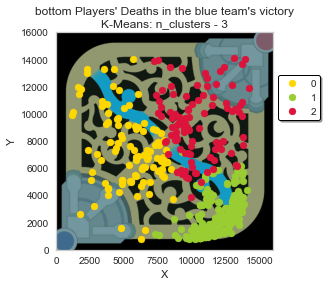

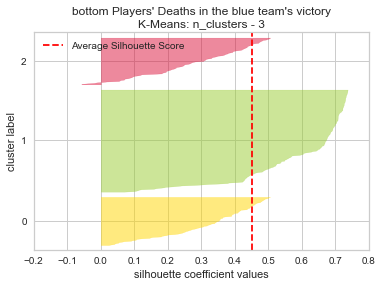

Silhouette score: 0.4526178451382956
1    215
0    102
2     99
Name: cluster, dtype: int64

Inertia: 356.5096672331682

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5404.490196   7416.882353   0.343137
1        1  11877.697674   2630.758140  -0.711628
2        2  10355.232323   9282.494949   0.474747

In [375]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [376]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1847.053455   2705.905337   0.514402
1        1   1304.467703   1427.837496   0.492365
2        2   1850.124953   2442.261435   0.538299

In [377]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8579.0            1208.0           14019.0   
1        1           14040.0            7288.0            7643.0   
2        2           14236.0            7215.0           14087.0   

   min coordinate_y  max timestamp  min timestamp  
0             814.0              1             -1  
1             829.0              1             -1  
2            3858.0              1             -1

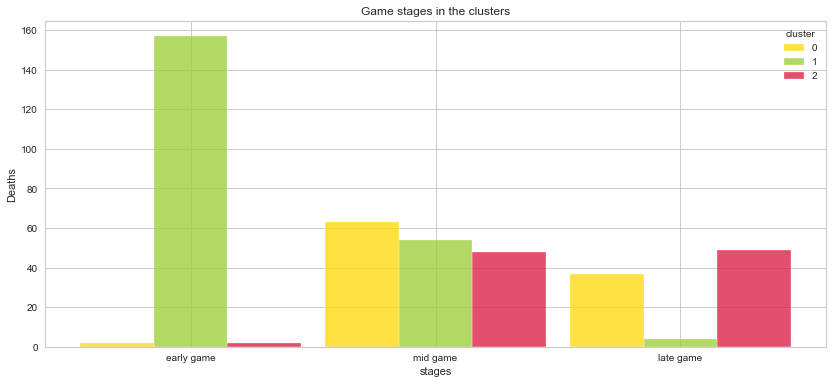

In [378]:
stagesPerClusterV2(blueSideVictory_df, colors)

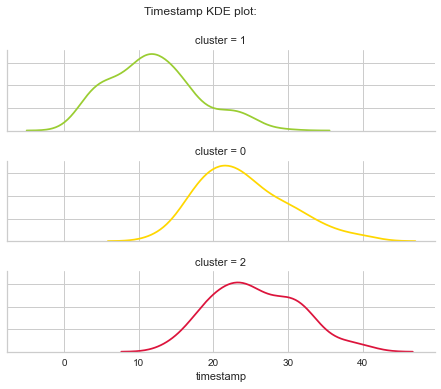

In [379]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [380]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx           30
Draven         16
Jhin           14
Sivir          10
Varus           6
Caitlyn         4
Tristana        3
Ezreal          2

Deaths with each champion:

In [381]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx        160
Draven       88
Sivir        61
Varus        31
Jhin         26
Caitlyn      24
Tristana     14
Ezreal       12
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [382]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 8 champions when they won on the red side

Cluster 0 - died with 7 champions:
 ['Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Sivir' 'Varus']
Jinx       42
Draven     19
Sivir      14
Varus      12
Caitlyn     9
Jhin        4
Ezreal      2
Name: champion, dtype: int64

Cluster 1 - died with 8 champions:
 ['Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Sivir' 'Tristana' 'Varus']
Jinx        79
Draven      54
Sivir       27
Jhin        17
Varus       12
Caitlyn     10
Tristana     8
Ezreal       8
Name: champion, dtype: int64

Cluster 2 - died with 8 champions:
 ['Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Sivir' 'Tristana' 'Varus']
Jinx        39
Sivir       20
Draven      15
Varus        7
Tristana     6
Caitlyn      5
Jhin         5
Ezreal       2
Name: champion, dtype: int64



---
#### Clustering Blue Team Defeat

In [383]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
70224   EUW1_6273532513  Blue  anonymous 174   euw1     Jinx  18.313667   
70226   EUW1_6273532513  Blue  anonymous 174   euw1     Jinx  19.611667   
70235   EUW1_6273532513  Blue  anonymous 174   euw1     Jinx  24.163883   
70239   EUW1_6273532513  Blue  anonymous 174   euw1     Jinx  25.462100   
70243   EUW1_6273532513  Blue  anonymous 174   euw1     Jinx  27.741283   
...                 ...   ...            ...    ...      ...        ...   
628629  EUW1_6289676241  Blue   anonymous 60   euw1   Draven  17.831967   
628633  EUW1_6289676241  Blue   anonymous 60   euw1   Draven  20.130750   
628639  EUW1_6289676241  Blue   anonymous 60   euw1   Draven  22.509267   
628644  EUW1_6289676241  Blue   anonymous 60   euw1   Draven  25.499800   
628648  EUW1_6289676241  Blue   anonymous 60   euw1   Draven  27.917217   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
70224        11350.0        3800.0    NaN            NaN  ...   
70226        12959.0        2685.0    NaN            NaN  ...   
70235         1343.0        4647.0    NaN            NaN  ...   
70239         9761.0        5404.0    NaN            NaN  ...   
70243         3564.0        2790.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
628629       12989.0        1500.0    NaN            NaN  ...   
628633       10055.0        7614.0    NaN            NaN  ...   
628639       13186.0        2678.0    NaN            NaN  ...   
628644        7865.0        4766.0    NaN            NaN  ...   
628648        4697.0         682.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
70224               NaN    False      Death        NaN           NaN   NaN   
70226               NaN    False      Death        NaN           NaN   NaN   
70235               NaN    False      Death        NaN           NaN   NaN   
70239               NaN    False      Death        NaN           NaN   NaN   
70243               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
628629              NaN    False      Death        NaN           NaN   NaN   
628633              NaN    False      Death        NaN           NaN   NaN   
628639              NaN    False      Death        NaN           NaN   NaN   
628644              NaN    False      Death        NaN           NaN   NaN   
628648              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
70224       NaN       NaN  BOTTOM  Gold  
70226       NaN       NaN  BOTTOM  Gold  
70235       NaN       NaN  BOTTOM  Gold  
70239       NaN       NaN  BOTTOM  Gold  
70243       NaN       NaN  BOTTOM  Gold  
...         ...       ...     ...   ...  
628629      NaN       NaN  BOTTOM  Gold  
628633      NaN       NaN  BOTTOM  Gold  
628639      NaN       NaN  BOTTOM  Gold  
628644      NaN       NaN  BOTTOM  Gold  
628648      NaN       NaN  BOTTOM  Gold  

[646 rows x 56 columns]

In [384]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)].copy()

In [385]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 174 lost 4 matches on the blue side
anonymous 174 has an average of 7.0 deaths per game when losing on the blue side

anonymous 178 lost 11 matches on the blue side
anonymous 178 has an average of 6.363636363636363 deaths per game when losing on the blue side

anonymous 181 lost 10 matches on the blue side
anonymous 181 has an average of 9.2 deaths per game when losing on the blue side

anonymous 52 lost 7 matches on the blue side
anonymous 52 has an average of 8.285714285714286 deaths per game when losing on the blue side

anonymous 54 lost 23 matches on the blue side
anonymous 54 has an average of 8.217391304347826 deaths per game when losing on the blue side

anonymous 58 lost 10 matches on the blue side
anonymous 58 has an average of 5.2 deaths per game when losing on the blue side

anonymous 60 lost 20 matches on the blue side
anonymous 60 has an average of 7.85 deaths per game when losing on the blue side



In [386]:
print("Defeat games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 85 matches in which the bottom died at least once
7 players died a total of 646 times on the blue side
Defeat games on blue side contains an average of 7.6 deaths per game


In [387]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
70224        11350.0        3800.0  18.313667
70226        12959.0        2685.0  19.611667
70235         1343.0        4647.0  24.163883
70239         9761.0        5404.0  25.462100
70243         3564.0        2790.0  27.741283
...              ...           ...        ...
628629       12989.0        1500.0  17.831967
628633       10055.0        7614.0  20.130750
628639       13186.0        2678.0  22.509267
628644        7865.0        4766.0  25.499800
628648        4697.0         682.0  27.917217

[646 rows x 3 columns]

Time discretization

In [388]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [389]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [390]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [391]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [392]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
70224       0.781429     -0.130861          0
70226       1.200443     -0.513795          0
70235      -1.824583      0.160032          0
70239       0.367623      0.420015          1
70243      -1.246192     -0.477734          1
...              ...           ...        ...
628629      1.208255     -0.920769          0
628633      0.444186      1.179014          0
628639      1.259558     -0.516199          0
628644     -0.126131      0.200901          1
628648     -0.951138     -1.201702          1

[646 rows x 3 columns]

In [393]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.47177841714454394
Silhouette score for k=3: 0.45130250251864984
Silhouette score for k=4: 0.4435145816805784
Silhouette score for k=5: 0.3978087801374429
Silhouette score for k=6: 0.38409461972018377
Silhouette score for k=7: 0.4127625013372177
Silhouette score for k=8: 0.3704639773579527
Silhouette score for k=9: 0.3887125687624049
Silhouette score for k=10: 0.3995514566070665
Silhouette score for k=11: 0.4013042711527381
Silhouette score for k=12: 0.4042176331598745
Silhouette score for k=13: 0.40620857241123914
Silhouette score for k=14: 0.3896050838438138
Silhouette score for k=15: 0.3902189070252512
Silhouette score for k=16: 0.40058568148690044
Silhouette score for k=17: 0.4018123998313478
Silhouette score for k=18: 0.40764648942979537
Silhouette score for k=19: 0.38372892490683796
Silhouette score for k=20: 0.39441372525582585
Silhouette score for k=25: 0.3760186524326205


K-Means with k = 3

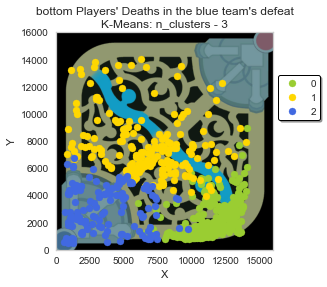

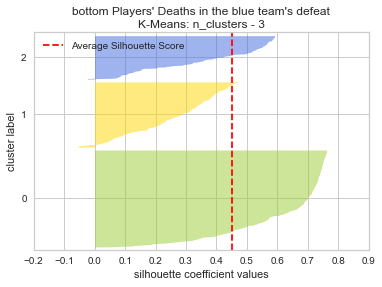

Silhouette score: 0.45130250251864984
0    305
1    205
2    136
Name: cluster, dtype: int64

Inertia: 584.4281581246202

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11523.114754   2390.019672  -0.754098
1        1   6704.507317   7615.165854   0.395122
2        2   3711.022059   3021.183824   0.566176

In [394]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [395]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1440.794106   1332.050324   0.460069
1        1   2822.081530   2226.173782   0.545470
2        2   2279.962192   1583.084839   0.495601

In [396]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14087.0            6042.0            8976.0   
1        1           13987.0             788.0           14037.0   
2        2            9707.0             562.0            6772.0   

   min coordinate_y  max timestamp  min timestamp  
0             763.0              1             -1  
1            3948.0              1             -1  
2             528.0              1              0

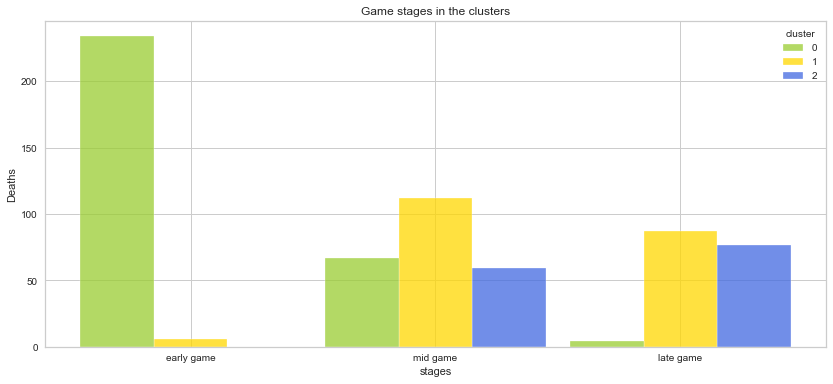

In [397]:
stagesPerClusterV2(blueSideDefeat_df, colors)

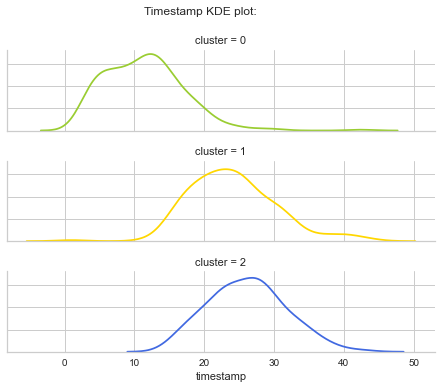

In [398]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [399]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx           30
Draven         13
Ezreal         11
Jhin           11
Sivir           9
Kaisa           3
Varus           3
Tristana        2
Caitlyn         2
Lucian          1

Deaths with each champion:

In [400]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx        245
Draven      107
Sivir        81
Ezreal       67
Jhin         60
Varus        25
Kaisa        22
Caitlyn      17
Tristana     15
Lucian        7
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [401]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 10 champions when they won on the red side

Cluster 0 - died with 10 champions:
 ['Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'Sivir'
 'Tristana' 'Varus']
Jinx        111
Draven       60
Sivir        44
Ezreal       27
Jhin         26
Varus        13
Kaisa        12
Tristana      7
Caitlyn       4
Lucian        1
Name: champion, dtype: int64

Cluster 1 - died with 10 champions:
 ['Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'Sivir'
 'Tristana' 'Varus']
Jinx        87
Ezreal      25
Draven      24
Jhin        21
Sivir       20
Caitlyn      8
Tristana     7
Lucian       5
Varus        5
Kaisa        3
Name: champion, dtype: int64

Cluster 2 - died with 10 champions:
 ['Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'Sivir'
 'Tristana' 'Varus']
Jinx        47
Draven      23
Sivir       17
Ezreal      15
Jhin        13
Varus        7
Kaisa        7
Caitlyn      5
Lucian       1
Tristana     1
Name: champion, dtype: int64



---
### Platinum Players

#### Clustering Red Team Victory

In [402]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
38364   EUW1_6280259352  Red  anonymous 157   euw1     Ashe   4.227767   
38371   EUW1_6280259352  Red  anonymous 157   euw1     Ashe   7.252867   
38392   EUW1_6280259352  Red  anonymous 157   euw1     Ashe  15.643300   
38397   EUW1_6280259352  Red  anonymous 157   euw1     Ashe  18.074767   
38425   EUW1_6280259352  Red  anonymous 157   euw1     Ashe  27.412800   
...                 ...  ...            ...    ...      ...        ...   
641207  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  12.812150   
641210  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  13.866217   
641214  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  15.174200   
641217  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  16.349717   
641221  EUW1_6289291789  Red  anonymous 162   euw1    Vayne  18.033500   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
38364        12169.0        1256.0    NaN            NaN  ...   
38371         7938.0        1242.0    NaN            NaN  ...   
38392         8306.0        1566.0    NaN            NaN  ...   
38397        10255.0        8297.0    NaN            NaN  ...   
38425         5289.0        1082.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
641207        9575.0         841.0    NaN            NaN  ...   
641210       11196.0        3297.0    NaN            NaN  ...   
641214        7094.0        7662.0    NaN            NaN  ...   
641217        6425.0        4995.0    NaN            NaN  ...   
641221        1758.0        7601.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
38364               NaN     True      Death        NaN           NaN   NaN   
38371               NaN     True      Death        NaN           NaN   NaN   
38392               NaN     True      Death        NaN           NaN   NaN   
38397               NaN     True      Death        NaN           NaN   NaN   
38425               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
641207              NaN     True      Death        NaN           NaN   NaN   
641210              NaN     True      Death        NaN           NaN   NaN   
641214              NaN     True      Death        NaN           NaN   NaN   
641217              NaN     True      Death        NaN           NaN   NaN   
641221              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
38364       NaN       NaN  BOTTOM  Platinum  
38371       NaN       NaN  BOTTOM  Platinum  
38392       NaN       NaN  BOTTOM  Platinum  
38397       NaN       NaN  BOTTOM  Platinum  
38425       NaN       NaN  BOTTOM  Platinum  
...         ...       ...     ...       ...  
641207      NaN       NaN  BOTTOM  Platinum  
641210      NaN       NaN  BOTTOM  Platinum  
641214      NaN       NaN  BOTTOM  Platinum  
641217      NaN       NaN  BOTTOM  Platinum  
641221      NaN       NaN  BOTTOM  Platinum  

[534 rows x 56 columns]

In [403]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == True)].copy()

In [404]:
redSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [405]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

97

In [406]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

51.32275132275132

In [407]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_bottom_deaths_df.shape[0]) * 100
winRateRedSide

8.87780548628429

In [408]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 157 won 18 matches on the red side
anonymous 157 has an average of 4.722222222222222 deaths per game when winning on the red side

anonymous 160 won 16 matches on the red side
anonymous 160 has an average of 4.625 deaths per game when winning on the red side

anonymous 162 won 13 matches on the red side
anonymous 162 has an average of 5.769230769230769 deaths per game when winning on the red side

anonymous 24 won 14 matches on the red side
anonymous 24 has an average of 5.5 deaths per game when winning on the red side

anonymous 28 won 9 matches on the red side
anonymous 28 has an average of 5.111111111111111 deaths per game when winning on the red side

anonymous 31 won 17 matches on the red side
anonymous 31 has an average of 6.235294117647059 deaths per game when winning on the red side

anonymous 33 won 10 matches on the red side
anonymous 33 has an average of 7.1 deaths per game when winning on the red side



In [409]:
print("Victory games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 97 matches in which the bottom died at least once
7 players died a total of 534 times on the red side
Victory games on red side contains an average of 5.505154639175258 deaths per game


In [410]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
38364        12169.0        1256.0   4.227767
38371         7938.0        1242.0   7.252867
38392         8306.0        1566.0  15.643300
38397        10255.0        8297.0  18.074767
38425         5289.0        1082.0  27.412800
...              ...           ...        ...
641207        9575.0         841.0  12.812150
641210       11196.0        3297.0  13.866217
641214        7094.0        7662.0  15.174200
641217        6425.0        4995.0  16.349717
641221        1758.0        7601.0  18.033500

[534 rows x 3 columns]

Time discretization

In [411]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [412]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [413]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [414]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [415]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
38364       0.754091     -1.203190         -1
38371      -0.347210     -1.208039         -1
38392      -0.251422     -1.095828          0
38397       0.255889      1.235311          0
38425      -1.036727     -1.263451          1
...              ...           ...        ...
641207      0.078890     -1.346917         -1
641210      0.500825     -0.496333         -1
641214     -0.566898      1.015392          0
641217     -0.741034      0.091733          0
641221     -1.955823      0.994266          0

[534 rows x 3 columns]

In [416]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.46696085157740413
Silhouette score for k=3: 0.4574500999946059
Silhouette score for k=4: 0.4417334917976245
Silhouette score for k=5: 0.33882003350226214
Silhouette score for k=6: 0.3264309840442501
Silhouette score for k=7: 0.36051567292317316
Silhouette score for k=8: 0.35630648575354334
Silhouette score for k=9: 0.3745907644436123
Silhouette score for k=10: 0.385300670290857
Silhouette score for k=11: 0.38845017469050536
Silhouette score for k=12: 0.40024866009776583
Silhouette score for k=13: 0.3573908600100765
Silhouette score for k=14: 0.41031122660075
Silhouette score for k=15: 0.4154938930992477
Silhouette score for k=16: 0.41160263285015153
Silhouette score for k=17: 0.395860845633407
Silhouette score for k=18: 0.3988174456238406
Silhouette score for k=19: 0.402981247360023
Silhouette score for k=20: 0.4054663369226548
Silhouette score for k=25: 0.41606006346476354


K-Means with k = 4

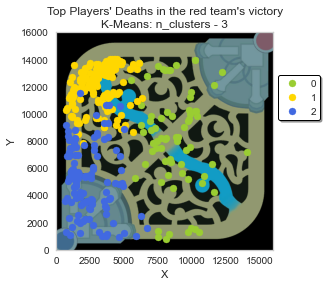

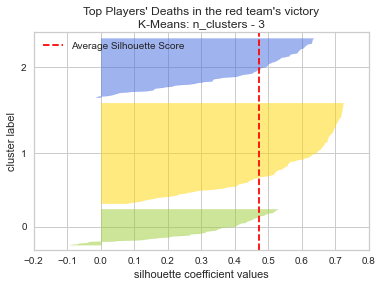

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.87227458544737

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

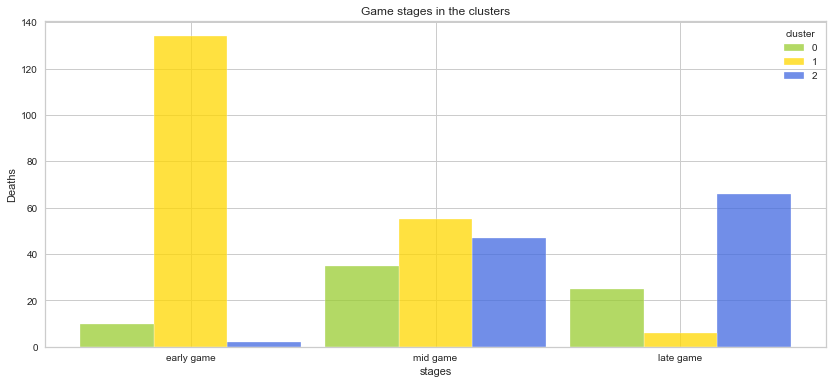

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

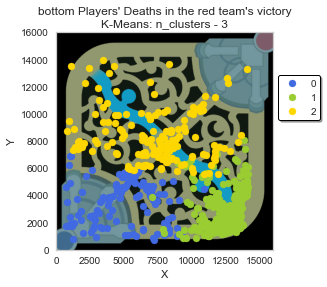

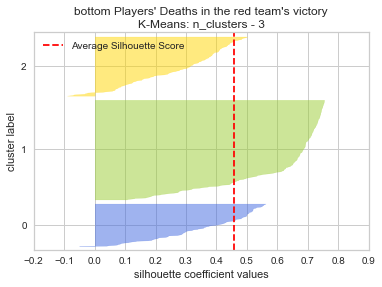

Silhouette score: 0.4574500999946059
1    264
2    157
0    113
Name: cluster, dtype: int64

Inertia: 481.09864231637624

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4936.247788   3378.840708   0.495575
1        1  12349.621212   3136.208333  -0.821970
2        2   7217.254777   8382.929936   0.299363

In [417]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [418]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2426.094219   1589.838098   0.534208
1        1   1319.125767   1513.232785   0.401854
2        2   3059.361752   1938.636970   0.580632

In [419]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10906.0             765.0            6937.0   
1        1           14122.0            7056.0            8099.0   
2        2           14046.0             836.0           13994.0   

   min coordinate_y  max timestamp  min timestamp  
0             757.0              1             -1  
1             841.0              1             -1  
2            5547.0              1             -1

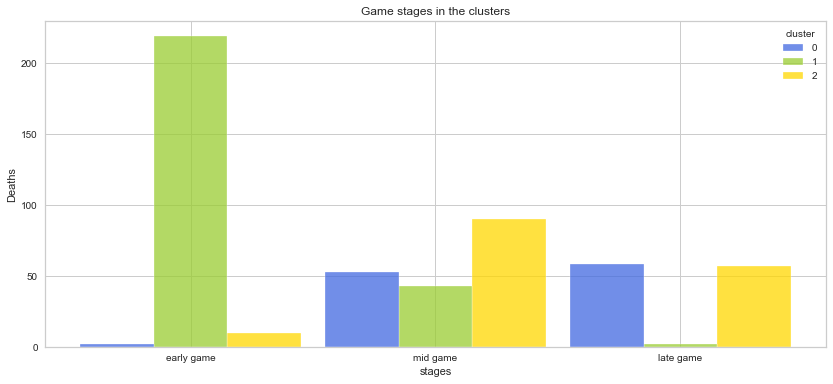

In [420]:
stagesPerClusterV2(redSideVictory_df, colors)

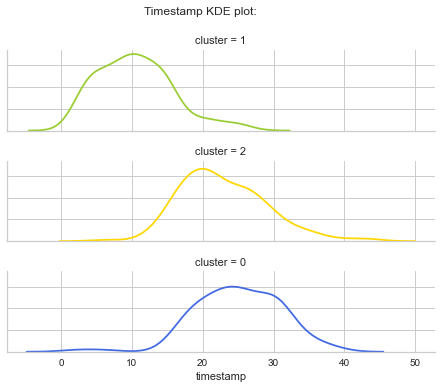

In [421]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [422]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx              15
Jhin              14
Kaisa             11
Caitlyn            9
Vayne              8
Varus              7
Xayah              7
Ezreal             7
Twitch             5
Sivir              5
Zeri               2
Ashe               2
Lucian             1
Tristana           1
MissFortune        1
Samira             1
Ziggs              1

Deaths with each champion:

In [423]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx           83
Kaisa          75
Jhin           63
Vayne          55
Caitlyn        44
Ezreal         40
Varus          40
Twitch         36
Xayah          24
Sivir          24
Ashe           13
Zeri            9
Samira          9
MissFortune     5
Tristana        5
Lucian          5
Ziggs           4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [424]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 17 champions when they won on the red side

Cluster 0 - died with 16 champions:
 ['Ashe' 'Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'MissFortune'
 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Ziggs']
Jinx           22
Kaisa          15
Vayne          15
Twitch         11
Jhin           10
Caitlyn        10
Varus           6
Xayah           4
Sivir           4
Samira          4
Ashe            3
Ezreal          3
MissFortune     2
Lucian          2
Tristana        1
Ziggs           1
Name: champion, dtype: int64

Cluster 1 - died with 17 champions:
 ['Ashe' 'Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'MissFortune'
 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Zeri'
 'Ziggs']
Jinx           38
Vayne          33
Kaisa          30
Jhin           29
Ezreal         25
Caitlyn        22
Xayah          17
Varus          17
Twitch         16
Sivir          12
Zeri            7
Ashe            6
Tristana        4
Samira  

---
#### Clustering Red Team Defeat

In [425]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
38747   EUW1_6279808954  Red  anonymous 157   euw1     Jhin  10.163767   
38760   EUW1_6279808954  Red  anonymous 157   euw1     Jhin  15.202250   
38776   EUW1_6279808954  Red  anonymous 157   euw1     Jhin  22.163017   
38782   EUW1_6279808954  Red  anonymous 157   euw1     Jhin  25.351700   
38790   EUW1_6279808954  Red  anonymous 157   euw1     Jhin  29.046067   
...                 ...  ...            ...    ...      ...        ...   
640883  EUW1_6285159284  Red  anonymous 160   euw1     Jinx   9.332467   
640888  EUW1_6285159284  Red  anonymous 160   euw1     Jinx  11.617900   
640896  EUW1_6285159284  Red  anonymous 160   euw1     Jinx  15.678467   
640908  EUW1_6285159284  Red  anonymous 160   euw1     Jinx  19.736300   
640921  EUW1_6285159284  Red  anonymous 160   euw1     Jinx  27.551450   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
38747        10858.0        2036.0    NaN            NaN  ...   
38760         8586.0        7708.0    NaN            NaN  ...   
38776         9136.0        8471.0    NaN            NaN  ...   
38782         7985.0        7399.0    NaN            NaN  ...   
38790         3220.0        5087.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
640883       13081.0        2283.0    NaN            NaN  ...   
640888        9441.0         918.0    NaN            NaN  ...   
640896       12405.0        1813.0    NaN            NaN  ...   
640908        9633.0        9563.0    NaN            NaN  ...   
640921       11321.0       12067.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
38747               NaN    False      Death        NaN           NaN   NaN   
38760               NaN    False      Death        NaN           NaN   NaN   
38776               NaN    False      Death        NaN           NaN   NaN   
38782               NaN    False      Death        NaN           NaN   NaN   
38790               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
640883              NaN    False      Death        NaN           NaN   NaN   
640888              NaN    False      Death        NaN           NaN   NaN   
640896              NaN    False      Death        NaN           NaN   NaN   
640908              NaN    False      Death        NaN           NaN   NaN   
640921              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
38747       NaN       NaN  BOTTOM  Platinum  
38760       NaN       NaN  BOTTOM  Platinum  
38776       NaN       NaN  BOTTOM  Platinum  
38782       NaN       NaN  BOTTOM  Platinum  
38790       NaN       NaN  BOTTOM  Platinum  
...         ...       ...     ...       ...  
640883      NaN       NaN  BOTTOM  Platinum  
640888      NaN       NaN  BOTTOM  Platinum  
640896      NaN       NaN  BOTTOM  Platinum  
640908      NaN       NaN  BOTTOM  Platinum  
640921      NaN       NaN  BOTTOM  Platinum  

[699 rows x 56 columns]

In [426]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Red") & (bottom_deaths_df["victory"] == False)].copy()

In [427]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 157 lost 7 matches on the red side
anonymous 157 has an average of 8.0 deaths per game when losing on the red side

anonymous 160 lost 18 matches on the red side
anonymous 160 has an average of 6.444444444444445 deaths per game when losing on the red side

anonymous 162 lost 10 matches on the red side
anonymous 162 has an average of 8.9 deaths per game when losing on the red side

anonymous 24 lost 26 matches on the red side
anonymous 24 has an average of 7.8076923076923075 deaths per game when losing on the red side

anonymous 28 lost 8 matches on the red side
anonymous 28 has an average of 7.5 deaths per game when losing on the red side

anonymous 31 lost 13 matches on the red side
anonymous 31 has an average of 7.3076923076923075 deaths per game when losing on the red side

anonymous 33 lost 10 matches on the red side
anonymous 33 has an average of 8.0 deaths per game when losing on the red side



In [428]:
print("Defeat games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 92 matches in which the bottom died at least once
7 players died a total of 699 times on the red side
Defeat games on red side contains an average of 7.5978260869565215 deaths per game


In [429]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
38747        10858.0        2036.0  10.163767
38760         8586.0        7708.0  15.202250
38776         9136.0        8471.0  22.163017
38782         7985.0        7399.0  25.351700
38790         3220.0        5087.0  29.046067
...              ...           ...        ...
640883       13081.0        2283.0   9.332467
640888        9441.0         918.0  11.617900
640896       12405.0        1813.0  15.678467
640908        9633.0        9563.0  19.736300
640921       11321.0       12067.0  27.551450

[699 rows x 3 columns]

Time discretization

In [430]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [431]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [432]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [433]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [434]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
38747       0.179153     -1.240638         -1
38760      -0.547543      0.322381          0
38776      -0.371627      0.532640          0
38782      -0.739773      0.237231          1
38790      -2.263852     -0.399881          1
...              ...           ...        ...
640883      0.890176     -1.172573         -1
640888     -0.274073     -1.548723         -1
640896      0.673959     -1.302090          0
640908     -0.212662      0.833559          0
640921      0.327243      1.523581          1

[699 rows x 3 columns]

In [435]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4556118599785287
Silhouette score for k=3: 0.4470526984078162
Silhouette score for k=4: 0.4256859115409755
Silhouette score for k=5: 0.4152703349226317
Silhouette score for k=6: 0.39545744616358103
Silhouette score for k=7: 0.33771207689833965
Silhouette score for k=8: 0.3336755257648965
Silhouette score for k=9: 0.3750665912961578
Silhouette score for k=10: 0.3802791242207207
Silhouette score for k=11: 0.38242075230298544
Silhouette score for k=12: 0.37793863037815717
Silhouette score for k=13: 0.39631339895456463
Silhouette score for k=14: 0.3945873013502146
Silhouette score for k=15: 0.4117774829679999
Silhouette score for k=16: 0.3627549467487301
Silhouette score for k=17: 0.4142996665912163
Silhouette score for k=18: 0.3879768852109217
Silhouette score for k=19: 0.39392022744235156
Silhouette score for k=20: 0.41924487844867875
Silhouette score for k=25: 0.407382553118388


K-Means with k = 3

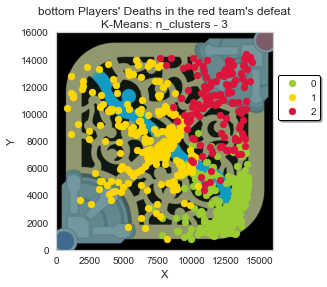

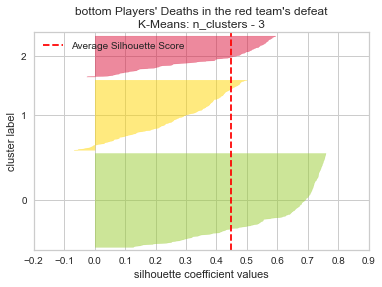

Silhouette score: 0.4470526984078162
0    320
1    239
2    140
Name: cluster, dtype: int64

Inertia: 634.6919193259869

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  12335.162500   3559.443750  -0.825000
1        1   6708.317992   8112.037657   0.263598
2        2  11769.142857  10659.614286   0.614286

In [436]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [437]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1380.858725   1677.683638   0.403887
1        1   2218.404683   2667.243787   0.557915
2        2   1548.160589   2382.323145   0.486764

In [438]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14122.0            6989.0            8558.0   
1        1           10422.0             825.0           13944.0   
2        2           14394.0            7668.0           14410.0   

   min coordinate_y  max timestamp  min timestamp  
0             808.0              1             -1  
1             785.0              1             -1  
2            4364.0              1              0

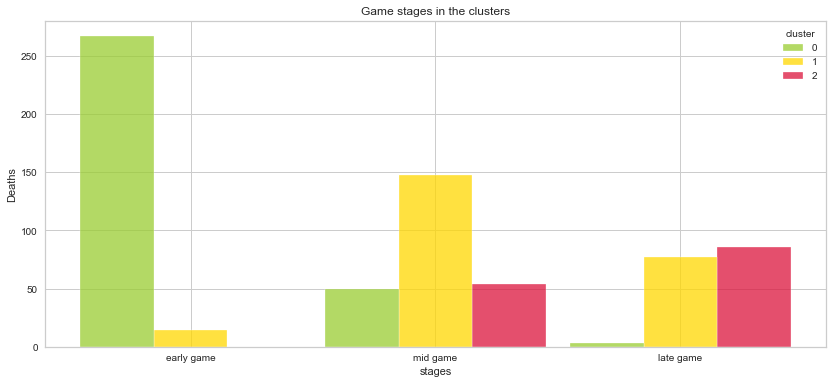

In [439]:
stagesPerClusterV2(redSideDefeat_df, colors)

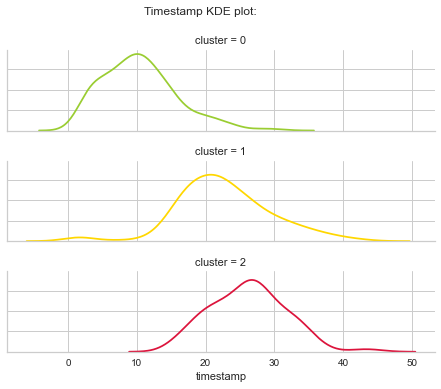

In [440]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [441]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx           25
Caitlyn        15
Vayne           9
Xayah           9
Jhin            7
Kaisa           6
Tristana        3
Varus           3
Twitch          3
Zeri            3
Sivir           2
Samira          2
Ezreal          2
Lucian          1
Ashe            1
Nilah           1

Deaths with each champion:

In [442]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx        192
Caitlyn      98
Vayne        64
Xayah        62
Jhin         60
Kaisa        57
Tristana     33
Twitch       23
Varus        21
Zeri         16
Sivir        16
Samira       16
Ezreal       13
Ashe         11
Lucian       10
Nilah         7
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [443]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 16 champions when they won on the red side

Cluster 0 - died with 16 champions:
 ['Ashe' 'Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'Nilah' 'Samira'
 'Sivir' 'Tristana' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Zeri']
Jinx        96
Caitlyn     50
Vayne       29
Xayah       29
Jhin        25
Kaisa       22
Varus       14
Twitch      11
Zeri         8
Tristana     8
Sivir        7
Samira       6
Nilah        6
Lucian       4
Ashe         3
Ezreal       2
Name: champion, dtype: int64

Cluster 1 - died with 16 champions:
 ['Ashe' 'Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'Nilah' 'Samira'
 'Sivir' 'Tristana' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Zeri']
Jinx        67
Jhin        25
Caitlyn     24
Vayne       21
Kaisa       21
Tristana    20
Xayah       17
Ezreal      10
Ashe         8
Twitch       6
Samira       6
Sivir        4
Lucian       4
Zeri         3
Varus        2
Nilah        1
Name: champion, dtype: int64

Cluster 2 - died with 14 champions:
 ['Cai

---
#### Clustering Blue Team Victory

In [444]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideVictory_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
38489   EUW1_6280157057  Blue  anonymous 157   euw1     Jhin   8.282333   
38496   EUW1_6280157057  Blue  anonymous 157   euw1     Jhin  10.446067   
38505   EUW1_6280157057  Blue  anonymous 157   euw1     Jhin  14.077617   
38512   EUW1_6280157057  Blue  anonymous 157   euw1     Jhin  18.219383   
38531   EUW1_6280157057  Blue  anonymous 157   euw1     Jhin  26.298867   
...                 ...   ...            ...    ...      ...        ...   
615077  EUW1_6287902711  Blue  anonymous 162   euw1    Xayah  30.585083   
623401  EUW1_6289705105  Blue   anonymous 28   euw1    Xayah  17.965633   
623407  EUW1_6289705105  Blue   anonymous 28   euw1    Xayah  20.215217   
623423  EUW1_6289705105  Blue   anonymous 28   euw1    Xayah  25.901533   
623426  EUW1_6289705105  Blue   anonymous 28   euw1    Xayah  27.296200   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
38489        10843.0         873.0    NaN            NaN  ...   
38496        12606.0        1340.0    NaN            NaN  ...   
38505        13402.0        2351.0    NaN            NaN  ...   
38512         5767.0        5691.0    NaN            NaN  ...   
38531         8270.0        6295.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
615077        9361.0        8941.0    NaN            NaN  ...   
623401       10472.0        4962.0    NaN            NaN  ...   
623407        6891.0        6715.0    NaN            NaN  ...   
623423       10779.0        7865.0    NaN            NaN  ...   
623426        7407.0        4673.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
38489               NaN     True      Death        NaN           NaN   NaN   
38496               NaN     True      Death        NaN           NaN   NaN   
38505               NaN     True      Death        NaN           NaN   NaN   
38512               NaN     True      Death        NaN           NaN   NaN   
38531               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
615077              NaN     True      Death        NaN           NaN   NaN   
623401              NaN     True      Death        NaN           NaN   NaN   
623407              NaN     True      Death        NaN           NaN   NaN   
623423              NaN     True      Death        NaN           NaN   NaN   
623426              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
38489       NaN       NaN  BOTTOM  Platinum  
38496       NaN       NaN  BOTTOM  Platinum  
38505       NaN       NaN  BOTTOM  Platinum  
38512       NaN       NaN  BOTTOM  Platinum  
38531       NaN       NaN  BOTTOM  Platinum  
...         ...       ...     ...       ...  
615077      NaN       NaN  BOTTOM  Platinum  
623401      NaN       NaN  BOTTOM  Platinum  
623407      NaN       NaN  BOTTOM  Platinum  
623423      NaN       NaN  BOTTOM  Platinum  
623426      NaN       NaN  BOTTOM  Platinum  

[500 rows x 56 columns]

In [445]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == True)].copy()

In [446]:
blueSideGames_df = bottom_deaths_df[bottom_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [447]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

99

In [448]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

57.55813953488372

In [449]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_bottom_deaths_df.shape[0]) * 100
winRateBlueSide

8.744316194473592

In [450]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 157 won 14 matches on the blue side
anonymous 157 has an average of 5.214285714285714 deaths per game when winning on the blue side

anonymous 160 won 16 matches on the blue side
anonymous 160 has an average of 4.5625 deaths per game when winning on the blue side

anonymous 162 won 8 matches on the blue side
anonymous 162 has an average of 6.125 deaths per game when winning on the blue side

anonymous 24 won 25 matches on the blue side
anonymous 24 has an average of 5.72 deaths per game when winning on the blue side

anonymous 28 won 16 matches on the blue side
anonymous 28 has an average of 4.125 deaths per game when winning on the blue side

anonymous 31 won 13 matches on the blue side
anonymous 31 has an average of 4.153846153846154 deaths per game when winning on the blue side

anonymous 33 won 7 matches on the blue side
anonymous 33 has an average of 6.0 deaths per game when winning on the blue side



In [451]:
print("Victory games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 99 matches in which the bottom died at least once
7 players died a total of 500 times on the blue side
Victory games on blue side contains an average of 5.05050505050505 deaths per game


In [452]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
38489        10843.0         873.0   8.282333
38496        12606.0        1340.0  10.446067
38505        13402.0        2351.0  14.077617
38512         5767.0        5691.0  18.219383
38531         8270.0        6295.0  26.298867
...              ...           ...        ...
615077        9361.0        8941.0  30.585083
623401       10472.0        4962.0  17.965633
623407        6891.0        6715.0  20.215217
623423       10779.0        7865.0  25.901533
623426        7407.0        4673.0  27.296200

[500 rows x 3 columns]

Time discretization

In [453]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [454]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [455]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [456]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [457]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
38489       0.279815     -1.240708         -1
38496       0.886538     -1.109892         -1
38505       1.160475     -0.826691         -1
38512      -1.467052      0.108908          0
38531      -0.605664      0.278100          1
...              ...           ...        ...
615077     -0.230204      1.019296          1
623401      0.152138     -0.095299          0
623407     -1.080236      0.395750          0
623423      0.257789      0.717887          1
623426     -0.902659     -0.176254          1

[500 rows x 3 columns]

In [458]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4889154467649858
Silhouette score for k=3: 0.4649872306748669
Silhouette score for k=4: 0.46334979126905285
Silhouette score for k=5: 0.39420300811071707
Silhouette score for k=6: 0.388174107177639
Silhouette score for k=7: 0.36776283844004654
Silhouette score for k=8: 0.35400502918468174
Silhouette score for k=9: 0.37467119258633547
Silhouette score for k=10: 0.3871576090498449
Silhouette score for k=11: 0.3932975990607379
Silhouette score for k=12: 0.3981723272178042
Silhouette score for k=13: 0.3994112524288995
Silhouette score for k=14: 0.40838744736341437
Silhouette score for k=15: 0.4119382692078472
Silhouette score for k=16: 0.4285861315843756
Silhouette score for k=17: 0.4138035862652297
Silhouette score for k=18: 0.42149668033426724
Silhouette score for k=19: 0.4287642485021402
Silhouette score for k=20: 0.4255286563392574
Silhouette score for k=25: 0.39820744108431383


K-Means with k = 3

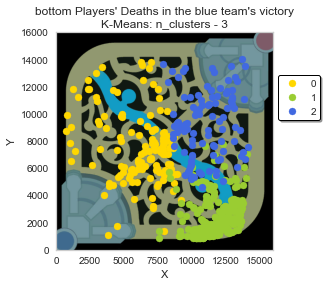

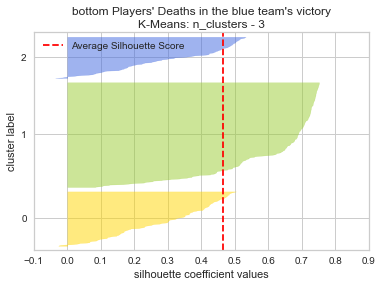

Silhouette score: 0.4649872306748669
1    261
0    136
2    103
Name: cluster, dtype: int64

Inertia: 427.2572534086191

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6108.272059   7580.088235   0.213235
1        1  11687.590038   2552.406130  -0.819923
2        2  11007.524272   9262.475728   0.427184

In [459]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [460]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2094.434514   2583.738862   0.534241
1        1   1315.461813   1465.722383   0.394096
2        2   1607.966906   2431.343701   0.532478

In [461]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9184.0             770.0           13821.0   
1        1           14056.0            7573.0            7799.0   
2        2           14110.0            7909.0           14068.0   

   min coordinate_y  max timestamp  min timestamp  
0            1091.0              1             -1  
1             852.0              1             -1  
2            4585.0              1             -1

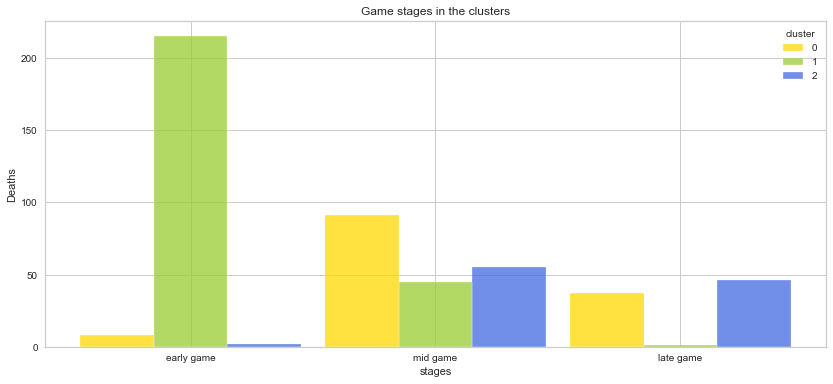

In [462]:
stagesPerClusterV2(blueSideVictory_df, colors)

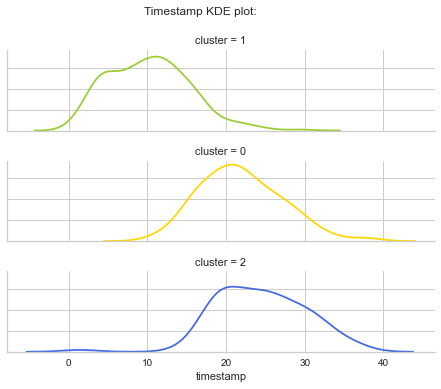

In [463]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [464]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx              23
Jhin              16
Caitlyn           15
Ezreal             9
Varus              8
Vayne              7
Xayah              6
Kaisa              5
Zeri               3
Samira             2
MissFortune        2
Tristana           1
Lucian             1
Twitch             1

Deaths with each champion:

In [465]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx           129
Jhin            86
Caitlyn         55
Ezreal          55
Varus           40
Xayah           32
Kaisa           27
Vayne           27
Zeri            16
MissFortune     10
Samira          10
Tristana         5
Twitch           5
Lucian           3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [466]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 14 champions when they won on the red side

Cluster 0 - died with 12 champions:
 ['Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'MissFortune' 'Samira'
 'Tristana' 'Varus' 'Vayne' 'Xayah' 'Zeri']
Jinx           41
Jhin           27
Varus          13
Caitlyn        12
Ezreal         11
Kaisa           9
Zeri            7
Xayah           6
MissFortune     4
Vayne           3
Samira          2
Tristana        1
Name: champion, dtype: int64

Cluster 1 - died with 14 champions:
 ['Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'MissFortune' 'Samira'
 'Tristana' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Zeri']
Jinx           63
Jhin           45
Caitlyn        31
Ezreal         30
Varus          21
Xayah          17
Vayne          17
Kaisa          14
Samira          7
Zeri            6
MissFortune     4
Lucian          2
Tristana        2
Twitch          2
Name: champion, dtype: int64

Cluster 2 - died with 14 champions:
 ['Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'M

---
#### Clustering Blue Team Defeat

In [467]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideDefeat_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
38441   EUW1_6280234737  Blue  anonymous 157   euw1     Jhin   3.075733   
38444   EUW1_6280234737  Blue  anonymous 157   euw1     Jhin   4.832200   
38451   EUW1_6280234737  Blue  anonymous 157   euw1     Jhin   9.002400   
38455   EUW1_6280234737  Blue  anonymous 157   euw1     Jhin  10.394800   
38464   EUW1_6280234737  Blue  anonymous 157   euw1     Jhin  15.381050   
...                 ...   ...            ...    ...      ...        ...   
577703  EUW1_6288877278  Blue   anonymous 31   euw1  Caitlyn  18.623550   
577707  EUW1_6288877278  Blue   anonymous 31   euw1  Caitlyn  19.916217   
577715  EUW1_6288877278  Blue   anonymous 31   euw1  Caitlyn  23.529383   
577720  EUW1_6288877278  Blue   anonymous 31   euw1  Caitlyn  26.392050   
577732  EUW1_6288877278  Blue   anonymous 31   euw1  Caitlyn  32.566350   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
38441         9933.0        1113.0    NaN            NaN  ...   
38444         9345.0        5806.0    NaN            NaN  ...   
38451        10572.0         858.0    NaN            NaN  ...   
38455        13012.0        1851.0    NaN            NaN  ...   
38464         4156.0       13366.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
577703        8992.0        8303.0    NaN            NaN  ...   
577707       11630.0        3349.0    NaN            NaN  ...   
577715        5038.0        5582.0    NaN            NaN  ...   
577720       10032.0        8721.0    NaN            NaN  ...   
577732        3787.0        3588.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
38441               NaN    False      Death        NaN           NaN   NaN   
38444               NaN    False      Death        NaN           NaN   NaN   
38451               NaN    False      Death        NaN           NaN   NaN   
38455               NaN    False      Death        NaN           NaN   NaN   
38464               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
577703              NaN    False      Death        NaN           NaN   NaN   
577707              NaN    False      Death        NaN           NaN   NaN   
577715              NaN    False      Death        NaN           NaN   NaN   
577720              NaN    False      Death        NaN           NaN   NaN   
577732              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
38441       NaN       NaN  BOTTOM  Platinum  
38444       NaN       NaN  BOTTOM  Platinum  
38451       NaN       NaN  BOTTOM  Platinum  
38455       NaN       NaN  BOTTOM  Platinum  
38464       NaN       NaN  BOTTOM  Platinum  
...         ...       ...     ...       ...  
577703      NaN       NaN  BOTTOM  Platinum  
577707      NaN       NaN  BOTTOM  Platinum  
577715      NaN       NaN  BOTTOM  Platinum  
577720      NaN       NaN  BOTTOM  Platinum  
577732      NaN       NaN  BOTTOM  Platinum  

[534 rows x 56 columns]

In [468]:
profiling_df = bottom_deaths_df[(bottom_deaths_df["team"] == "Blue") & (bottom_deaths_df["victory"] == False)].copy()

In [469]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 157 lost 9 matches on the blue side
anonymous 157 has an average of 7.333333333333333 deaths per game when losing on the blue side

anonymous 160 lost 12 matches on the blue side
anonymous 160 has an average of 7.166666666666667 deaths per game when losing on the blue side

anonymous 162 lost 4 matches on the blue side
anonymous 162 has an average of 8.0 deaths per game when losing on the blue side

anonymous 24 lost 19 matches on the blue side
anonymous 24 has an average of 7.157894736842105 deaths per game when losing on the blue side

anonymous 28 lost 6 matches on the blue side
anonymous 28 has an average of 5.166666666666667 deaths per game when losing on the blue side

anonymous 31 lost 14 matches on the blue side
anonymous 31 has an average of 7.571428571428571 deaths per game when losing on the blue side

anonymous 33 lost 9 matches on the blue side
anonymous 33 has an average of 8.555555555555555 deaths per game when losing on the blue side



In [470]:
print("Defeat games on blue side contains {} matches in which the bottom died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 73 matches in which the bottom died at least once
7 players died a total of 534 times on the blue side
Defeat games on blue side contains an average of 7.315068493150685 deaths per game


In [471]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
38441         9933.0        1113.0   3.075733
38444         9345.0        5806.0   4.832200
38451        10572.0         858.0   9.002400
38455        13012.0        1851.0  10.394800
38464         4156.0       13366.0  15.381050
...              ...           ...        ...
577703        8992.0        8303.0  18.623550
577707       11630.0        3349.0  19.916217
577715        5038.0        5582.0  23.529383
577720       10032.0        8721.0  26.392050
577732        3787.0        3588.0  32.566350

[534 rows x 3 columns]

Time discretization

In [472]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [473]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [474]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [475]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [476]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
38441       0.384220     -1.046457         -1
38444       0.229185      0.579153         -1
38451       0.552702     -1.134787         -1
38455       1.196047     -0.790821         -1
38464      -1.138976      3.197864          0
...              ...           ...        ...
577703      0.136111      1.444090          0
577707      0.831661     -0.271928          0
577715     -0.906423      0.501562          0
577720      0.410323      1.588881          1
577732     -1.236269     -0.189141          1

[534 rows x 3 columns]

In [477]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.49111463121917676
Silhouette score for k=3: 0.460571570423717
Silhouette score for k=4: 0.44246943215917905
Silhouette score for k=5: 0.3977331762040635
Silhouette score for k=6: 0.39393959633218145
Silhouette score for k=7: 0.3433035713192774
Silhouette score for k=8: 0.35132185338032745
Silhouette score for k=9: 0.3604691702039683
Silhouette score for k=10: 0.3463755603706141
Silhouette score for k=11: 0.3702692907723474
Silhouette score for k=12: 0.3800425712733762
Silhouette score for k=13: 0.3860623276642749
Silhouette score for k=14: 0.38438372644503394
Silhouette score for k=15: 0.3924365677301572
Silhouette score for k=16: 0.4050930827056594
Silhouette score for k=17: 0.41724362380363245
Silhouette score for k=18: 0.41020908310208054
Silhouette score for k=19: 0.391962991138772
Silhouette score for k=20: 0.4146092750560115
Silhouette score for k=25: 0.4179777178145181


K-Means with k = 3

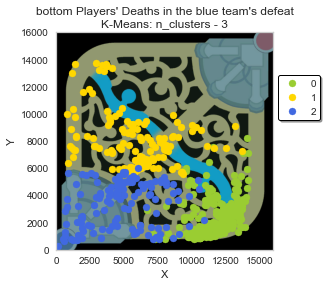

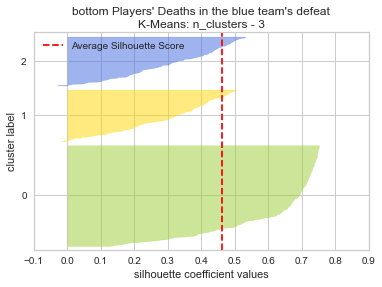

Silhouette score: 0.460571570423717
0    267
1    137
2    130
Name: cluster, dtype: int64

Inertia: 452.7615294780178

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11614.265918   2450.906367  -0.816479
1        1   5828.905109   8153.408759   0.160584
2        2   4819.192308   3355.115385   0.484615

In [478]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [479]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1442.100445   1382.671404   0.405983
1        1   2663.972252   2004.775771   0.556758
2        2   2520.372891   1619.340624   0.514925

In [480]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14122.0            6677.0            8223.0   
1        1           13685.0             810.0           13748.0   
2        2           10875.0             124.0            5990.0   

   min coordinate_y  max timestamp  min timestamp  
0             768.0              1             -1  
1            5613.0              1             -1  
2             258.0              1             -1

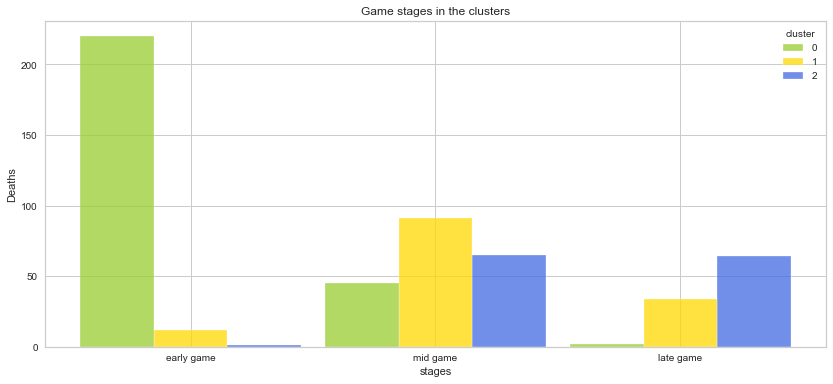

In [481]:
stagesPerClusterV2(blueSideDefeat_df, colors)

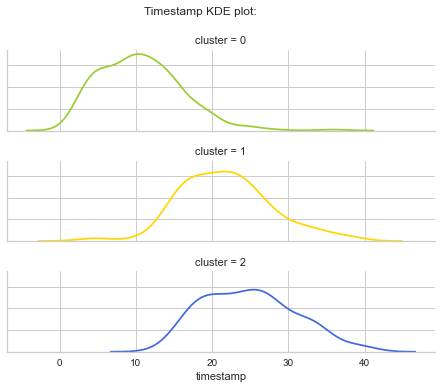

In [482]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [483]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jinx              13
Caitlyn           11
Varus              9
Jhin               8
Vayne              7
Kaisa              6
Xayah              6
Zeri               5
Ezreal             2
MissFortune        1
Samira             1
Tristana           1
Ashe               1
Twitch             1
Lucian             1

Deaths with each champion:

In [484]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jinx           84
Caitlyn        75
Varus          63
Jhin           62
Vayne          60
Zeri           44
Kaisa          44
Xayah          40
MissFortune    14
Ezreal         11
Twitch          9
Ashe            8
Lucian          8
Tristana        6
Samira          6
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [485]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 15 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Ashe' 'Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'MissFortune'
 'Samira' 'Tristana' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Zeri']
Jinx           54
Varus          35
Caitlyn        33
Vayne          30
Jhin           29
Kaisa          20
Xayah          20
Zeri           19
MissFortune     5
Lucian          5
Ashe            4
Twitch          4
Tristana        3
Ezreal          3
Samira          3
Name: champion, dtype: int64

Cluster 1 - died with 14 champions:
 ['Caitlyn' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa' 'Lucian' 'MissFortune' 'Samira'
 'Tristana' 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Zeri']
Caitlyn        21
Jhin           17
Vayne          17
Zeri           16
Jinx           14
Varus          13
Xayah          11
Kaisa          11
MissFortune     5
Samira          3
Lucian          3
Tristana        2
Ezreal          2
Twitch          2
Name: champion, dtype: int64

Cluster 2 -

---

### Blue Win Rate vs Red Win Rate

In [9]:
bottom_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death")]

wins_df = bottom_deaths_df[bottom_deaths_df["victory"] == True]
wins_df

gameId  team       summoner region champion  timestamp  \
19469   EUW1_6279785081   Red  anonymous 143   euw1  Caitlyn   2.950417   
19473   EUW1_6279785081   Red  anonymous 143   euw1  Caitlyn   4.959133   
19484   EUW1_6279785081   Red  anonymous 143   euw1  Caitlyn   9.730317   
19489   EUW1_6279785081   Red  anonymous 143   euw1  Caitlyn  12.665200   
19504   EUW1_6279785081   Red  anonymous 143   euw1  Caitlyn  19.348150   
...                 ...   ...            ...    ...      ...        ...   
642823  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  11.112067   
642825  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  12.131283   
642827  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  13.452200   
642829  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  14.350417   
642851  EUW1_6289463783  Blue  anonymous 170   euw1   Draven  22.265933   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
19469        13617.0        1609.0    NaN            NaN  ...   
19473        13171.0        3665.0    NaN            NaN  ...   
19484        12784.0        3303.0    NaN            NaN  ...   
19489        12545.0        6200.0    NaN            NaN  ...   
19504        13638.0        8520.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642823       13392.0        2445.0    NaN            NaN  ...   
642825       13576.0        2798.0    NaN            NaN  ...   
642827       11126.0        1569.0    NaN            NaN  ...   
642829        8878.0        1151.0    NaN            NaN  ...   
642851       13851.0        3974.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
19469               NaN     True      Death        NaN           NaN   NaN   
19473               NaN     True      Death        NaN           NaN   NaN   
19484               NaN     True      Death        NaN           NaN   NaN   
19489               NaN     True      Death        NaN           NaN   NaN   
19504               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642823              NaN     True      Death        NaN           NaN   NaN   
642825              NaN     True      Death        NaN           NaN   NaN   
642827              NaN     True      Death        NaN           NaN   NaN   
642829              NaN     True      Death        NaN           NaN   NaN   
642851              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
19469       NaN       NaN  BOTTOM  Silver  
19473       NaN       NaN  BOTTOM  Silver  
19484       NaN       NaN  BOTTOM  Silver  
19489       NaN       NaN  BOTTOM  Silver  
19504       NaN       NaN  BOTTOM  Silver  
...         ...       ...     ...     ...  
642823      NaN       NaN  BOTTOM  Bronze  
642825      NaN       NaN  BOTTOM  Bronze  
642827      NaN       NaN  BOTTOM  Bronze  
642829      NaN       NaN  BOTTOM  Bronze  
642851      NaN       NaN  BOTTOM  Bronze  

[5159 rows x 56 columns]

In [10]:
wins = len(np.unique(wins_df["gameId"]))
wins

974

In [11]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 50.513347022587276 vs Blue: 49.48665297741273


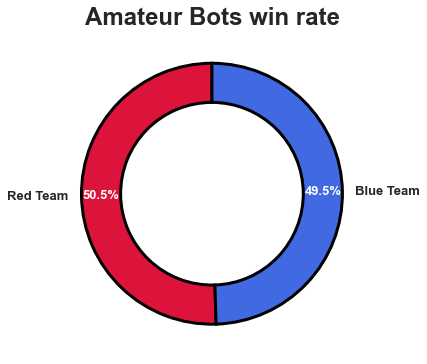

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Amateur Bots win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()